# - The project :: Chronic-Kidney-Disease-Diagnostic-Project
*****************************************************************
<img src="images/chronic.jpg" />


* Table of Contetnt ::
************************************************
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#visualize">Data_Visualization_Process</a></li>
<li><a href="#ETl">ETl_Process</a></li>
<li><a href="#Prepration">Data_Prepration</a></li>
<li><a href="#Model">Bulid_ML_Model</a></li>
<li><a href="#Evaluation">Evaluate_Model</a></li>
<li><a href="#Save">Save_Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<img src="images/project.gif" />


* Domain-Knowledge ::
    * Chronic Kidney Disease (CKD) patients are at higher risk for more severe illness. Due to immunosuppression, the kidney disease patients who appear most at risk for COVID-19. The complications of CKD are high blood pressure, anemia (low blood count), and poor nutritional health. So, developing a model to classify CKD patients is needed and an important to avoid the risk of this disease.
    
    * Given 24 health related attributes taken in 2-month period of 400 patients, using the information of the 158 patients with complete records to predict the outcome (i.e. whether one has chronic kidney disease) of the remaining 242 patients (with missing values in their records).

        
<img src="images/diagonistic.png" />

    


# overview about How ML Solve That Problem of classifier :: 
***********************************
        
<img src="images/Process.jpg" />

* Importing requried liberaries and Frameworks  ::

In [1]:
# Importing Liberaries and Framworks ::
import numpy     as np      # Apply Linear_Algebra operations and deal with arrays.
import pandas    as pd      # For Loading diff formats of data and Apply Wrangling and Mainpulating on data
import seaborn   as sns     # For Visualizing data
import warnings  as w       # For Ignoring any Warning
import missingno as mno     # Presnt Precentage of Nan Values
import datasist  as ds      # For Apply EDA and Visualization Using Simple Implementation
import matplotlib.pyplot as plt # For Set Plots , Charts and Maps Labels and Title  
import pandas_profiling  as pp  # To get describtion file of data


* Set some instructions

In [2]:
# To Make Matplotlib apply on any Version
%matplotlib inline      
# To ignore any Warning notification.
w.filterwarnings("ignore") 
# To Set Figsize of Plots , Charts and Maps
sns.set( rc = {"figure.figsize" : [50 , 35]} , font_scale=3.5)

In [3]:
# Loading dataset ::
df = pd.read_csv("kidney_disease.csv" , na_values=["\t?" , "\t43"])
df

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0.0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1.0   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2.0  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3.0  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4.0  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..     ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395.0  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396.0  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397.0  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398.0  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399.0  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...   pcv      wc   rc  htn   dm  cad  appet   pe  ane  \
0    notpresent  ...  44.0  7800.0  5.2  yes  yes   no   good   no   no   
1    notpresent  ...  38.0  6000.0  NaN   no   no   no   good   no   no   
2    notpresent  ...  31.0  7500.0  NaN   no  yes   no   poor   no  yes   
3    notpresent  ...  32.0  6700.0  3.9  yes   no   no   poor  yes  yes   
4    notpresent  ...  35.0  7300.0  4.6   no   no   no   good   no   no   
..          ...  ...   ...     ...  ...  ...  ...  ...    ...  ...  ...   
395  notpresent  ...  47.0  6700.0  4.9   no   no   no   good   no   no   
396  notpresent  ...  54.0  7800.0  6.2   no   no   no   good   no   no   
397  notpresent  ...  49.0  6600.0  5.4   no   no   no   good   no   no   
398  notpresent  ...  51.0  7200.0  5.9   no   no   no   good   no   no   
399  notpresent  ...  53.0  6800.0  6.1   no   no   no   good   no   no   

    classification  
0              ckd  
1              ckd  
2              ckd  
3              ckd  
4              ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[400 rows x 26 columns]

In [4]:
df["Diagonistic"] = df["classification"]
df.drop("classification" , axis=1 , inplace=True)


In [5]:
df

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0.0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1.0   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2.0  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3.0  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4.0  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..     ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395.0  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396.0  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397.0  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398.0  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399.0  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...   pcv      wc   rc  htn   dm  cad  appet   pe  ane  \
0    notpresent  ...  44.0  7800.0  5.2  yes  yes   no   good   no   no   
1    notpresent  ...  38.0  6000.0  NaN   no   no   no   good   no   no   
2    notpresent  ...  31.0  7500.0  NaN   no  yes   no   poor   no  yes   
3    notpresent  ...  32.0  6700.0  3.9  yes   no   no   poor  yes  yes   
4    notpresent  ...  35.0  7300.0  4.6   no   no   no   good   no   no   
..          ...  ...   ...     ...  ...  ...  ...  ...    ...  ...  ...   
395  notpresent  ...  47.0  6700.0  4.9   no   no   no   good   no   no   
396  notpresent  ...  54.0  7800.0  6.2   no   no   no   good   no   no   
397  notpresent  ...  49.0  6600.0  5.4   no   no   no   good   no   no   
398  notpresent  ...  51.0  7200.0  5.9   no   no   no   good   no   no   
399  notpresent  ...  53.0  6800.0  6.1   no   no   no   good   no   no   

    Diagonistic  
0           ckd  
1           ckd  
2           ckd  
3           ckd  
4           ckd  
..          ...  
395      notckd  
396      notckd  
397      notckd  
398      notckd  
399      notckd  

[400 rows x 26 columns]

In [6]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'Diagonistic'],
      dtype='object')

* from thae result above we can see that ::
*********************************************************
* We have 400  record of data.
* we have 26  features related Income.
* Our-Target income that we will rename that columns into Income.

*******************************************************
# Features of Income data :
*******************************************************

* Categorical Attributes :::
************************************

* Workclass: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    * Individual work category
* Education: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    * Individual's highest education degree
* Marital-status: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    * Individual marital status
* Occupation: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    * Individual's occupation
* Relationship: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    * Individual's relation in a family
* Race: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
Race of Individual
* Sex: (categorical) Female, Male.
* Native-country: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
    * Individual's native country
  
*******************************
    
* Continuous Attributes ::
*************************************
   * age: continuous.
        * Age of an individual
   * Education-num: number of education year, continuous.
        * Individual's year of receiving education
   * fnlwgt: final weight, continuous.
        * The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
   * capital-gain: continuous.
   * capital-loss: continuous.
   * hours-per-week: continuous.
        *Individual's working hour per week

<p id="Wrangling">Exploratory data analysis</p>

* *EDA Task* ::
*******************************
 *  It one of the most important phase of data scientist life cycle which we apply some statistical oprations toidentify the Behaviour of data  to extract meaningful knowledge , insights and vesion from that data to help steckholders to make more efficient decision which improve and enhance our Buesines.

* Statistical analysis Process ::

In [7]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'Diagonistic'],
      dtype='object')

In [8]:
df.dtypes

id             float64
age            float64
bp             float64
sg             float64
al             float64
su             float64
rbc             object
pc              object
pcc             object
ba              object
bgr            float64
bu             float64
sc             float64
sod            float64
pot            float64
hemo           float64
pcv            float64
wc             float64
rc             float64
htn             object
dm              object
cad             object
appet           object
pe              object
ane             object
Diagonistic     object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           399 non-null    float64
 1   age          385 non-null    float64
 2   bp           388 non-null    float64
 3   sg           353 non-null    float64
 4   al           354 non-null    float64
 5   su           351 non-null    float64
 6   rbc          248 non-null    object 
 7   pc           335 non-null    object 
 8   pcc          396 non-null    object 
 9   ba           396 non-null    object 
 10  bgr          356 non-null    float64
 11  bu           381 non-null    float64
 12  sc           383 non-null    float64
 13  sod          313 non-null    float64
 14  pot          312 non-null    float64
 15  hemo         348 non-null    float64
 16  pcv          314 non-null    float64
 17  wc           294 non-null    float64
 18  rc           269 non-null    float64
 19  htn     

id               1
age             15
bp              12
sg              47
al              46
su              49
rbc            152
pc              65
pcc              4
ba               4
bgr             44
bu              19
sc              17
sod             87
pot             88
hemo            52
pcv             86
wc             106
rc             131
htn              2
dm               2
cad              2
appet            1
pe               1
ane              1
Diagonistic      0
dtype: int64

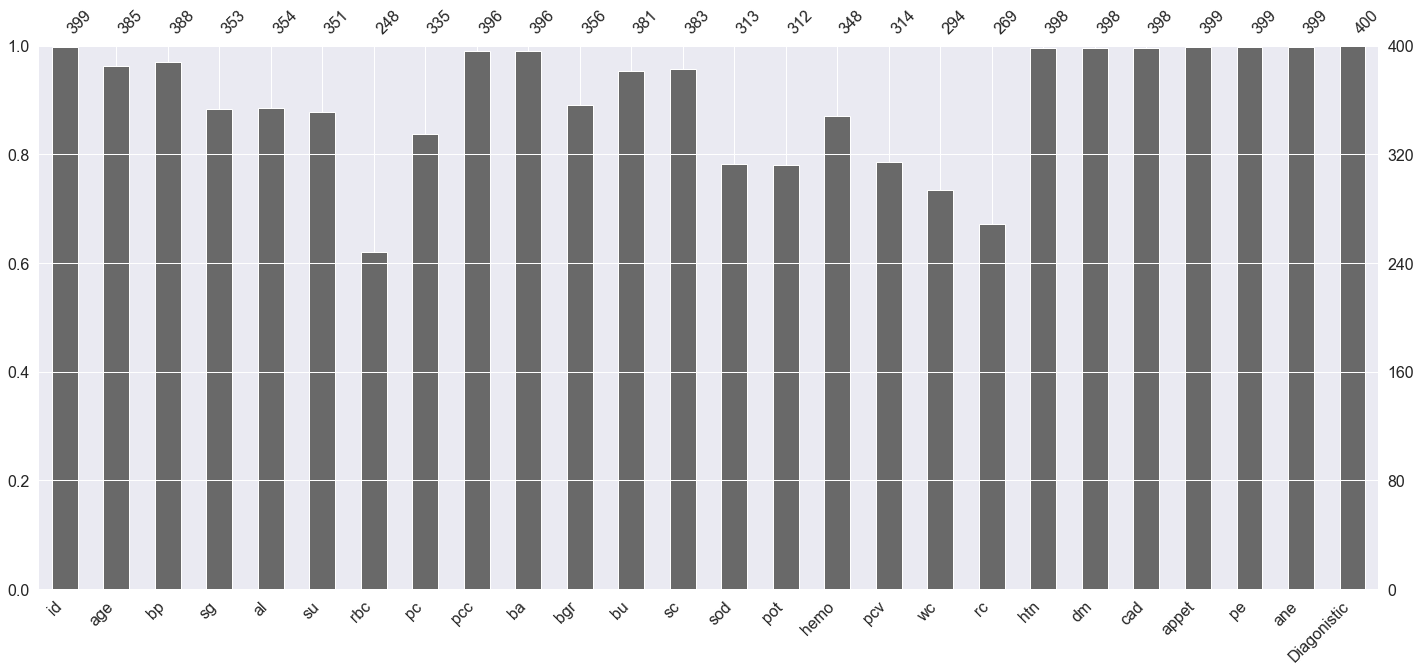

In [10]:
# Investigate Data not include null values ::
# Let's take a look at the presence of missing values, so as not to face unpleasant surprises in the future.


mno.bar(df)
df.isna().sum()

* From the result above we can see that data include missing data values so that we will fill that missing using mean , median or mode based on that feature dtype.

In [11]:
# identify the unique data values and its values count ::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (id)

The Col _ (id) _Unique_values :: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  nan  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 1

In [12]:
# Present the Statistical Analysis describtion of Numerical_data ::
df.describe(include=["number"])

id         age          bp          sg          al          su  \
count  399.000000  385.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.892231   51.615584   76.469072    1.017408    1.016949    0.450142   
std    115.492678   17.270301   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%    100.500000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    200.000000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.500000   65.000000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  \
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000   
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437   
std     79.281714   50.503006    5.741126   10.408752    3.193904    2.912587   
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000   
25%     99.000000   27.000000    0.900000  135.000000    3.800000   10.300000   
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.650000   
75%    163.000000   66.000000    2.800000  142.000000    4.900000   15.000000   
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000   

              pcv            wc          rc  
count  314.000000    294.000000  269.000000  
mean    38.687898   8406.122449    4.707435  
std      9.156679   2944.474190    1.025323  
min      9.000000   2200.000000    2.100000  
25%     32.000000   6500.000000    3.900000  
50%     40.000000   8000.000000    4.800000  
75%     46.000000   9800.000000    5.400000  
max     54.000000  26400.000000    8.000000

In [13]:
# present the Statistical Analysis description of Categorical_data ::
df.describe(include="object")

rbc      pc         pcc          ba  htn   dm  cad appet   pe  ane  \
count      248     335         396         396  398  398  398   399  399  399   
unique       2       2           2           2    2    5    3     2    2    2   
top     normal  normal  notpresent  notpresent   no   no   no  good   no   no   
freq       201     259         354         374  251  258  362   317  323  339   

       Diagonistic  
count          400  
unique           3  
top            ckd  
freq           248

In [14]:
# Present nuniques :: To identifing the duplicaties data
df.nunique()

id             399
age             75
bp              10
sg               5
al               6
su               6
rbc              2
pc               2
pcc              2
ba               2
bgr            146
bu             118
sc              84
sod             34
pot             40
hemo           115
pcv             41
wc              89
rc              45
htn              2
dm               5
cad              3
appet            2
pe               2
ane              2
Diagonistic      3
dtype: int64

In [15]:
# check data include duplicates record or not
df.duplicated().sum()

0

* From the result above data not include duplicaties.

In [16]:
# Checking dtypes of dataset.
df.dtypes

id             float64
age            float64
bp             float64
sg             float64
al             float64
su             float64
rbc             object
pc              object
pcc             object
ba              object
bgr            float64
bu             float64
sc             float64
sod            float64
pot            float64
hemo           float64
pcv            float64
wc             float64
rc             float64
htn             object
dm              object
cad             object
appet           object
pe              object
ane             object
Diagonistic     object
dtype: object

* From the result above we can see some observation which there are some features as object dtypes and we will casting into numerical dtypes. such as (pcv , wc , rc)

* Wrangling and Mainplluting data.

In [17]:
# Get The Record Of the Clients who max age ::
df[df["age"] == df["age"].max()]

id   age    bp     sg   al   su  rbc      pc         pcc          ba  \
200  200.0  90.0  90.0  1.025  1.0  0.0  NaN  normal  notpresent  notpresent   

     ...   pcv      wc   rc  htn   dm  cad  appet  pe  ane Diagonistic  
200  ...  37.0  7900.0  3.9  yes  yes   no   good  no   no         ckd  

[1 rows x 26 columns]

In [18]:
# Get The Record of the Min age ::
df[df["age"] == df["age"].min()]

id  age  bp    sg   al   su     rbc        pc         pcc          ba  \
215  215.0  2.0 NaN  1.01  3.0  0.0  normal  abnormal  notpresent  notpresent   

     ...  pcv  wc  rc  htn  dm  cad  appet   pe  ane Diagonistic  
215  ...  NaN NaN NaN   no  no   no   good  yes   no         ckd  

[1 rows x 26 columns]

In [19]:
# Get The Record Of the Clients who max bp ::
df[df["bp"] == df["bp"].max()]

id   age     bp  sg   al   su  rbc        pc         pcc          ba  \
99  99.0  56.0  180.0 NaN  0.0  4.0  NaN  abnormal  notpresent  notpresent   

    ...   pcv       wc   rc  htn   dm  cad  appet   pe  ane Diagonistic  
99  ...  32.0  10400.0  4.2  yes  yes   no   poor  yes   no         ckd  

[1 rows x 26 columns]

In [20]:
# Get The Record of the Min bp ::
df[df["bp"] == df["bp"].min()]

id   age    bp    sg   al   su     rbc        pc         pcc  \
1      1.0   7.0  50.0  1.02  4.0  0.0     NaN    normal  notpresent   
131  131.0   5.0  50.0  1.01  0.0  0.0     NaN    normal  notpresent   
175  175.0  60.0  50.0  1.01  0.0  0.0     NaN    normal  notpresent   
186  186.0   8.0  50.0  1.02  4.0  0.0  normal    normal  notpresent   
229  229.0  59.0  50.0  1.01  3.0  0.0  normal  abnormal  notpresent   

             ba  ...   pcv       wc   rc  htn   dm  cad  appet   pe  ane  \
1    notpresent  ...  38.0   6000.0  NaN   no   no   no   good   no   no   
131  notpresent  ...  36.0  12400.0  NaN   no   no   no   good   no   no   
175  notpresent  ...   NaN   4200.0  3.4  yes   no   no   good   no   no   
186  notpresent  ...   NaN      NaN  NaN   no   no   no   good  yes   no   
229  notpresent  ...  31.0  15700.0  3.8   no  yes   no   good  yes   no   

    Diagonistic  
1           ckd  
131         ckd  
175         ckd  
186         ckd  
229         ckd  

[5 rows x 26 columns]

In [21]:
# Get The Record Of the Clients who max sg ::
df[df["sg"] == df["sg"].max()]

id   age     bp     sg   al   su     rbc        pc         pcc  \
18    18.0  60.0  100.0  1.025  0.0  3.0     NaN    normal  notpresent   
22    22.0  48.0   80.0  1.025  4.0  0.0  normal  abnormal  notpresent   
25    25.0  61.0   60.0  1.025  0.0  0.0     NaN    normal  notpresent   
120  120.0  72.0   90.0  1.025  1.0  3.0     NaN    normal  notpresent   
129  129.0  75.0   70.0  1.025  1.0  0.0     NaN    normal  notpresent   
..     ...   ...    ...    ...  ...  ...     ...       ...         ...   
391  391.0  36.0   80.0  1.025  0.0  0.0  normal    normal  notpresent   
393  393.0   NaN   60.0  1.025  0.0  0.0  normal    normal  notpresent   
396  396.0  42.0   70.0  1.025  0.0  0.0  normal    normal  notpresent   
398  398.0  17.0   60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399.0  58.0   80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...   pcv       wc   rc  htn   dm  cad  appet   pe  ane  \
18   notpresent  ...  37.0  11400.0  4.3  yes  yes  yes   good   no   no   
22   notpresent  ...  32.0   6900.0  3.4  yes   no   no   good   no  yes   
25   notpresent  ...  29.0   8400.0  3.7  yes  yes   no   good   no  yes   
120  notpresent  ...   NaN      NaN  NaN   no  yes  yes   poor   no   no   
129  notpresent  ...   NaN      NaN  NaN  yes   no   no   poor  yes   no   
..          ...  ...   ...      ...  ...  ...  ...  ...    ...  ...  ...   
391  notpresent  ...  44.0   5800.0  6.3   no   no   no   good   no   no   
393  notpresent  ...  54.0   7400.0  5.4   no   no   no   good   no   no   
396  notpresent  ...  54.0   7800.0  6.2   no   no   no   good   no   no   
398  notpresent  ...  51.0   7200.0  5.9   no   no   no   good   no   no   
399  notpresent  ...  53.0   6800.0  6.1   no   no   no   good   no   no   

    Diagonistic  
18          ckd  
22          ckd  
25          ckd  
120         ckd  
129         ckd  
..          ...  
391      notckd  
393      notckd  
396      notckd  
398      notckd  
399      notckd  

[81 rows x 26 columns]

In [22]:
# Get The Record of the Min sg ::
df[df["sg"] == df["sg"].min()]

id   age     bp     sg   al   su       rbc        pc         pcc  \
3      3.0  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present   
29    29.0  68.0   70.0  1.005  1.0  0.0  abnormal  abnormal     present   
48    48.0  73.0   70.0  1.005  0.0  0.0    normal    normal  notpresent   
55    55.0  35.0   80.0  1.005  3.0  0.0  abnormal    normal  notpresent   
76    76.0  48.0   80.0  1.005  4.0  0.0  abnormal  abnormal  notpresent   
87    87.0  70.0  100.0  1.005  1.0  0.0    normal  abnormal     present   
154  154.0  56.0   90.0  1.005  4.0  3.0  abnormal  abnormal  notpresent   

             ba  ...   pcv       wc   rc  htn   dm  cad  appet   pe  ane  \
3    notpresent  ...  32.0   6700.0  3.9  yes   no   no   poor  yes  yes   
29   notpresent  ...  38.0      NaN  NaN   no   no  yes   good   no   no   
48   notpresent  ...  29.0  18900.0  3.5  yes  yes   no   good  yes   no   
55   notpresent  ...  28.0      NaN  NaN   no   no   no   good  yes   no   
76      present  ...  36.0   6200.0  4.0   no  yes   no   good  yes   no   
87   notpresent  ...  32.0   5800.0  5.0  yes  yes   no   poor   no   no   
154  notpresent  ...  26.0      NaN  3.0  yes  yes   no   poor  yes  yes   

    Diagonistic  
3           ckd  
29          ckd  
48          ckd  
55          ckd  
76          ckd  
87          ckd  
154         ckd  

[7 rows x 26 columns]

In [23]:
# Get The Record Of the Clients who max al ::
df[df["al"] == df["al"].max()]

id   age    bp     sg   al   su       rbc        pc         pcc  \
145  145.0  57.0  90.0  1.015  5.0  0.0  abnormal  abnormal  notpresent   

          ba  ...   pcv      wc   rc  htn   dm  cad  appet   pe  ane  \
145  present  ...  24.0  4200.0  3.3  yes  yes  yes   poor  yes  yes   

    Diagonistic  
145         ckd  

[1 rows x 26 columns]

In [24]:
# Get The Record of the Min al ::
df[df["al"] == df["al"].min()]

id   age     bp     sg   al   su     rbc      pc         pcc  \
6      6.0  68.0   70.0  1.010  0.0  0.0     NaN  normal  notpresent   
18    18.0  60.0  100.0  1.025  0.0  3.0     NaN  normal  notpresent   
23    23.0  21.0   70.0  1.010  0.0  0.0     NaN  normal  notpresent   
25    25.0  61.0   60.0  1.025  0.0  0.0     NaN  normal  notpresent   
26    26.0  75.0   80.0  1.015  0.0  0.0     NaN  normal  notpresent   
..     ...   ...    ...    ...  ...  ...     ...     ...         ...   
395  395.0  55.0   80.0  1.020  0.0  0.0  normal  normal  notpresent   
396  396.0  42.0   70.0  1.025  0.0  0.0  normal  normal  notpresent   
397  397.0  12.0   80.0  1.020  0.0  0.0  normal  normal  notpresent   
398  398.0  17.0   60.0  1.025  0.0  0.0  normal  normal  notpresent   
399  399.0  58.0   80.0  1.025  0.0  0.0  normal  normal  notpresent   

             ba  ...   pcv       wc   rc  htn   dm  cad  appet  pe  ane  \
6    notpresent  ...  36.0      NaN  NaN   no   no   no   good  no   no   
18   notpresent  ...  37.0  11400.0  4.3  yes  yes  yes   good  no   no   
23   notpresent  ...   NaN      NaN  NaN   no   no   no   poor  no  yes   
25   notpresent  ...  29.0   8400.0  3.7  yes  yes   no   good  no  yes   
26   notpresent  ...  35.0  10300.0  4.0  yes  yes   no   poor  no   no   
..          ...  ...   ...      ...  ...  ...  ...  ...    ...  ..  ...   
395  notpresent  ...  47.0   6700.0  4.9   no   no   no   good  no   no   
396  notpresent  ...  54.0   7800.0  6.2   no   no   no   good  no   no   
397  notpresent  ...  49.0   6600.0  5.4   no   no   no   good  no   no   
398  notpresent  ...  51.0   7200.0  5.9   no   no   no   good  no   no   
399  notpresent  ...  53.0   6800.0  6.1   no   no   no   good  no   no   

    Diagonistic  
6           ckd  
18          ckd  
23          ckd  
25          ckd  
26          ckd  
..          ...  
395      notckd  
396      notckd  
397      notckd  
398      notckd  
399      notckd  

[199 rows x 26 columns]

In [25]:
# Get The Record Of the Clients who max su ::
df[df["su"] == df["su"].max()]

id   age    bp     sg   al   su       rbc      pc         pcc  \
53    53.0  62.0  80.0  1.015  0.0  5.0       NaN     NaN  notpresent   
170  170.0  66.0  70.0  1.015  2.0  5.0       NaN  normal  notpresent   
225  225.0  60.0  90.0  1.010  3.0  5.0  abnormal  normal  notpresent   

             ba  ...   pcv       wc   rc  htn   dm  cad  appet  pe  ane  \
53   notpresent  ...  40.0   8500.0  4.7  yes  yes   no   good  no   no   
170  notpresent  ...  33.0   9600.0  4.4  yes  yes   no   good  no   no   
225     present  ...  35.0  12000.0  4.5  yes  yes   no   good  no   no   

    Diagonistic  
53          ckd  
170         ckd  
225         ckd  

[3 rows x 26 columns]

In [26]:
# Get The Record of the Min su ::
df[df["su"] == df["su"].min()]

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0.0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1.0   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
3      3.0  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4.0  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
5      5.0  60.0  90.0  1.015  3.0  0.0     NaN       NaN  notpresent   
..     ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395.0  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396.0  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397.0  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398.0  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399.0  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...   pcv      wc   rc  htn   dm  cad  appet   pe  ane  \
0    notpresent  ...  44.0  7800.0  5.2  yes  yes   no   good   no   no   
1    notpresent  ...  38.0  6000.0  NaN   no   no   no   good   no   no   
3    notpresent  ...  32.0  6700.0  3.9  yes   no   no   poor  yes  yes   
4    notpresent  ...  35.0  7300.0  4.6   no   no   no   good   no   no   
5    notpresent  ...  39.0  7800.0  4.4  yes  yes   no   good  yes   no   
..          ...  ...   ...     ...  ...  ...  ...  ...    ...  ...  ...   
395  notpresent  ...  47.0  6700.0  4.9   no   no   no   good   no   no   
396  notpresent  ...  54.0  7800.0  6.2   no   no   no   good   no   no   
397  notpresent  ...  49.0  6600.0  5.4   no   no   no   good   no   no   
398  notpresent  ...  51.0  7200.0  5.9   no   no   no   good   no   no   
399  notpresent  ...  53.0  6800.0  6.1   no   no   no   good   no   no   

    Diagonistic  
0           ckd  
1           ckd  
3           ckd  
4           ckd  
5           ckd  
..          ...  
395      notckd  
396      notckd  
397      notckd  
398      notckd  
399      notckd  

[290 rows x 26 columns]

In [27]:
# Get The Record Of the Clients who max bgr ::
df[df["bgr"] == df["bgr"].max()]

id   age    bp    sg   al   su       rbc        pc         pcc  \
10    10.0  50.0  60.0  1.01  2.0  4.0       NaN  abnormal     present   
225  225.0  60.0  90.0  1.01  3.0  5.0  abnormal    normal  notpresent   

             ba  ...   pcv       wc   rc  htn   dm  cad  appet  pe  ane  \
10   notpresent  ...  28.0      NaN  NaN  yes  yes   no   good  no  yes   
225     present  ...  35.0  12000.0  4.5  yes  yes   no   good  no   no   

    Diagonistic  
10          ckd  
225         ckd  

[2 rows x 26 columns]

In [28]:
# Get The Record of the Min bgr ::
df[df["bgr"] == df["bgr"].min()]

id   age    bp     sg   al   su       rbc      pc         pcc  \
173  173.0  17.0  70.0  1.015  1.0  0.0  abnormal  normal  notpresent   

             ba  ...   pcv       wc  rc  htn  dm  cad  appet  pe  ane  \
173  notpresent  ...  41.0  11200.0 NaN   no  no   no   good  no   no   

    Diagonistic  
173         ckd  

[1 rows x 26 columns]

In [29]:
# Get The Record Of the Clients who max bu ::
df[df["bu"] == df["bu"].max()]

id   age    bp    sg   al   su     rbc        pc         pcc  \
61  61.0  67.0  80.0  1.01  1.0  3.0  normal  abnormal  notpresent   

            ba  ...  pcv  wc  rc  htn  dm  cad  appet   pe  ane Diagonistic  
61  notpresent  ...  NaN NaN NaN   no  no   no   good  yes   no         ckd  

[1 rows x 26 columns]

In [30]:
# Get The Record of the Min bu ::
df[df["bu"] == df["bu"].min()]

id   age    bp     sg   al   su       rbc      pc         pcc  \
173  173.0  17.0  70.0  1.015  1.0  0.0  abnormal  normal  notpresent   

             ba  ...   pcv       wc  rc  htn  dm  cad  appet  pe  ane  \
173  notpresent  ...  41.0  11200.0 NaN   no  no   no   good  no   no   

    Diagonistic  
173         ckd  

[1 rows x 26 columns]

In [31]:
# Get The Record Of the Clients who max sc ::
df[df["sc"] == df["sc"].max()]

id   age    bp  sg  al  su  rbc   pc         pcc          ba  ...   pcv  \
21  21.0  60.0  90.0 NaN NaN NaN  NaN  NaN  notpresent  notpresent  ...  32.0   

        wc   rc  htn   dm  cad  appet  pe  ane Diagonistic  
21  6200.0  3.6  yes  yes  yes   good  no   no         ckd  

[1 rows x 26 columns]

In [32]:
# Get The Record of the Min sc ::
df[df["sc"] == df["sc"].min()]

id   age    bp     sg   al   su     rbc      pc         pcc  \
354  354.0  32.0  60.0  1.025  0.0  0.0  normal  normal  notpresent   

             ba  ...   pcv      wc   rc  htn  dm  cad  appet  pe  ane  \
354  notpresent  ...  41.0  6800.0  5.1   no  no   no   good  no   no   

    Diagonistic  
354      notckd  

[1 rows x 26 columns]

In [33]:
# Get The Record Of the Clients who max sod ::
df[df["sod"] == df["sod"].max()]

id   age    bp    sg   al   su     rbc        pc         pcc  \
61  61.0  67.0  80.0  1.01  1.0  3.0  normal  abnormal  notpresent   

            ba  ...  pcv  wc  rc  htn  dm  cad  appet   pe  ane Diagonistic  
61  notpresent  ...  NaN NaN NaN   no  no   no   good  yes   no         ckd  

[1 rows x 26 columns]

In [34]:
# Get The Record of the Min sod ::
df[df["sod"] == df["sod"].min()]

id   age    bp  sg  al  su  rbc   pc         pcc          ba  ...   pcv  \
21  21.0  60.0  90.0 NaN NaN NaN  NaN  NaN  notpresent  notpresent  ...  32.0   

        wc   rc  htn   dm  cad  appet  pe  ane Diagonistic  
21  6200.0  3.6  yes  yes  yes   good  no   no         ckd  

[1 rows x 26 columns]

In [35]:
# Get The Record Of the Clients who max pot ::
df[df["pot"] == df["pot"].max()]

id   age    bp     sg   al   su     rbc        pc         pcc  \
128  128.0  52.0  90.0  1.015  4.0  3.0  normal  abnormal  notpresent   

             ba  ...   pcv      wc   rc  htn   dm  cad  appet  pe  ane  \
128  notpresent  ...  23.0  5000.0  2.9  yes  yes   no   good  no  yes   

    Diagonistic  
128         ckd  

[1 rows x 26 columns]

In [36]:
# Get The Record of the Min pot ::
df[df["pot"] == df["pot"].min()]

id   age    bp     sg   al   su     rbc        pc         pcc  \
3      3.0  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
172  172.0  62.0  80.0  1.010  1.0  2.0     NaN       NaN  notpresent   

             ba  ...   pcv       wc   rc  htn  dm  cad  appet   pe  ane  \
3    notpresent  ...  32.0   6700.0  3.9  yes  no   no   poor  yes  yes   
172  notpresent  ...  34.0  12800.0  4.9   no  no   no   good   no   no   

    Diagonistic  
3           ckd  
172         ckd  

[2 rows x 26 columns]

In [37]:
# Get The Record Of the Clients who max hemo ::
df[df["hemo"] == df["hemo"].max()]

id   age    bp     sg   al   su     rbc      pc         pcc  \
338  338.0  62.0  80.0  1.020  0.0  0.0  normal  normal  notpresent   
347  347.0   NaN  60.0  1.025  0.0  0.0  normal  normal  notpresent   
363  363.0  67.0  80.0  1.025  0.0  0.0  normal  normal  notpresent   

             ba  ...   pcv      wc   rc  htn  dm  cad  appet  pe  ane  \
338  notpresent  ...  44.0  4700.0  4.5   no  no   no   good  no   no   
347  notpresent  ...   NaN  7200.0  5.5   no  no   no   good  no   no   
363  notpresent  ...  44.0  5900.0  5.2   no  no   no   good  no   no   

    Diagonistic  
338      notckd  
347      notckd  
363      notckd  

[3 rows x 26 columns]

In [38]:
# Get The Record of the Min hemo ::
df[df["hemo"] == df["hemo"].min()]

id   age    bp    sg   al   su     rbc        pc      pcc          ba  \
249  249.0  56.0  90.0  1.01  4.0  1.0  normal  abnormal  present  notpresent   

     ...  pcv      wc   rc  htn   dm  cad  appet   pe  ane Diagonistic  
249  ...  9.0  5400.0  2.1  yes  yes   no   poor  yes  yes         ckd  

[1 rows x 26 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           399 non-null    float64
 1   age          385 non-null    float64
 2   bp           388 non-null    float64
 3   sg           353 non-null    float64
 4   al           354 non-null    float64
 5   su           351 non-null    float64
 6   rbc          248 non-null    object 
 7   pc           335 non-null    object 
 8   pcc          396 non-null    object 
 9   ba           396 non-null    object 
 10  bgr          356 non-null    float64
 11  bu           381 non-null    float64
 12  sc           383 non-null    float64
 13  sod          313 non-null    float64
 14  pot          312 non-null    float64
 15  hemo         348 non-null    float64
 16  pcv          314 non-null    float64
 17  wc           294 non-null    float64
 18  rc           269 non-null    float64
 19  htn     

In [40]:
# grouped data ased on rbc feature and get col describtion ::
df.groupby("rbc").describe().transpose()

rbc         abnormal      normal
id count   46.000000  201.000000
   mean   128.065217  264.815920
   std     69.557139  108.082195
   min      9.000000    2.000000
   25%     67.750000  213.000000
...              ...         ...
rc min      2.500000    2.100000
   25%      3.200000    4.500000
   50%      3.700000    5.100000
   75%      4.300000    5.700000
   max      5.600000    8.000000

[120 rows x 2 columns]

In [41]:
# grouped data ased on pc feature and get col describtion ::
df.groupby("pc").describe().transpose()

pc          abnormal      normal
id count   76.000000  259.000000
   mean   119.434211  234.675676
   std     76.687650  114.629717
   min      3.000000    0.000000
   25%     54.250000  140.500000
...              ...         ...
rc min      2.100000    2.500000
   25%      3.325000    4.500000
   50%      3.700000    5.100000
   75%      4.100000    5.625000
   max      5.200000    8.000000

[120 rows x 2 columns]

In [42]:
# grouped data ased on pcc feature and get col describtion ::
df.groupby("pcc").describe().transpose()

pcc       notpresent     present
id count  353.000000   42.000000
   mean   209.303116  110.452381
   std    114.838010   78.301544
   min      0.000000    3.000000
   25%    111.000000   37.750000
...              ...         ...
rc min      2.100000    2.100000
   25%      4.200000    3.275000
   50%      4.900000    3.700000
   75%      5.500000    3.900000
   max      8.000000    5.000000

[120 rows x 2 columns]

In [43]:
# grouped data ased on ba feature and get col describtion ::
df.groupby("ba").describe().transpose()

ba        notpresent     present
id count  373.000000   22.000000
   mean   202.024129  144.000000
   std    116.979605   68.923007
   min      0.000000   14.000000
   25%    100.000000   94.250000
...              ...         ...
rc min      2.100000    2.600000
   25%      4.025000    3.350000
   50%      4.800000    3.700000
   75%      5.475000    4.100000
   max      8.000000    4.800000

[120 rows x 2 columns]

In [44]:
# grouped data ased on pcv feature and get col describtion ::
df.groupby("pcv").describe().transpose()

pcv        9.0   14.0   15.0  16.0   17.0  18.0        19.0   20.0   21.0  \
id count    1.0   1.0    1.0   1.0    1.0   1.0    2.000000    1.0    1.0   
   mean   249.0  73.0  193.0  14.0  106.0  98.0  193.000000  210.0  201.0   
   std      NaN   NaN    NaN   NaN    NaN   NaN   73.539105    NaN    NaN   
   min    249.0  73.0  193.0  14.0  106.0  98.0  141.000000  210.0  201.0   
   25%    249.0  73.0  193.0  14.0  106.0  98.0  167.000000  210.0  201.0   
...         ...   ...    ...   ...    ...   ...         ...    ...    ...   
rc min      2.1   NaN    2.8   2.6    NaN   2.3    2.600000    3.9    NaN   
   25%      2.1   NaN    2.8   2.6    NaN   2.3    2.600000    3.9    NaN   
   50%      2.1   NaN    2.8   2.6    NaN   2.3    2.600000    3.9    NaN   
   75%      2.1   NaN    2.8   2.6    NaN   2.3    2.600000    3.9    NaN   
   max      2.1   NaN    2.8   2.6    NaN   2.3    2.600000    3.9    NaN   

pcv             22.0  ...        45.0        46.0        47.0        48.0  \
id count    3.000000  ...   13.000000    9.000000    4.000000   19.000000   
   mean   122.333333  ...  298.153846  312.111111  341.750000  294.210526   
   std     35.133080  ...   87.079318   88.210607   67.741543   64.077712   
   min     84.000000  ...   47.000000  121.000000  243.000000   65.000000   
   25%    107.000000  ...  263.000000  257.000000  327.750000  274.000000   
...              ...  ...         ...         ...         ...         ...   
rc min      2.100000  ...    4.500000    4.500000    4.900000    4.400000   
   25%      2.400000  ...    4.675000    4.775000    4.900000    4.900000   
   50%      2.700000  ...    5.200000    5.400000    5.500000    5.100000   
   75%      2.800000  ...    5.600000    5.575000    6.100000    5.400000   
   max      2.900000  ...    6.500000    6.400000    6.100000    6.100000   

pcv             49.0        50.0        51.0        52.0        53.0  \
id count    4.000000   12.000000    4.000000   21.000000    4.000000   
   mean   352.750000  328.333333  376.000000  289.190476  350.500000   
   std     66.364524   42.433549   18.920888   94.050316   57.390475   
   min    254.000000  264.000000  353.000000   69.000000  268.000000   
   25%    346.250000  293.250000  366.500000  280.000000  336.250000   
...              ...         ...         ...         ...         ...   
rc min      4.800000    4.500000    4.500000    4.600000    4.500000   
   25%      4.950000    5.175000    4.875000    5.075000    4.800000   
   50%      5.100000    5.700000    5.450000    5.550000    5.050000   
   75%      5.250000    6.150000    6.050000    5.925000    5.425000   
   max      5.400000    6.500000    6.500000    6.300000    6.100000   

pcv             54.0  
id count    4.000000  
   mean   382.500000  
   std     15.926916  
   min    361.000000  
   25%    375.250000  
...              ...  
rc min      4.900000  
   25%      5.275000  
   50%      5.600000  
   75%      5.900000  
   max      6.200000  

[112 rows x 41 columns]

In [45]:
# grouped data ased on wc feature and get col describtion ::
df.groupby("wc").describe().transpose()

wc        2200.0   2600.0     3800.0   4100.0      4200.0      4300.0   \
id count      1.0      1.0   2.000000      1.0    3.000000    6.000000   
   mean     167.0    193.0  49.500000    234.0  187.000000  248.833333   
   std        NaN      NaN  48.790368      NaN   49.112117  110.749116   
   min      167.0    193.0  15.000000    234.0  145.000000   52.000000   
   25%      167.0    193.0  32.250000    234.0  160.000000  212.500000   
...           ...      ...        ...      ...         ...         ...   
rc min        NaN      2.8   2.100000      5.2    3.300000    3.000000   
   25%        NaN      2.8   2.275000      5.2    3.350000    4.075000   
   50%        NaN      2.8   2.450000      5.2    3.400000    5.350000   
   75%        NaN      2.8   2.625000      5.2    3.650000    5.650000   
   max        NaN      2.8   2.800000      5.2    3.900000    5.800000   

wc           4500.0    4700.0   4900.0      5000.0   ...     14600.0  14900.0  \
id count    3.000000    4.0000      1.0    5.000000  ...    2.000000      1.0   
   mean   203.000000  265.2500    214.0  238.800000  ...  112.000000    123.0   
   std    167.860061   78.1297      NaN   68.783719  ...   57.982756      NaN   
   min     11.000000  155.0000    214.0  128.000000  ...   71.000000    123.0   
   25%    143.500000  245.0000    214.0  240.000000  ...   91.500000    123.0   
...              ...       ...      ...         ...  ...         ...      ...   
rc min      3.800000    4.5000      5.2    2.500000  ...    2.900000      NaN   
   25%      4.350000    4.5500      5.2    2.900000  ...    2.975000      NaN   
   50%      4.900000    4.6000      5.2    4.100000  ...    3.050000      NaN   
   75%      5.200000    5.0000      5.2    4.500000  ...    3.125000      NaN   
   max      5.500000    5.4000      5.2    5.200000  ...    3.200000      NaN   

wc           15200.0  15700.0  16300.0  16700.0  18900.0  19100.0  21600.0  \
id count    2.000000      1.0      1.0      1.0      1.0      1.0      1.0   
   mean   137.000000    229.0    130.0    190.0     48.0    181.0     49.0   
   std     14.142136      NaN      NaN      NaN      NaN      NaN      NaN   
   min    127.000000    229.0    130.0    190.0     48.0    181.0     49.0   
   25%    132.000000    229.0    130.0    190.0     48.0    181.0     49.0   
...              ...      ...      ...      ...      ...      ...      ...   
rc min      3.000000      3.8      2.7      4.8      3.5      3.7      3.5   
   25%      3.325000      3.8      2.7      4.8      3.5      3.7      3.5   
   50%      3.650000      3.8      2.7      4.8      3.5      3.7      3.5   
   75%      3.975000      3.8      2.7      4.8      3.5      3.7      3.5   
   max      4.300000      3.8      2.7      4.8      3.5      3.7      3.5   

wc        26400.0  
id count      1.0  
   mean     198.0  
   std        NaN  
   min      198.0  
   25%      198.0  
...           ...  
rc min        3.9  
   25%        3.9  
   50%        3.9  
   75%        3.9  
   max        3.9  

[112 rows x 89 columns]

In [46]:
# grouped data ased on rc feature and get col describtion ::
df.groupby("rc").describe().transpose()

rc                2.1     2.3     2.4          2.5           2.6  \
id count     2.000000     1.0     1.0     2.000000      2.000000   
   mean    166.500000    98.0   160.0   141.500000    129.500000   
   std     116.672619     NaN     NaN   147.785317    163.341666   
   min      84.000000    98.0   160.0    37.000000     14.000000   
   25%     125.250000    98.0   160.0    89.250000     71.750000   
...               ...     ...     ...          ...           ...   
wc min    3800.000000  5800.0  9400.0  5000.000000   7200.000000   
   25%    4200.000000  5800.0  9400.0  5475.000000   8150.000000   
   50%    4600.000000  5800.0  9400.0  5950.000000   9100.000000   
   75%    5000.000000  5800.0  9400.0  6425.000000  10050.000000   
   max    5400.000000  5800.0  9400.0  6900.000000  11000.000000   

rc                 2.7          2.8          2.9           3.0      3.1  ...  \
id count      2.000000     2.000000      2.00000      3.000000      1.0  ...   
   mean     131.000000   104.000000    140.50000    166.000000    171.0  ...   
   std        1.414214   125.865007     17.67767     27.073973      NaN  ...   
   min      130.000000    15.000000    128.00000    147.000000    171.0  ...   
   25%      130.500000    59.500000    134.25000    150.500000    171.0  ...   
...                ...          ...          ...           ...      ...  ...   
wc min    13200.000000  2600.000000   5000.00000   4300.000000   7900.0  ...   
   25%    13975.000000  2900.000000   7400.00000   7025.000000   9125.0  ...   
   50%    14750.000000  3200.000000   9800.00000   9750.000000  10350.0  ...   
   75%    15525.000000  3500.000000  12200.00000  12475.000000  11575.0  ...   
   max    16300.000000  3800.000000  14600.00000  15200.000000  12800.0  ...   

rc                 5.7           5.8          5.9       6.0           6.1  \
id count      5.000000      7.000000     8.000000     4.000      8.000000   
   mean     320.400000    324.857143   333.375000   230.000    332.625000   
   std       40.047472     44.808588    44.561154   107.353     47.415903   
   min      283.000000    257.000000   285.000000    69.000    243.000000   
   25%      291.000000    297.000000   294.500000   228.000    309.750000   
...                ...           ...          ...       ...           ...   
wc min     4300.000000   4300.000000  5300.000000  6700.000   6300.000000   
   25%     5400.000000   6300.000000  6175.000000  6850.000   6700.000000   
   50%     5500.000000   8300.000000  6950.000000  8000.000   7100.000000   
   75%     7000.000000   9150.000000  8175.000000  9275.000   9675.000000   
   max    10800.000000  10700.000000  9400.000000  9800.000  11000.000000   

rc                 6.2           6.3          6.4          6.5     8.0  
id count      5.000000      4.000000     5.000000     5.000000     1.0  
   mean     333.200000    338.250000   346.600000   343.200000   133.0  
   std       53.110263     58.999294    42.353276    39.442363     NaN  
   min      253.000000    255.000000   278.000000   295.000000   133.0  
   25%      320.000000    320.250000   345.000000   325.000000   133.0  
...                ...           ...          ...          ...     ...  
wc min     5800.000000   5800.000000  7300.000000  5700.000000  8400.0  
   25%     6200.000000   7225.000000  7900.000000  6000.000000  8400.0  
   50%     7500.000000   8450.000000  8000.000000  6700.000000  8400.0  
   75%     7800.000000   9575.000000  9400.000000  8600.000000  8400.0  
   max    10400.000000  10700.000000  9500.000000  9600.000000  8400.0  

[112 rows x 45 columns]

In [47]:
# grouped data ased on htn feature and get col describtion ::
df.groupby("htn").describe().transpose()

htn               no         yes
id count  250.000000  147.000000
   mean   245.708000  120.714286
   std    109.604504   76.478307
   min      1.000000    0.000000
   25%    159.750000   52.000000
...              ...         ...
rc min      2.700000    2.100000
   25%      4.700000    3.300000
   50%      5.200000    3.800000
   75%      5.800000    4.300000
   max      6.500000    8.000000

[120 rows x 2 columns]

In [48]:
# grouped data ased on dm feature and get col describtion ::
df.groupby("dm").describe().transpose()

dm              \tno       \tyes   yes          no         yes
id count    3.000000    2.000000   1.0  258.000000  133.000000
   mean   130.333333  141.000000  30.0  239.945736  124.533835
   std     61.857363   74.953319   NaN  113.733685   74.589030
   min     65.000000   88.000000  30.0    1.000000    0.000000
   25%    101.500000  114.500000  30.0  144.750000   58.000000
...              ...         ...   ...         ...         ...
rc min           NaN    4.700000   NaN    2.100000    2.100000
   25%           NaN    4.700000   NaN    4.600000    3.400000
   50%           NaN    4.700000   NaN    5.200000    3.900000
   75%           NaN    4.700000   NaN    5.750000    4.350000
   max           NaN    4.700000   NaN    8.000000    6.000000

[120 rows x 5 columns]

In [49]:
# grouped data ased on cad feature and get col describtion ::
df.groupby("cad").describe().transpose()

cad            \tno          no         yes
id count   2.000000  361.000000   34.000000
   mean   52.000000  207.570637  121.617647
   std    16.970563  115.119846   86.513973
   min    40.000000    0.000000   12.000000
   25%    46.000000  110.000000   35.250000
...             ...         ...         ...
rc min     4.100000    2.100000    2.400000
   25%     4.100000    4.200000    3.200000
   50%     4.100000    4.900000    3.600000
   75%     4.100000    5.500000    4.000000
   max     4.100000    8.000000    4.300000

[120 rows x 3 columns]

In [50]:
# grouped data ased on appet feature and get col describtion ::
df.groupby("appet").describe().transpose()

appet           good        poor
id count  316.000000   82.000000
   mean   221.787975  114.365854
   std    114.504631   71.881163
   min      0.000000    2.000000
   25%    122.750000   49.250000
...              ...         ...
rc min      2.500000    2.100000
   25%      4.475000    3.075000
   50%      4.900000    3.500000
   75%      5.600000    4.025000
   max      8.000000    5.400000

[120 rows x 2 columns]

In [51]:
# grouped data ased on pe feature and get col describtion ::
df.groupby("pe").describe().transpose()

pe                no         yes
id count  322.000000   76.000000
   mean   217.031056  126.039474
   std    116.871627   73.598268
   min      0.000000    3.000000
   25%    117.500000   70.500000
...              ...         ...
rc min      2.300000    2.100000
   25%      4.400000    3.200000
   50%      4.900000    3.550000
   75%      5.525000    4.025000
   max      8.000000    5.400000

[120 rows x 2 columns]

In [52]:
# grouped data ased on ane feature and get col describtion ::
df.groupby("ane").describe().transpose()

ane               no         yes
id count  338.000000   60.000000
   mean   213.008876  124.433333
   std    116.213747   76.877267
   min      0.000000    2.000000
   25%    110.250000   51.500000
...              ...         ...
rc min      2.400000    2.100000
   25%      4.300000    2.875000
   50%      4.900000    3.300000
   75%      5.500000    3.900000
   max      8.000000    4.900000

[120 rows x 2 columns]

In [53]:
# grouped data ased on Diagonistic feature and get col describtion ::
df.groupby("Diagonistic").describe().transpose()

Diagonistic         ckd       ckd\t      notckd
id count     247.000000    2.000000  150.000000
   mean      124.757085  133.500000  324.500000
   std        72.038196  136.471609   43.445368
   min         0.000000   37.000000  250.000000
   25%        63.500000   85.250000  287.250000
...                 ...         ...         ...
rc min         2.100000    2.500000    4.400000
   25%         3.400000    2.500000    4.900000
   50%         3.900000    2.500000    5.300000
   75%         4.400000    2.500000    5.900000
   max         8.000000    2.500000    6.500000

[120 rows x 3 columns]

In [54]:
df.head(2)

id   age    bp    sg   al   su  rbc      pc         pcc          ba  ...  \
0  0.0  48.0  80.0  1.02  1.0  0.0  NaN  normal  notpresent  notpresent  ...   
1  1.0   7.0  50.0  1.02  4.0  0.0  NaN  normal  notpresent  notpresent  ...   

    pcv      wc   rc  htn   dm  cad  appet  pe  ane Diagonistic  
0  44.0  7800.0  5.2  yes  yes   no   good  no   no         ckd  
1  38.0  6000.0  NaN   no   no   no   good  no   no         ckd  

[2 rows x 26 columns]

In [55]:
Pivot_T1 = pd.pivot_table(df , index = "age" , columns = "Diagonistic" , values = "bp")
Pivot_T1

Diagonistic   ckd  ckd\t  notckd
age                             
5.0          50.0    NaN     NaN
6.0          60.0    NaN     NaN
7.0          50.0    NaN     NaN
8.0          55.0    NaN     NaN
11.0         80.0    NaN     NaN
...           ...    ...     ...
80.0         70.0    NaN    75.0
81.0         60.0    NaN     NaN
82.0         80.0    NaN     NaN
83.0         70.0    NaN     NaN
90.0         90.0    NaN     NaN

[71 rows x 3 columns]

In [56]:
Pivot_T1 = pd.pivot_table(df , index = "age" , columns = "Diagonistic" , values = "sg")
Pivot_T1

Diagonistic     ckd  ckd\t  notckd
age                               
2.0          1.0100    NaN     NaN
3.0          1.0100    NaN     NaN
4.0          1.0200    NaN     NaN
5.0          1.0125    NaN     NaN
6.0          1.0100    NaN     NaN
...             ...    ...     ...
79.0            NaN    NaN  1.0250
80.0         1.0125    NaN  1.0225
82.0         1.0100    NaN     NaN
83.0         1.0200    NaN     NaN
90.0         1.0250    NaN     NaN

[72 rows x 3 columns]

In [57]:
Pivot_T1 = pd.pivot_table(df , index = "age" , columns = "Diagonistic" , values = "al")
Pivot_T1

Diagonistic  ckd  ckd\t  notckd
age                            
2.0          3.0    NaN     NaN
3.0          2.0    NaN     NaN
4.0          1.0    NaN     NaN
5.0          0.5    NaN     NaN
6.0          4.0    NaN     NaN
...          ...    ...     ...
79.0         NaN    NaN     0.0
80.0         2.0    NaN     0.0
82.0         2.0    NaN     NaN
83.0         3.0    NaN     NaN
90.0         1.0    NaN     NaN

[72 rows x 3 columns]

In [58]:
Pivot_T1 = pd.pivot_table(df , index = "age" , columns = "Diagonistic" , values = "su")
Pivot_T1

Diagonistic  ckd  ckd\t  notckd
age                            
2.0          0.0    NaN     NaN
3.0          0.0    NaN     NaN
4.0          0.0    NaN     NaN
5.0          0.0    NaN     NaN
6.0          0.0    NaN     NaN
...          ...    ...     ...
79.0         NaN    NaN     0.0
80.0         2.0    NaN     0.0
82.0         2.0    NaN     NaN
83.0         0.0    NaN     NaN
90.0         0.0    NaN     NaN

[72 rows x 3 columns]

In [59]:
Con_Matrix = df.corr()
Con_Matrix

id       age        bp        sg        al        su       bgr  \
id    1.000000 -0.184712 -0.245443  0.640323 -0.543507 -0.285883 -0.343497   
age  -0.184712  1.000000  0.158449 -0.186519  0.118939  0.223606  0.241968   
bp   -0.245443  0.158449  1.000000 -0.218836  0.160689  0.222576  0.160193   
sg    0.640323 -0.186519 -0.218836  1.000000 -0.469760 -0.296234 -0.374710   
al   -0.543507  0.118939  0.160689 -0.469760  1.000000  0.269305  0.379464   
su   -0.285883  0.223606  0.222576 -0.296234  0.269305  1.000000  0.717827   
bgr  -0.343497  0.241968  0.160193 -0.374710  0.379464  0.717827  1.000000   
bu   -0.300951  0.193986  0.188517 -0.314295  0.453528  0.168583  0.143322   
sc   -0.265185  0.129832  0.146222 -0.361473  0.399198  0.223244  0.114875   
sod   0.364009 -0.098759 -0.116422  0.412190 -0.459896 -0.131776 -0.267848   
pot  -0.094606  0.058529  0.075151 -0.072787  0.129038  0.219450  0.066966   
hemo  0.638045 -0.188724 -0.306540  0.602582 -0.634632 -0.224775 -0.306189   
pcv   0.625203 -0.239842 -0.321603  0.603448 -0.607856 -0.233393 -0.295721   
wc   -0.200313  0.120857  0.029753 -0.236215  0.231989  0.184893  0.150015   
rc    0.601454 -0.267047 -0.261936  0.579476 -0.566437 -0.237448 -0.281541   

            bu        sc       sod       pot      hemo       pcv        wc  \
id   -0.300951 -0.265185  0.364009 -0.094606  0.638045  0.625203 -0.200313   
age   0.193986  0.129832 -0.098759  0.058529 -0.188724 -0.239842  0.120857   
bp    0.188517  0.146222 -0.116422  0.075151 -0.306540 -0.321603  0.029753   
sg   -0.314295 -0.361473  0.412190 -0.072787  0.602582  0.603448 -0.236215   
al    0.453528  0.399198 -0.459896  0.129038 -0.634632 -0.607856  0.231989   
su    0.168583  0.223244 -0.131776  0.219450 -0.224775 -0.233393  0.184893   
bgr   0.143322  0.114875 -0.267848  0.066966 -0.306189 -0.295721  0.150015   
bu    1.000000  0.586368 -0.323054  0.357049 -0.610360 -0.603767  0.050462   
sc    0.586368  1.000000 -0.690158  0.326107 -0.401670 -0.400095 -0.006390   
sod  -0.323054 -0.690158  1.000000  0.097887  0.365183  0.375864  0.007277   
pot   0.357049  0.326107  0.097887  1.000000 -0.133746 -0.161889 -0.105576   
hemo -0.610360 -0.401670  0.365183 -0.133746  1.000000  0.903024 -0.169413   
pcv  -0.603767 -0.400095  0.375864 -0.161889  0.903024  1.000000 -0.191269   
wc    0.050462 -0.006390  0.007277 -0.105576 -0.169413 -0.191269  1.000000   
rc   -0.579087 -0.400852  0.344873 -0.158309  0.798880  0.798639 -0.158163   

            rc  
id    0.601454  
age  -0.267047  
bp   -0.261936  
sg    0.579476  
al   -0.566437  
su   -0.237448  
bgr  -0.281541  
bu   -0.579087  
sc   -0.400852  
sod   0.344873  
pot  -0.158309  
hemo  0.798880  
pcv   0.798639  
wc   -0.158163  
rc    1.000000

<p id="visualize"> Visualization-Process</p>

* Apply Data-Visualization Process ::
*******************************************
* visualization data one of the most important process on data scientist life cycle which we use some viualize element such (charts , plots ,maps) to identify the pattern , Trends and outliers on data.

Text(0.5, 1.0, 'Confusion_Matrix of data')

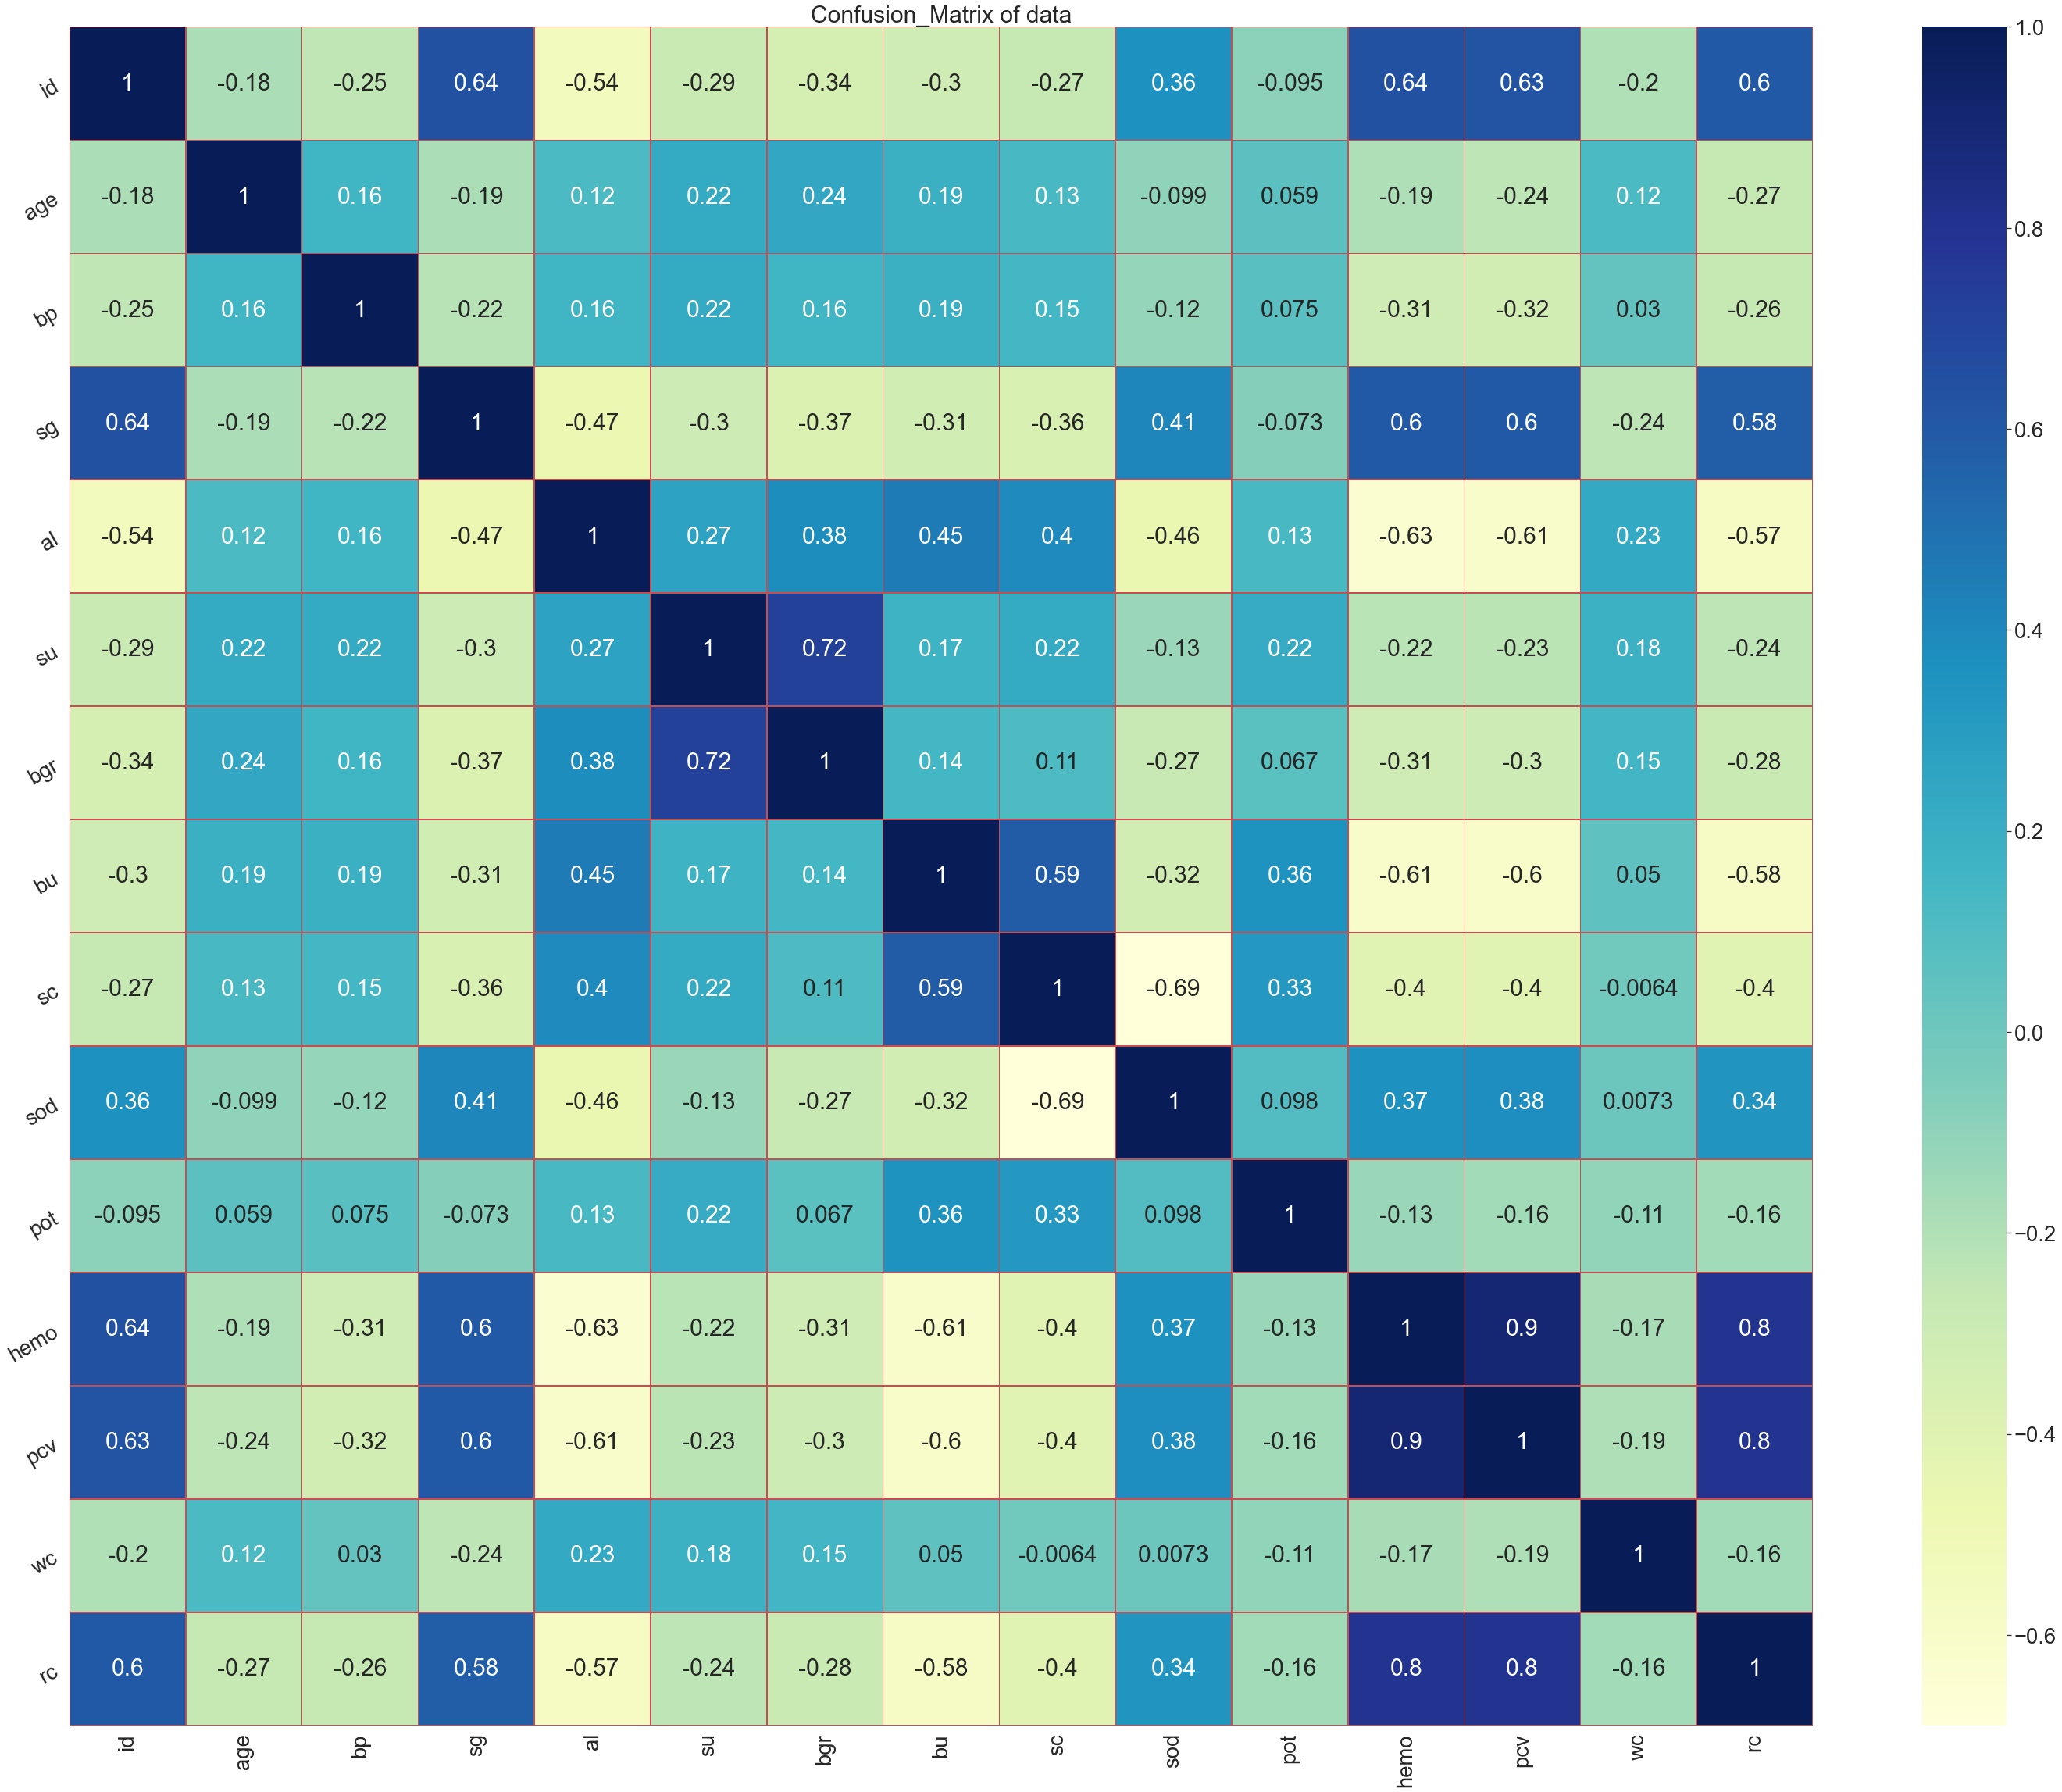

In [60]:
# Visualize The Feathure Correlations ::
sns.set( rc = {"figure.figsize" : [50 , 40]} , font_scale=2.5)
sns.heatmap(Con_Matrix , annot=True , cmap="YlGnBu" , linecolor="r" , linewidths=0.5)
plt.xticks(rotation = 90)
plt.yticks(rotation = 30)
plt.title("Confusion_Matrix of data")
# RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           399 non-null    float64
 1   age          385 non-null    float64
 2   bp           388 non-null    float64
 3   sg           353 non-null    float64
 4   al           354 non-null    float64
 5   su           351 non-null    float64
 6   rbc          248 non-null    object 
 7   pc           335 non-null    object 
 8   pcc          396 non-null    object 
 9   ba           396 non-null    object 
 10  bgr          356 non-null    float64
 11  bu           381 non-null    float64
 12  sc           383 non-null    float64
 13  sod          313 non-null    float64
 14  pot          312 non-null    float64
 15  hemo         348 non-null    float64
 16  pcv          314 non-null    float64
 17  wc           294 non-null    float64
 18  rc           269 non-null    float64
 19  htn     

In [62]:
# To Present species of rbc ::
rbcs = df["rbc"].value_counts()
rbcs

normal      201
abnormal     47
Name: rbc, dtype: int64

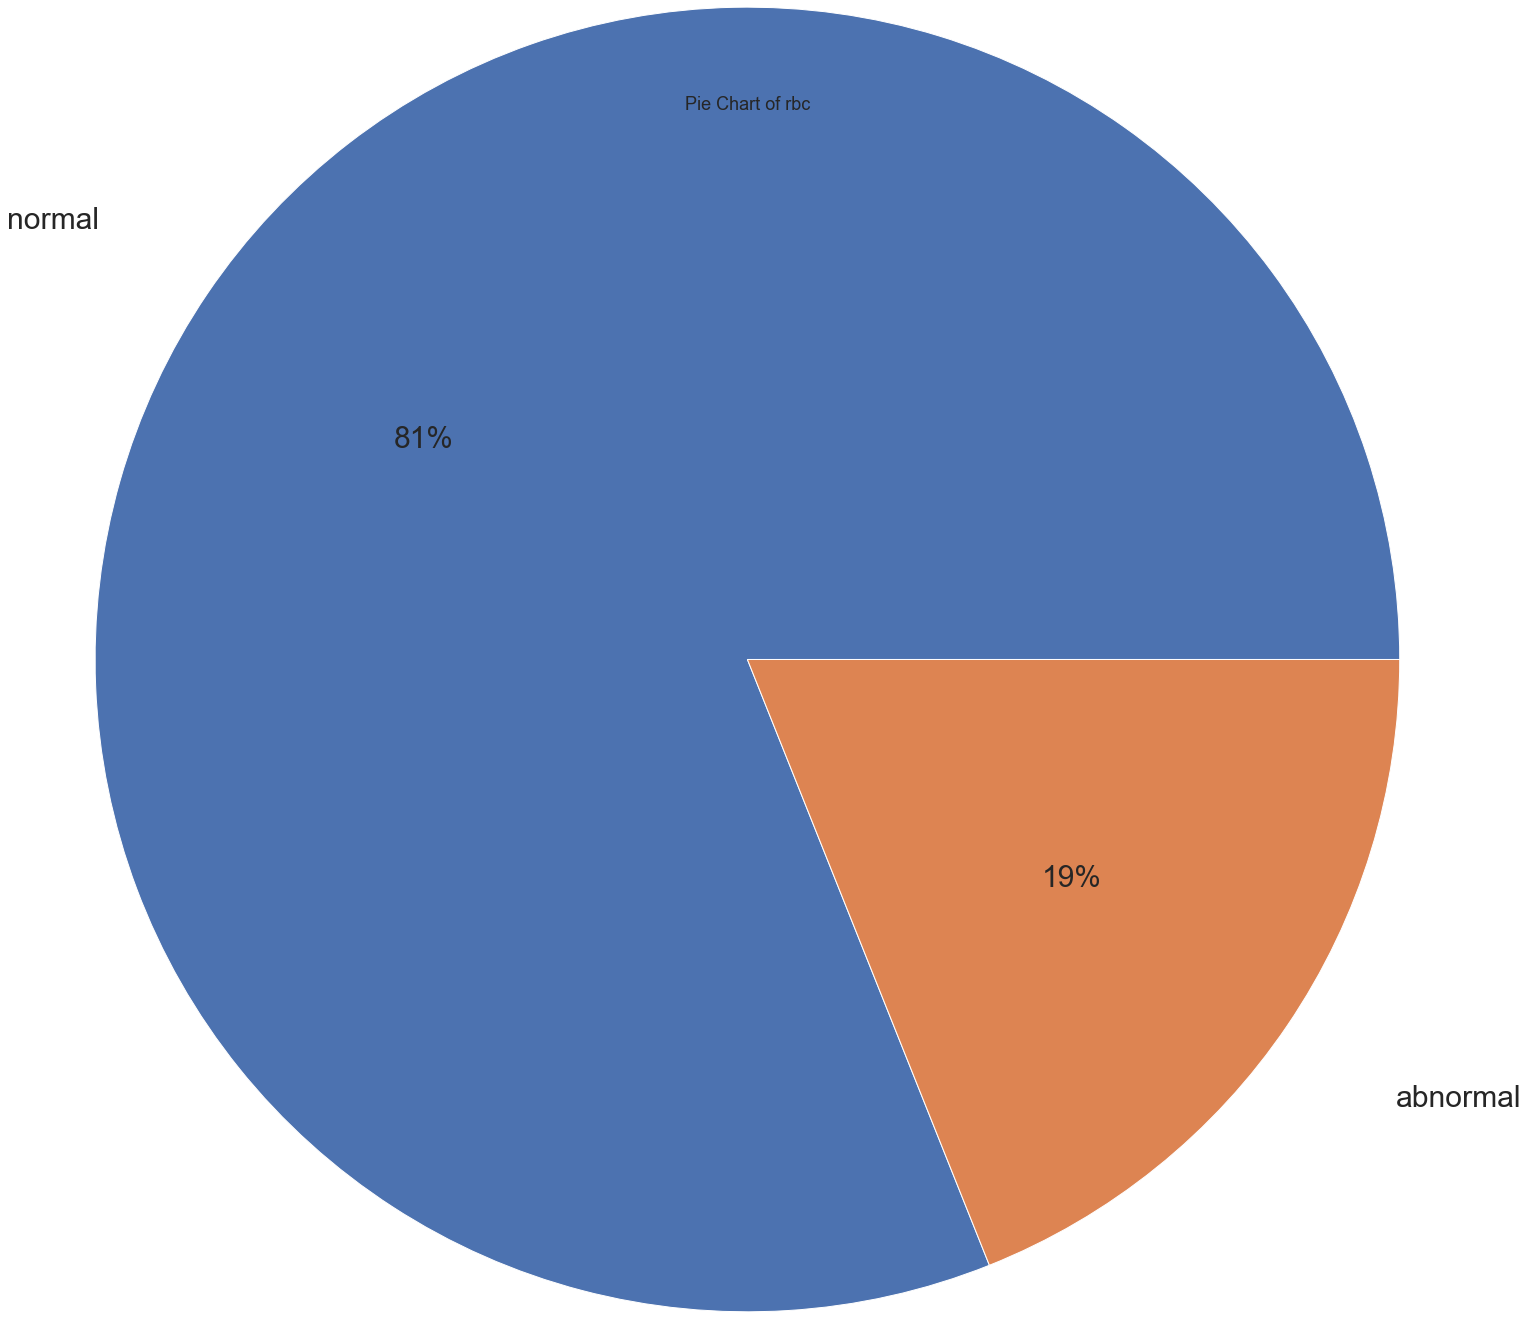

In [63]:
# Visualize Comparing rbc ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
rbcs.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of rbc")
plt.show()

In [64]:
# To Present species of pc ::
pcs = df["pc"].value_counts()
pcs

normal      259
abnormal     76
Name: pc, dtype: int64

Text(0.5, 1.0, 'Pie Chart of pc')

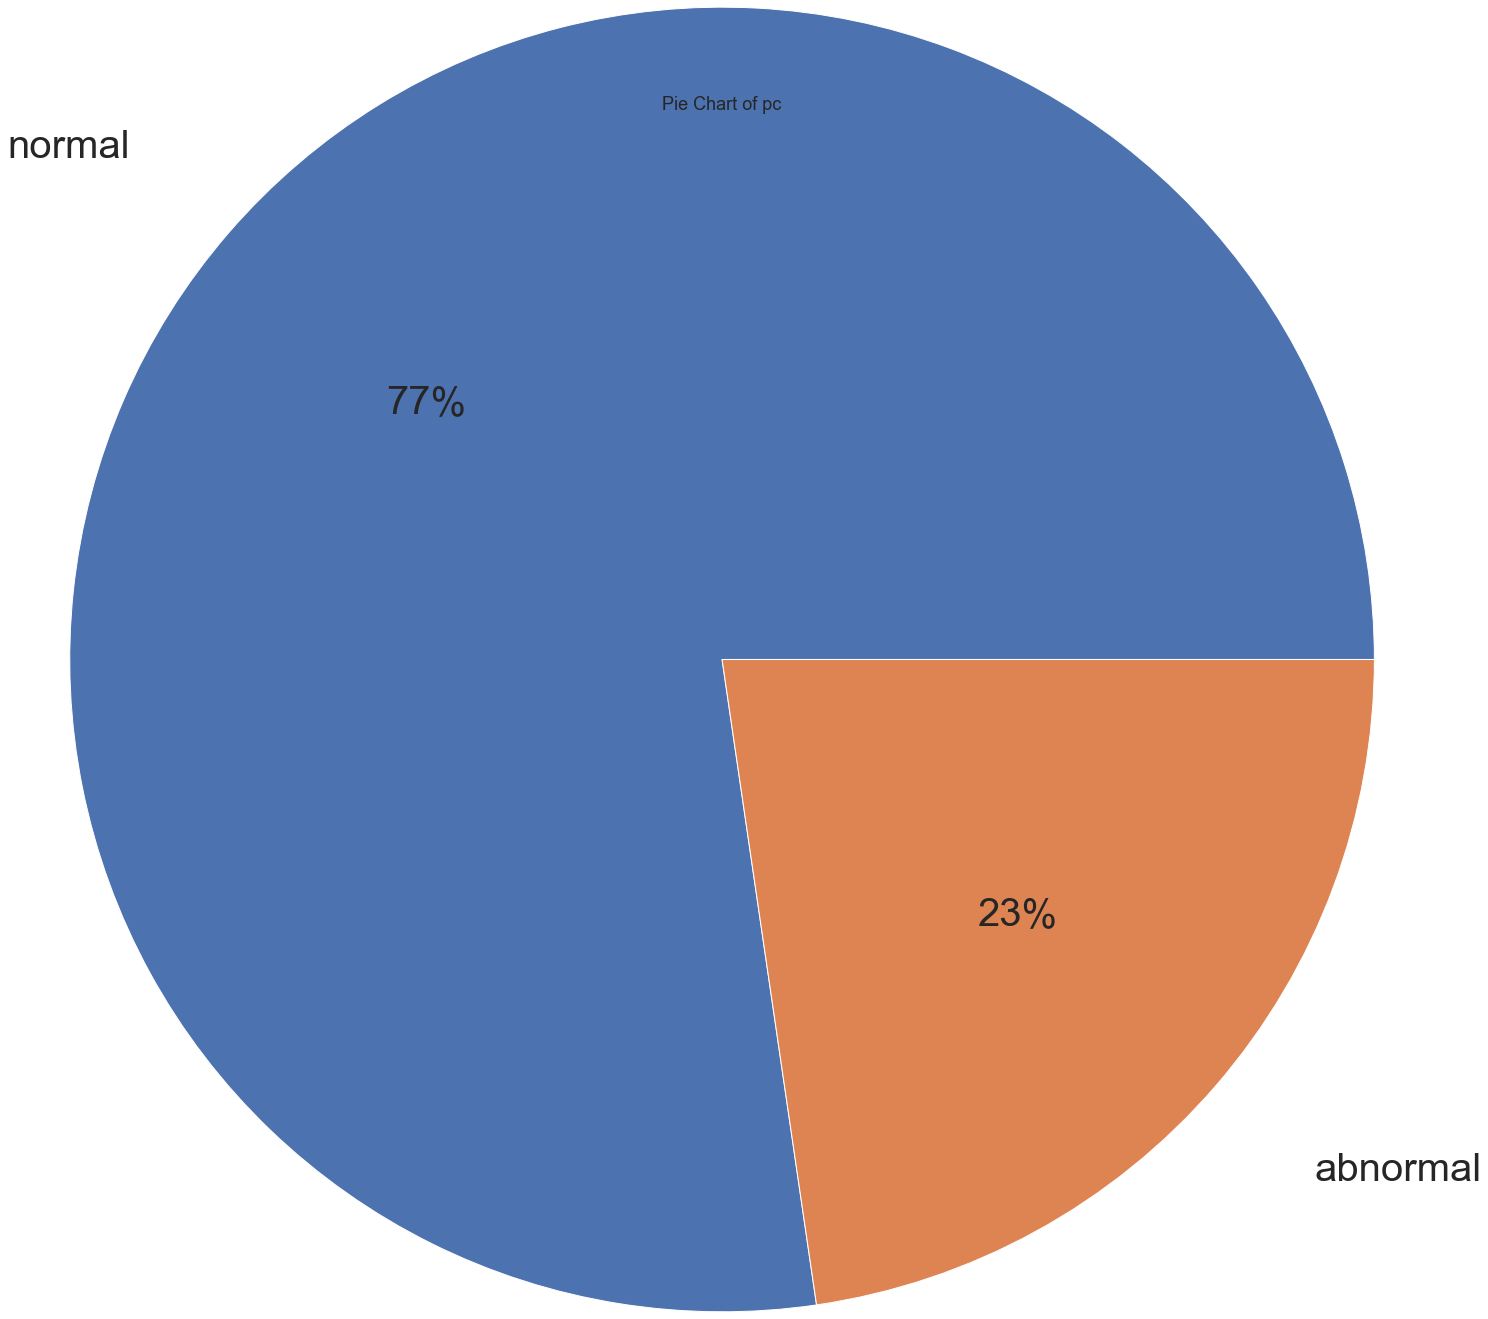

In [65]:
pcs.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of pc")

In [66]:
# To Present species of pcc ::
pccs = df["pcc"].value_counts()
pccs

notpresent    354
present        42
Name: pcc, dtype: int64

Text(0.5, 1.0, 'Pie Chart of pcc')

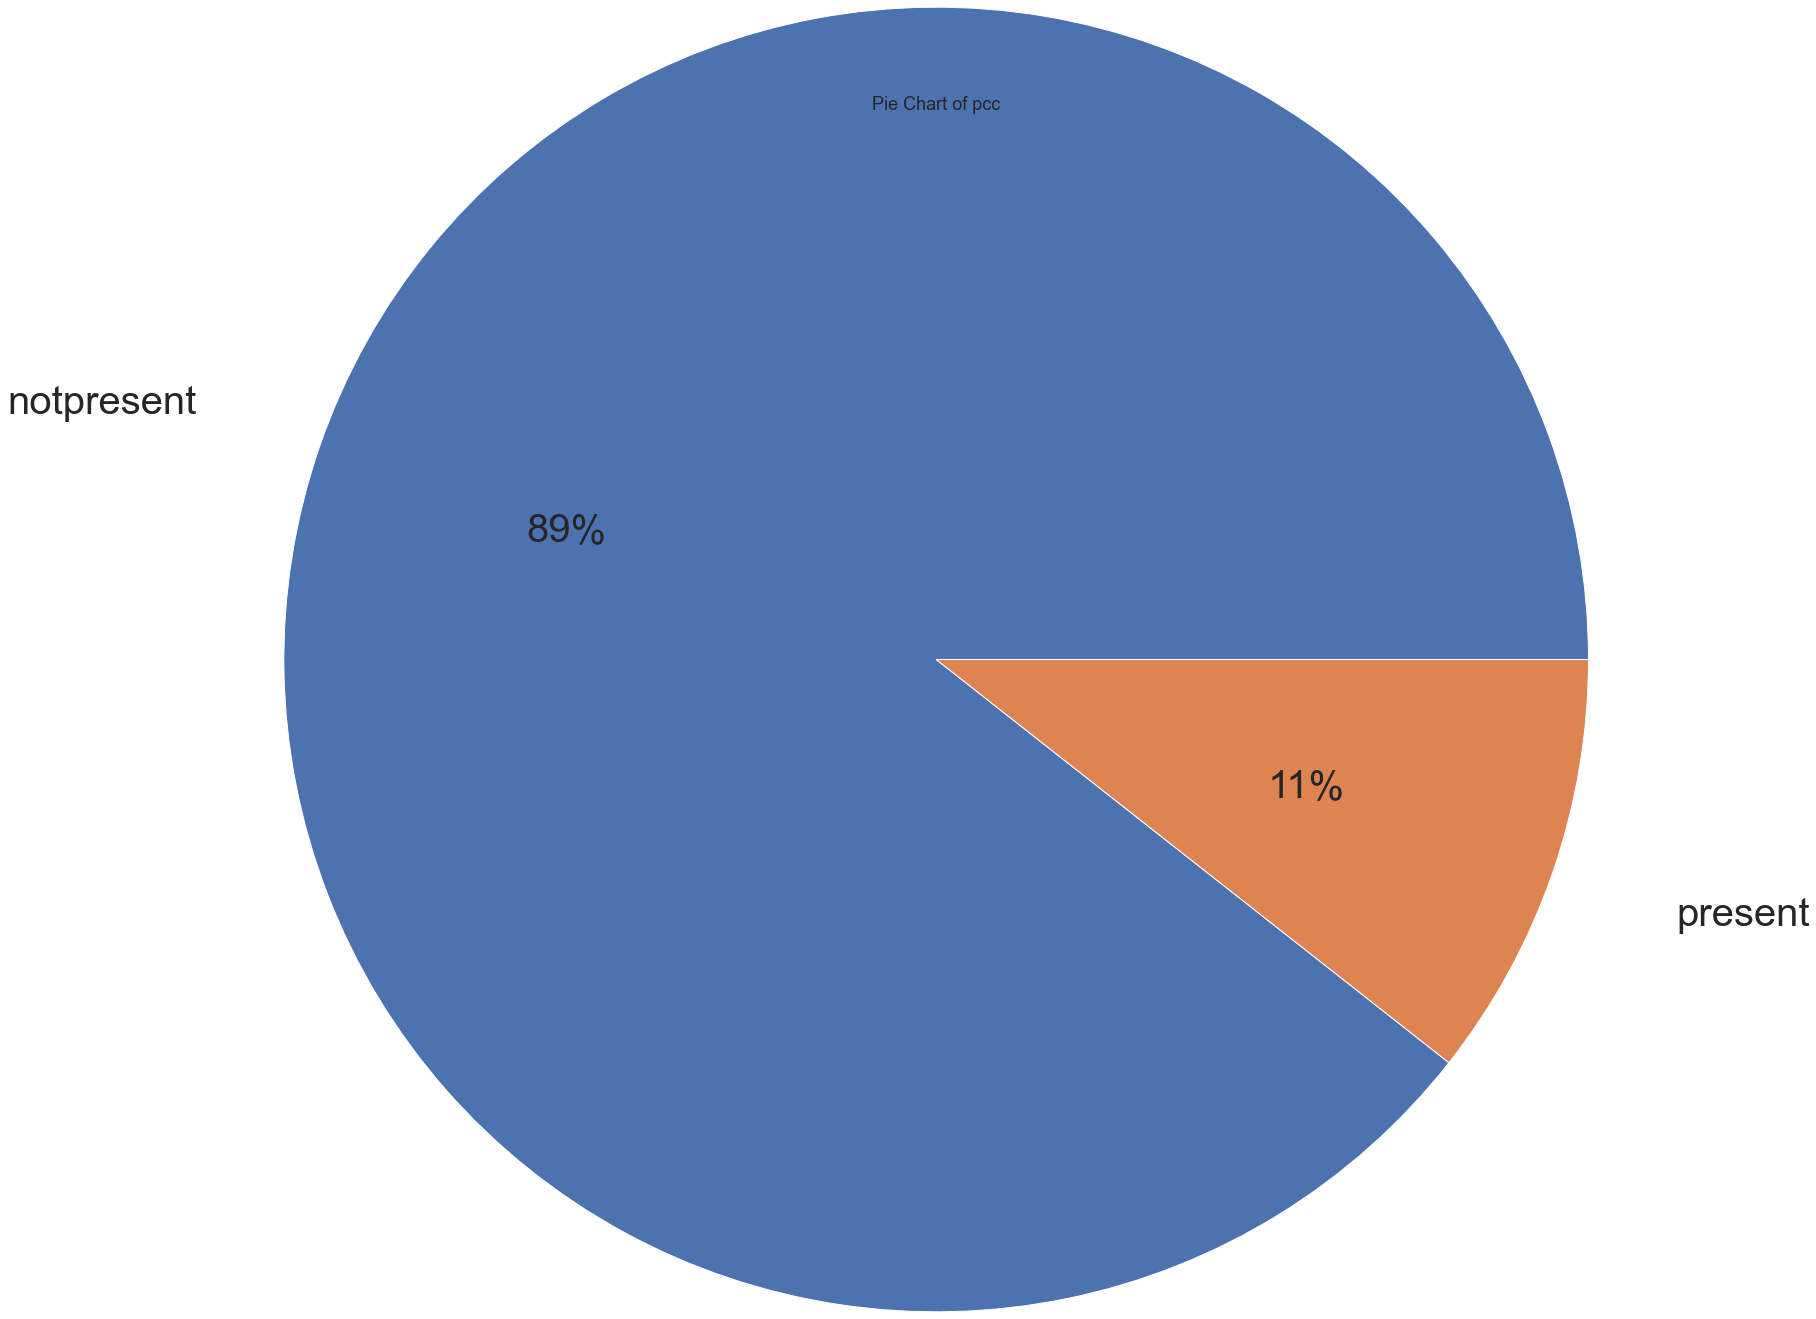

In [67]:
pccs.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of pcc")

In [68]:
# To Present species of ba ::
bas = df["ba"].value_counts()
bas

notpresent    374
present        22
Name: ba, dtype: int64

Text(0.5, 1.0, 'Pie Chart of ba')

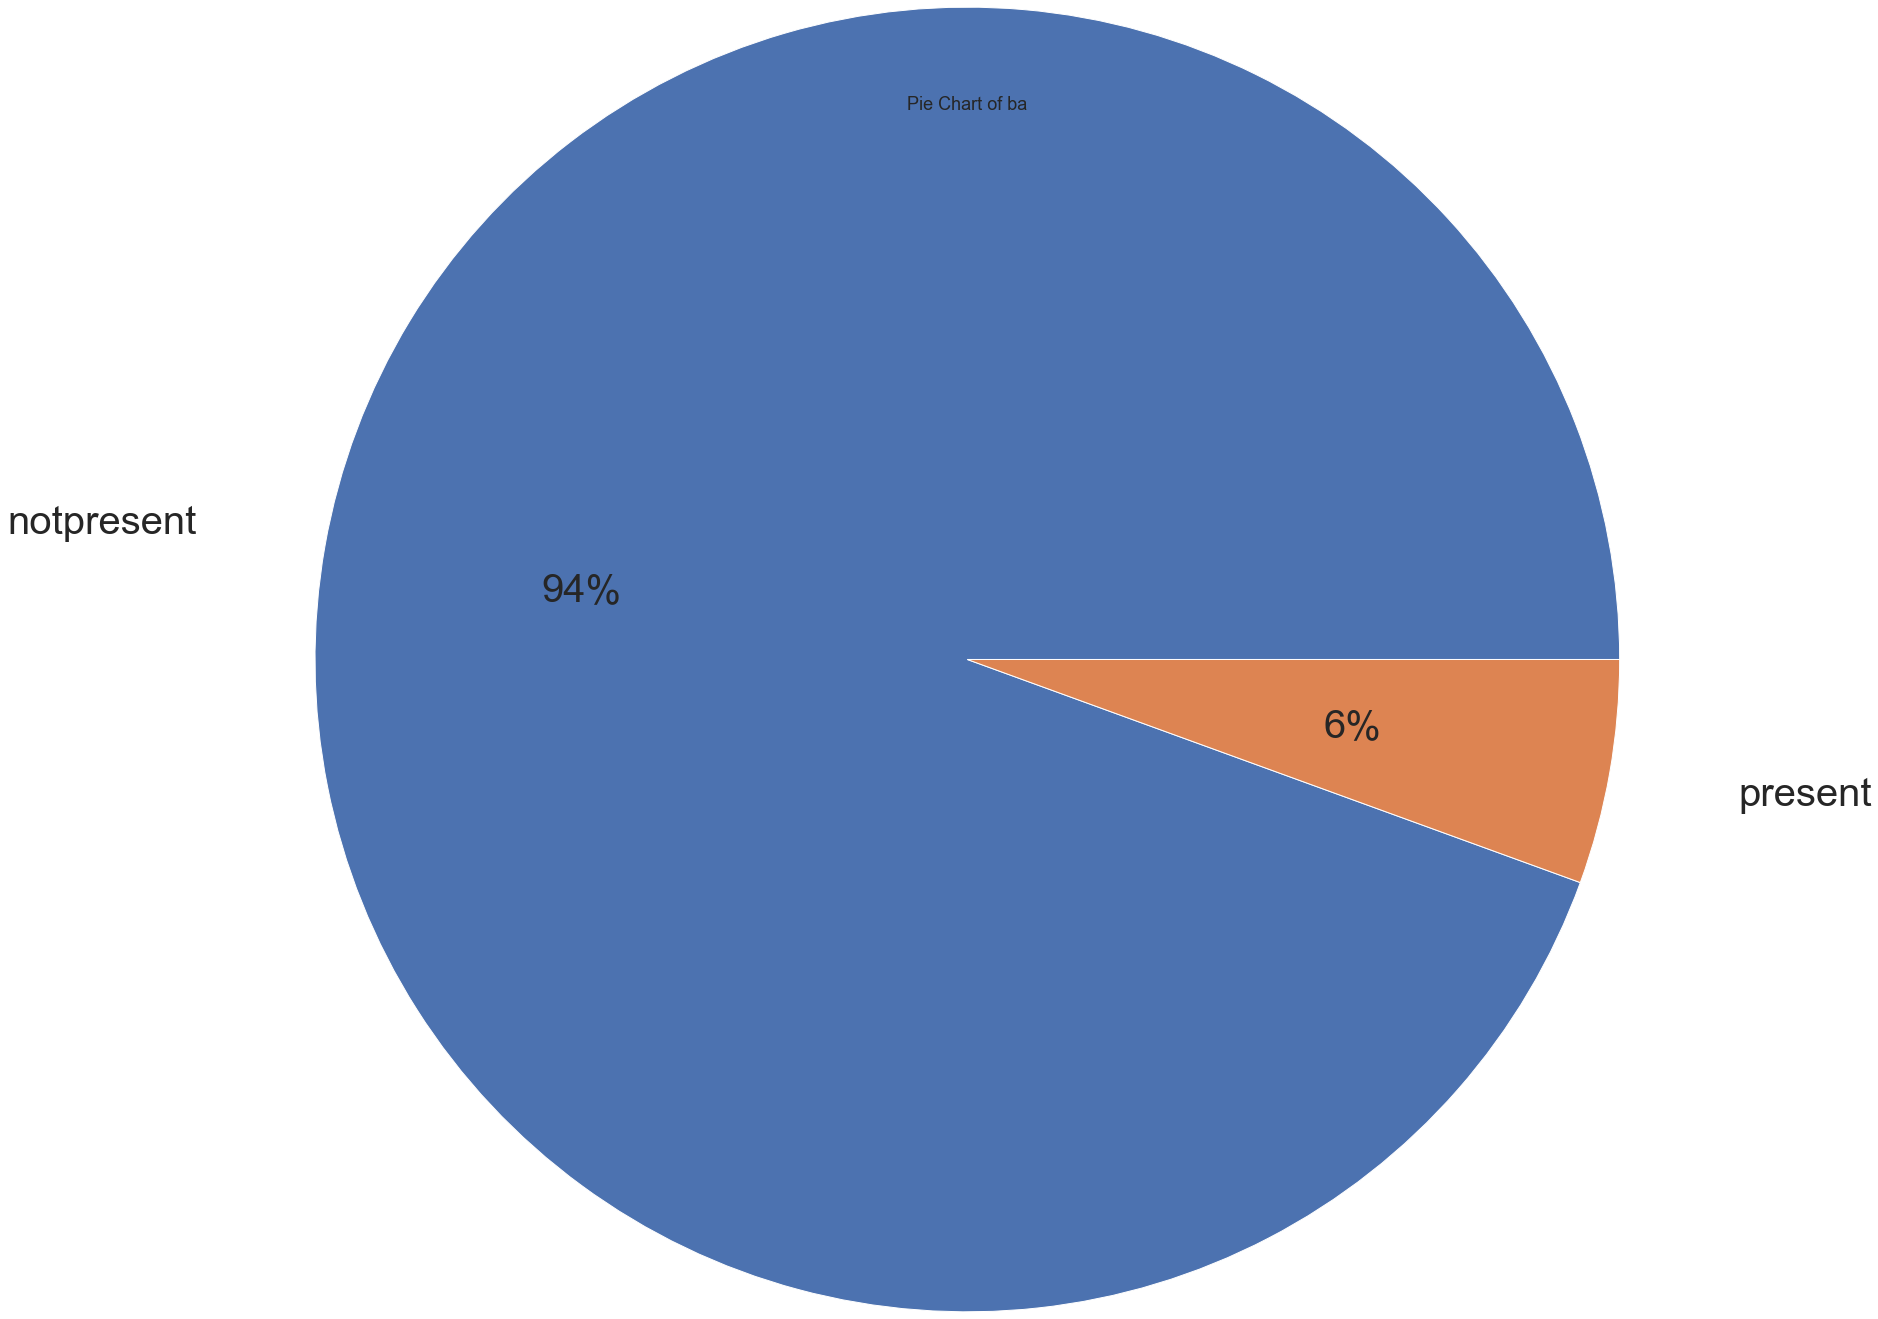

In [69]:
bas.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of ba")

In [70]:
# To Present species of pcv ::
pcvs = df["pcv"].value_counts()[:20]
pcvs

41.0    21
52.0    21
44.0    19
48.0    19
40.0    16
42.0    13
45.0    13
36.0    12
32.0    12
28.0    12
33.0    12
50.0    12
37.0    11
34.0    11
46.0     9
35.0     9
29.0     9
30.0     9
31.0     8
24.0     7
39.0     7
26.0     6
38.0     5
51.0     4
47.0     4
53.0     4
49.0     4
54.0     4
22.0     3
25.0     3
27.0     3
23.0     2
19.0     2
14.0     1
17.0     1
15.0     1
9.0      1
20.0     1
Name: pcv, dtype: int64

Text(0.5, 1.0, 'Pie Chart of pcv')

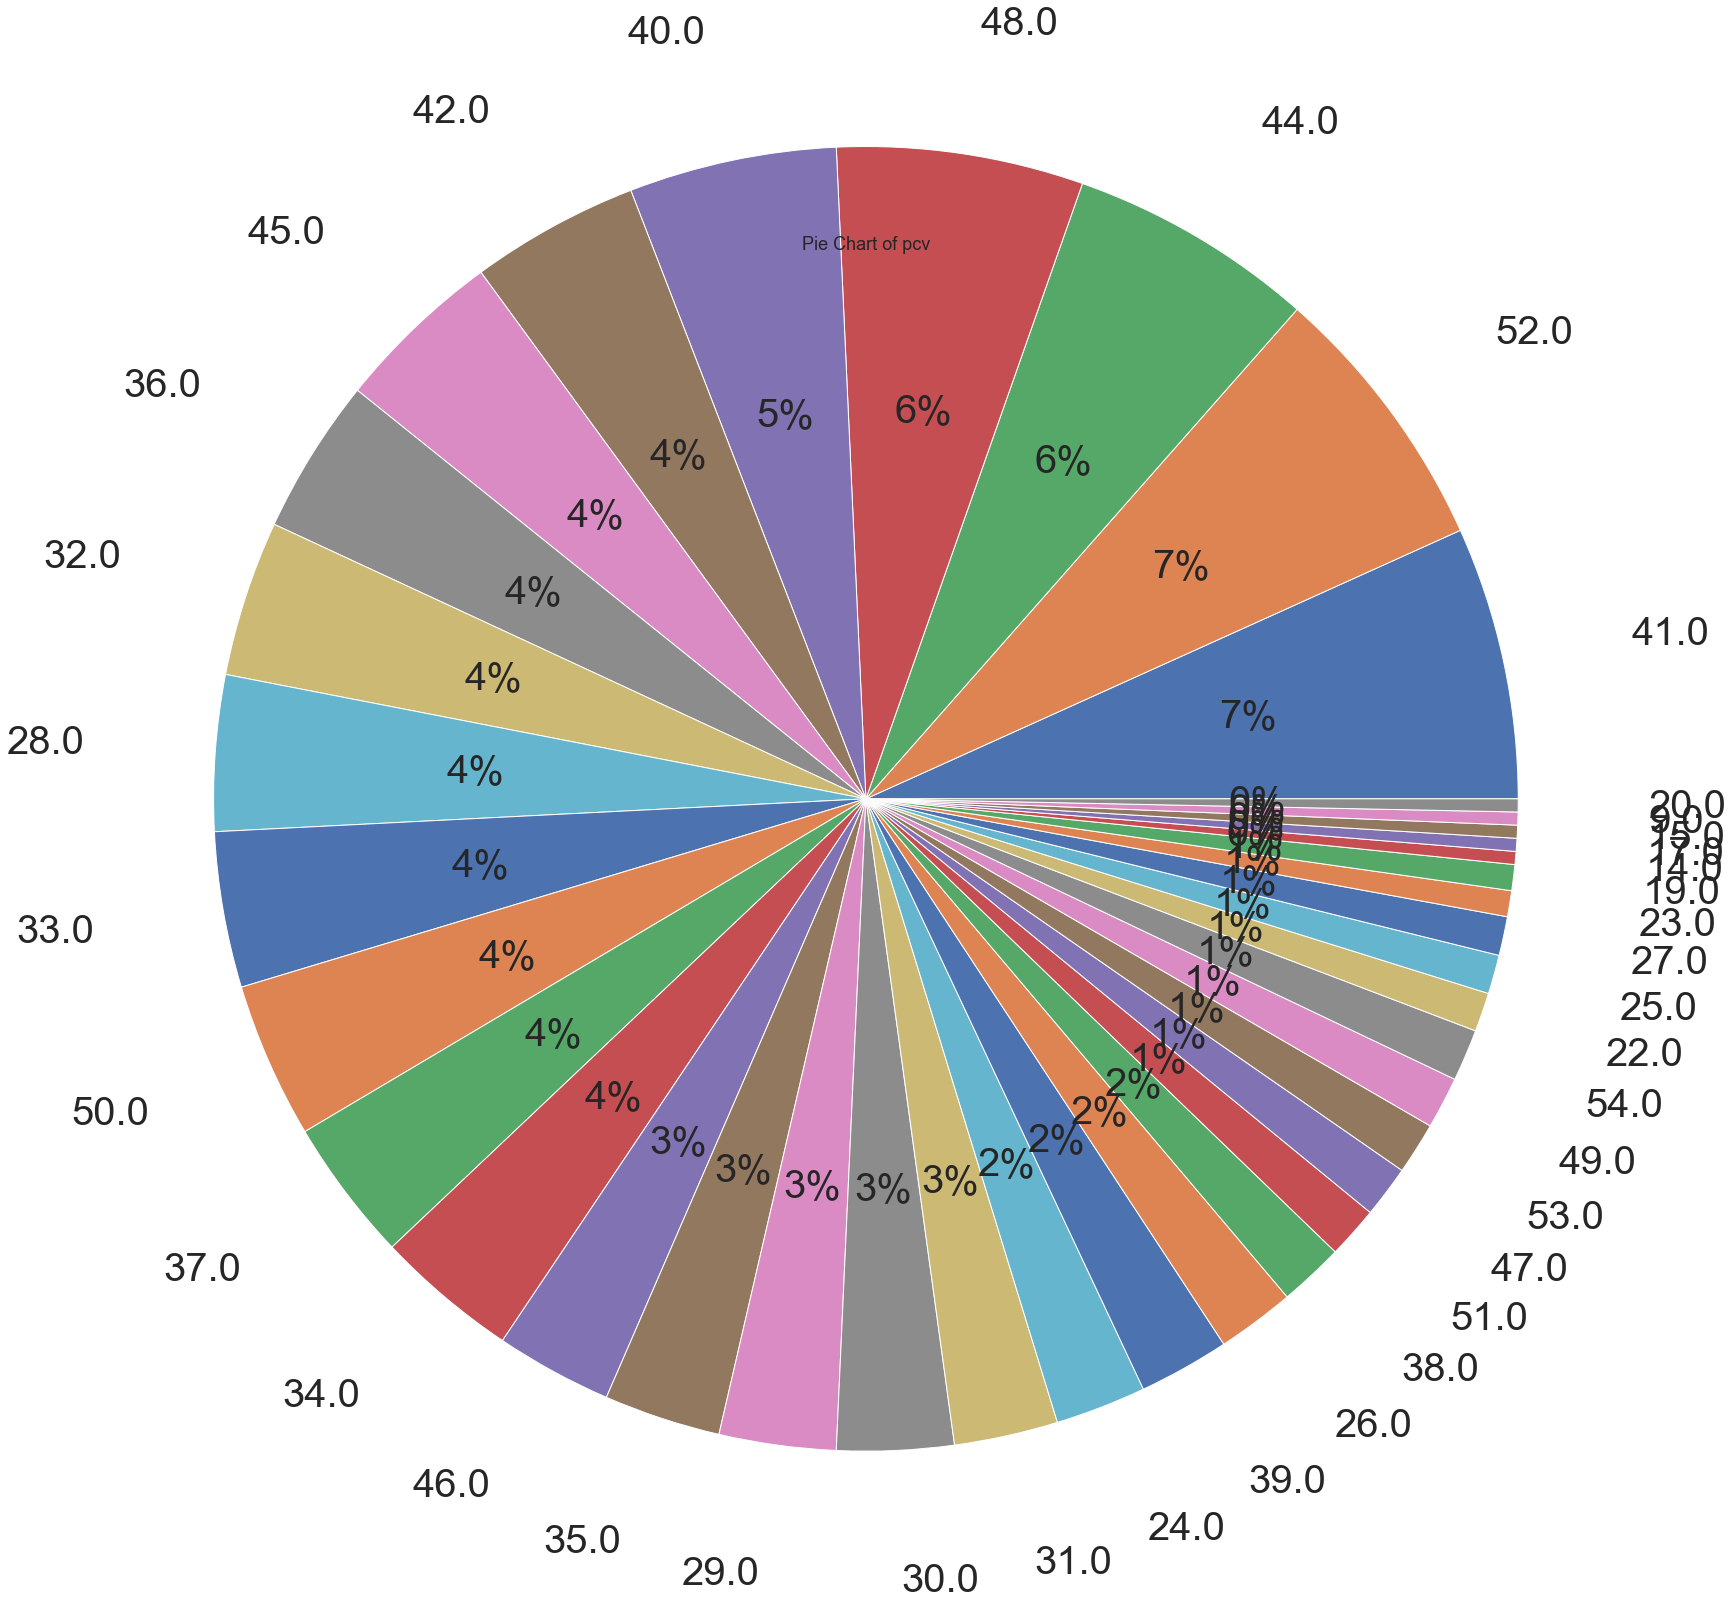

In [71]:
pcvs.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of pcv")

In [72]:
# To Present species of htn ::
htns = df["htn"].value_counts()
htns

no     251
yes    147
Name: htn, dtype: int64

Text(0.5, 1.0, 'Pie Chart of htn')

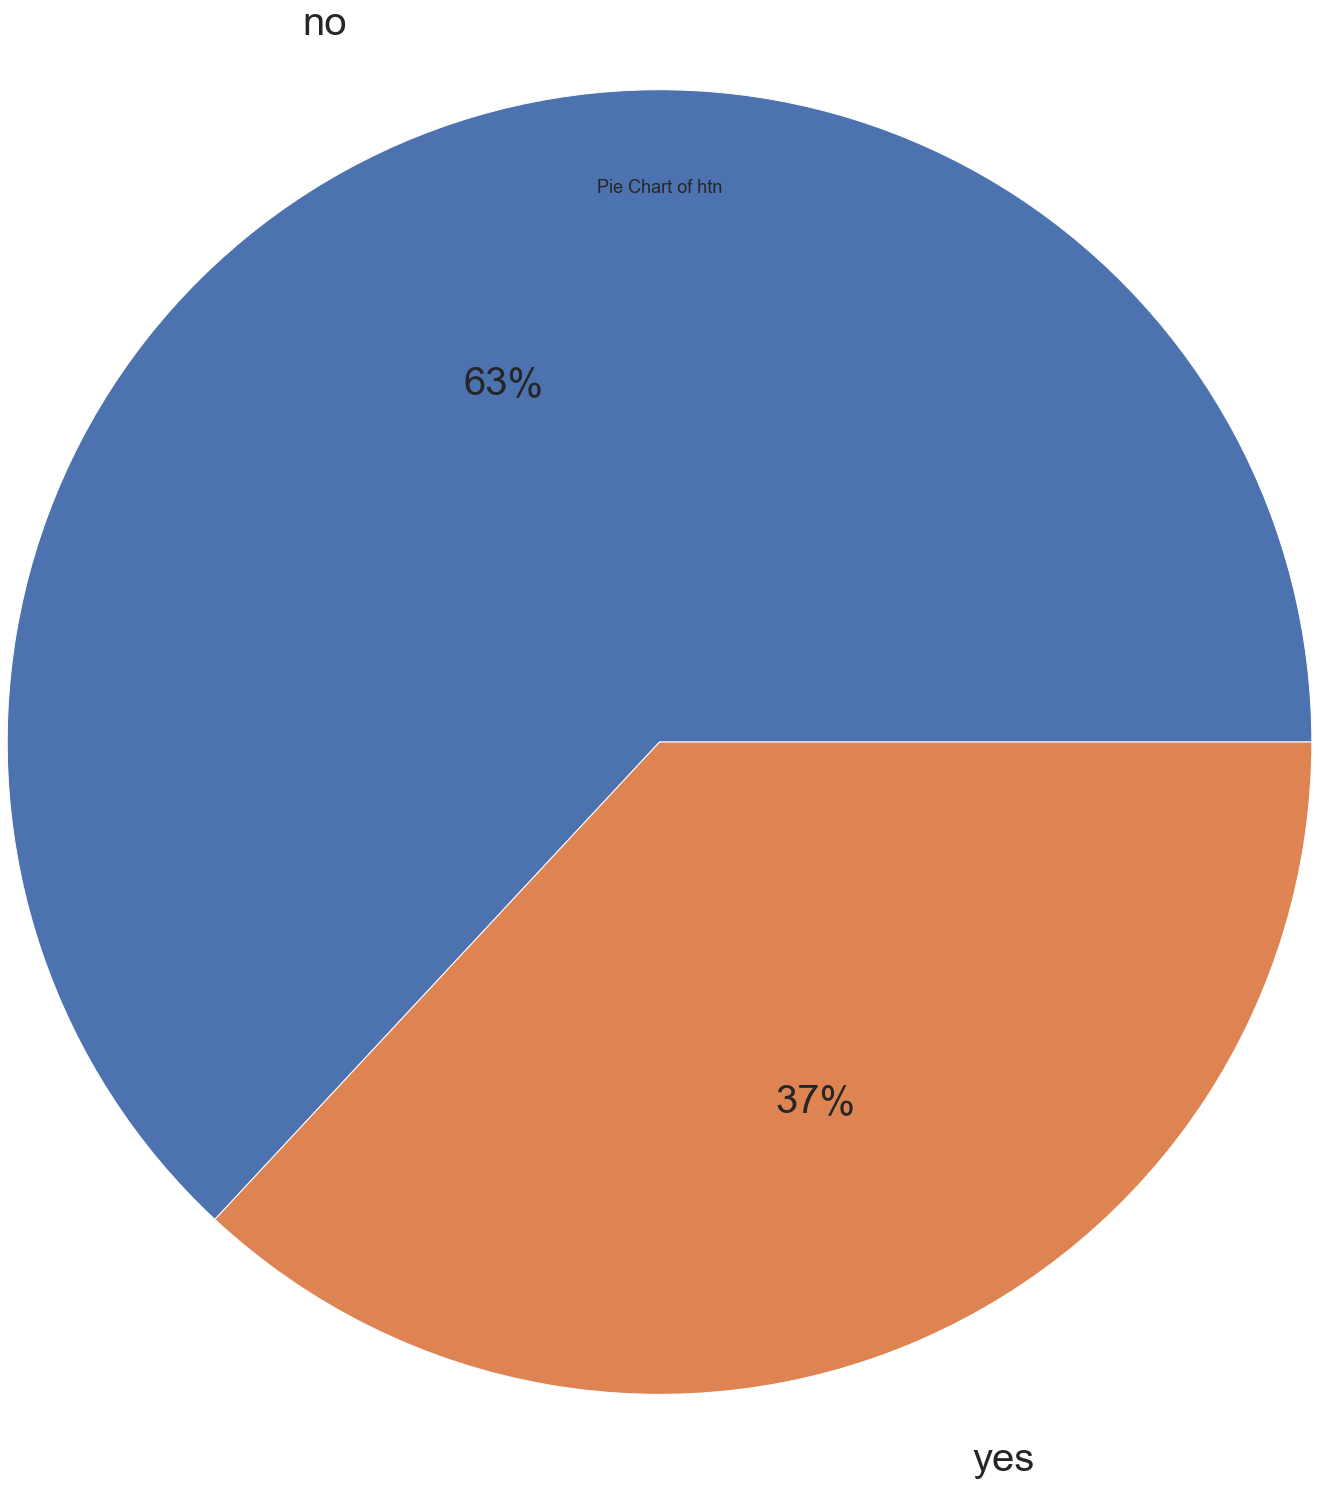

In [73]:
htns.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of htn")

In [74]:
# To Present species of cad ::
cads = df["cad"].value_counts()
cads

no      362
yes      34
\tno      2
Name: cad, dtype: int64

Text(0.5, 1.0, 'Pie Chart of cad')

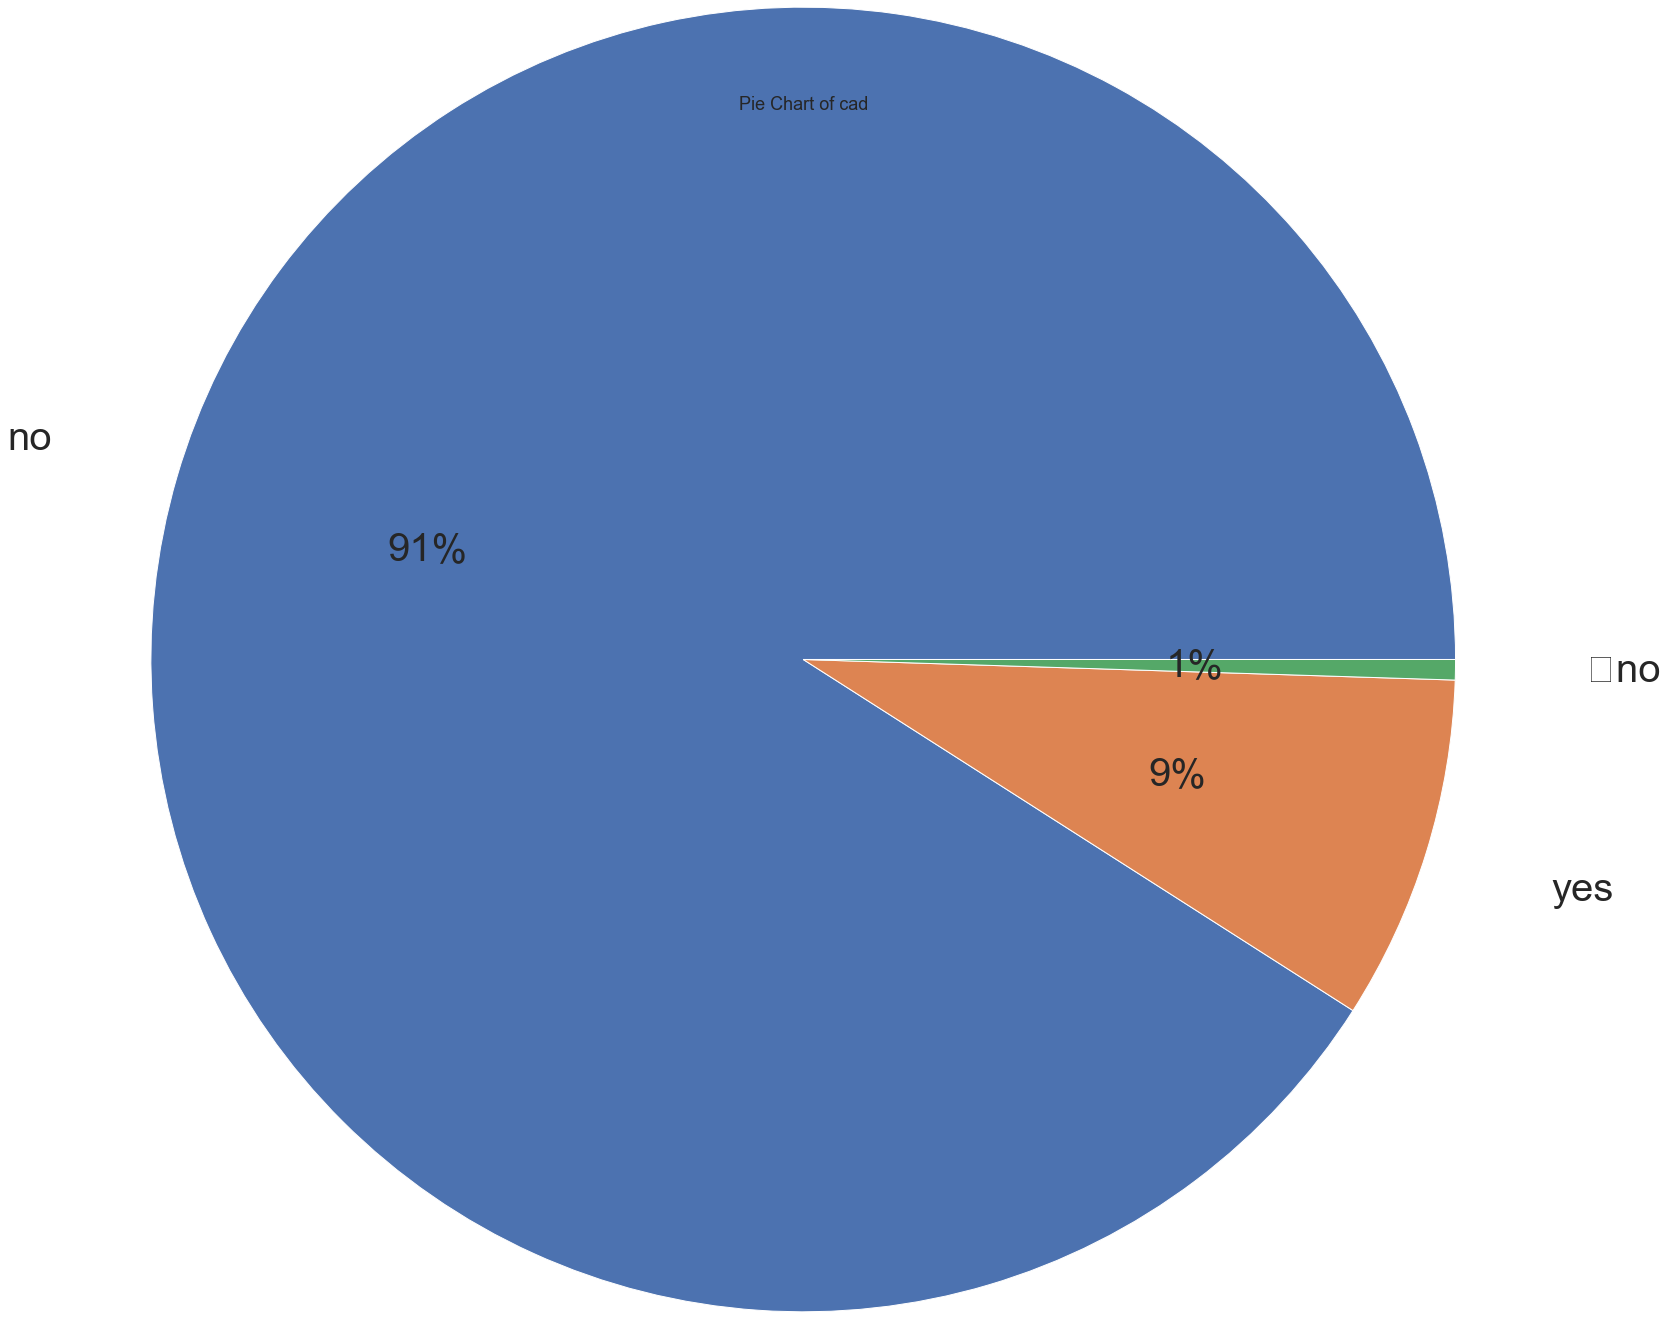

In [75]:
cads.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of cad")

In [76]:
# To Present species of appet ::
appets = df["appet"].value_counts()
appets

good    317
poor     82
Name: appet, dtype: int64

Text(0.5, 1.0, 'Pie Chart of appet')

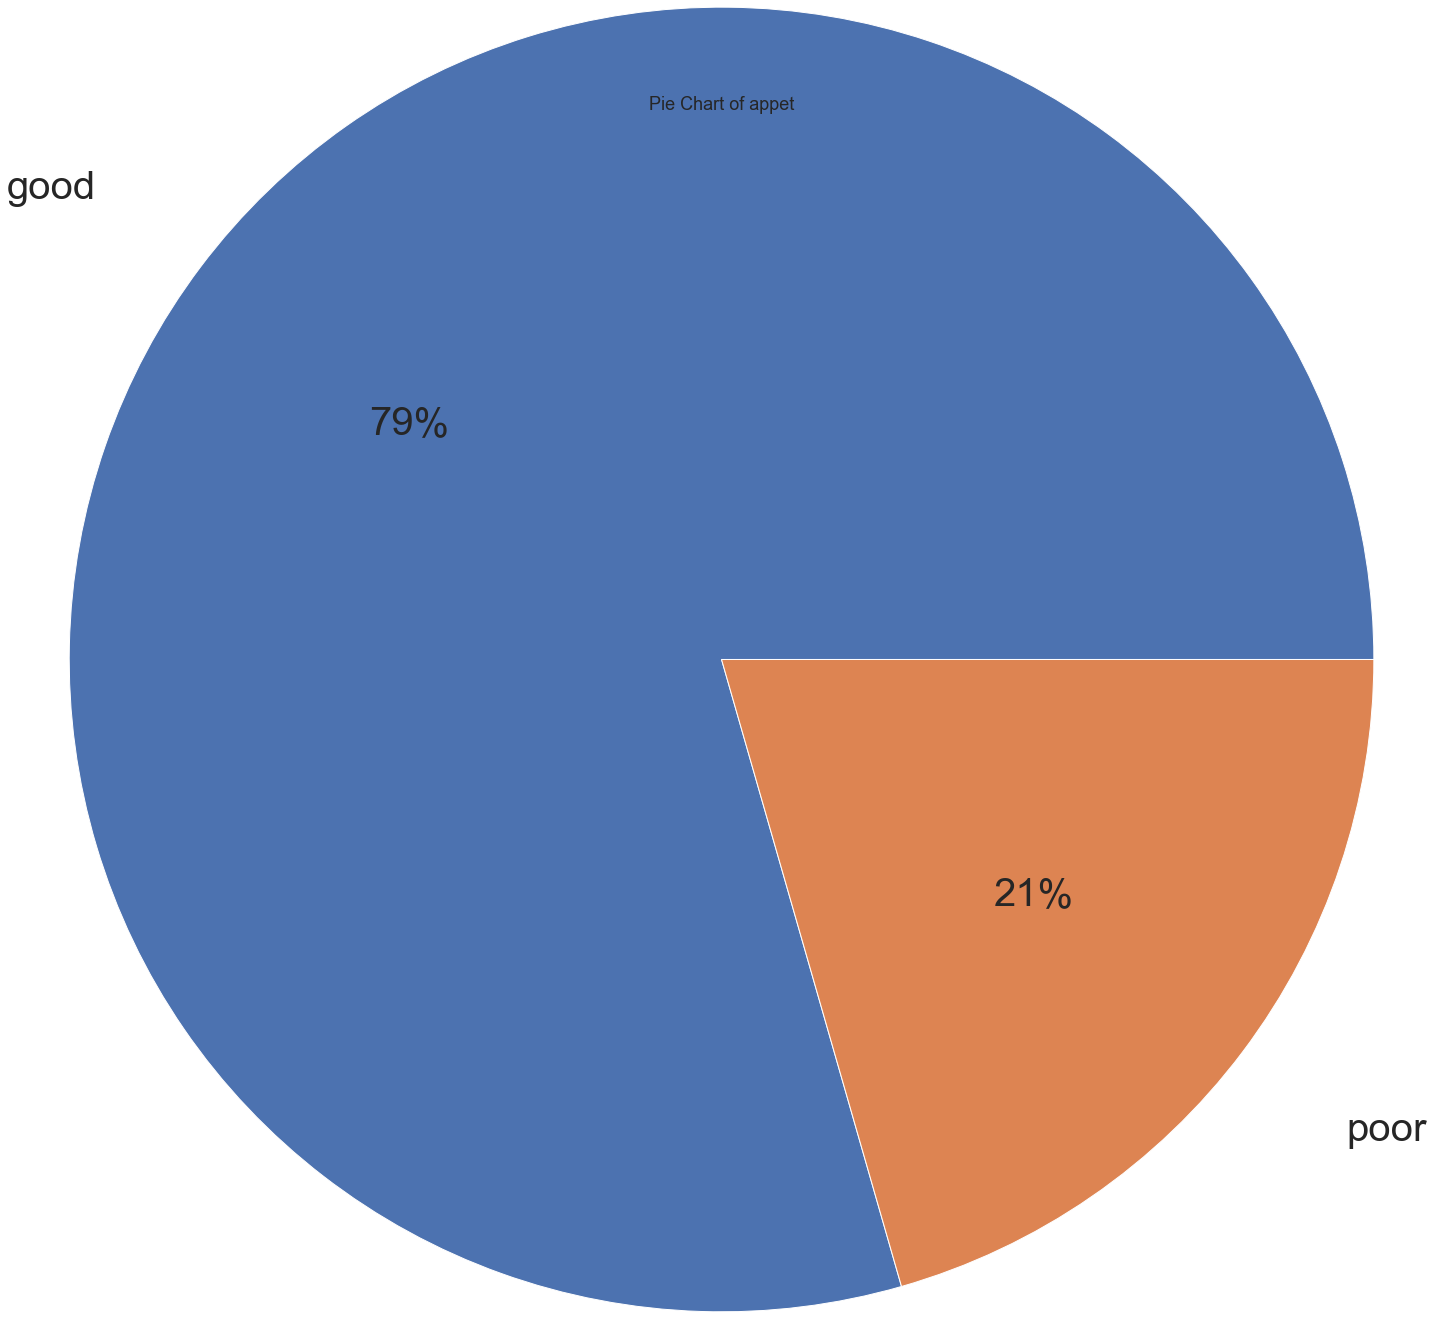

In [77]:
appets.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of appet")

In [78]:
# To Present species of ane ::
anes = df["ane"].value_counts()
anes

no     339
yes     60
Name: ane, dtype: int64

Text(0.5, 1.0, 'Pie Chart of ane')

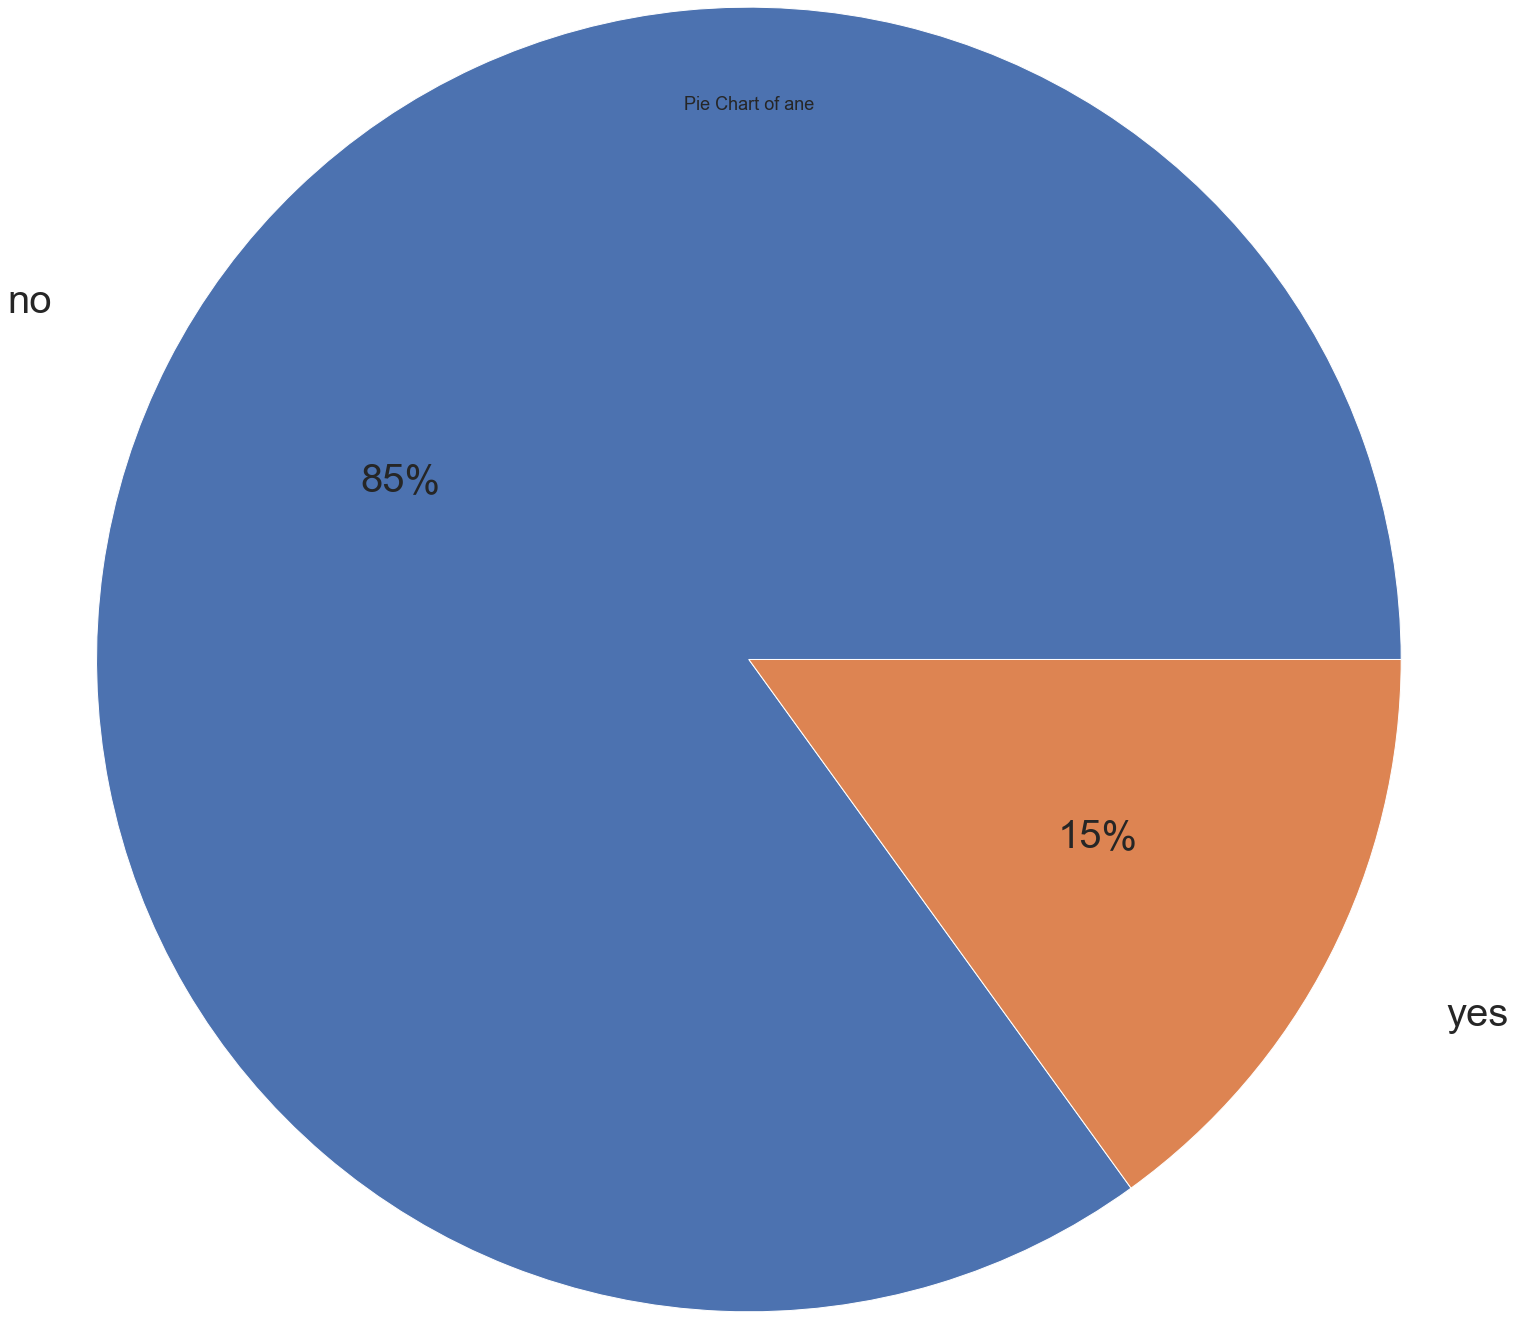

In [79]:
anes.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of ane")

In [80]:
# To Present species of pe ::
pes = df["pe"].value_counts()
pes

no     323
yes     76
Name: pe, dtype: int64

Text(0.5, 1.0, 'Pie Chart of pe')

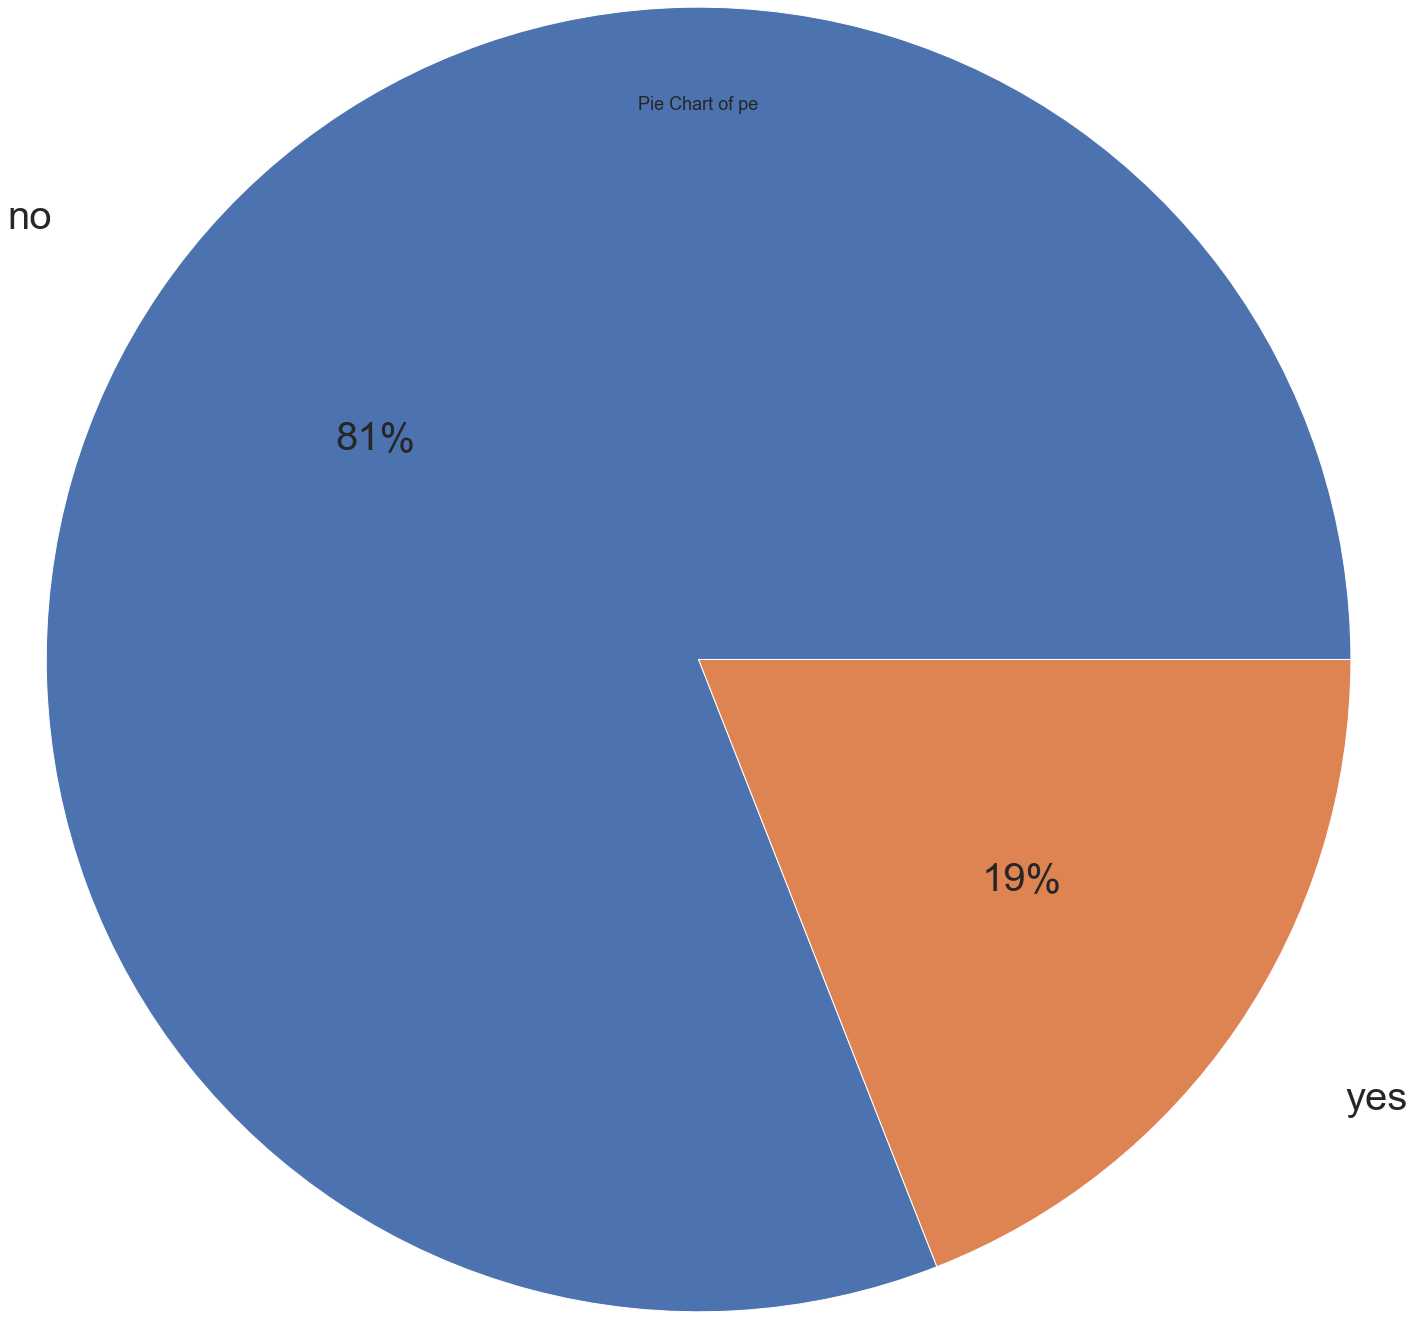

In [81]:
pes.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of pe")

In [82]:
# To Present species of Diagonistic ::
Diagonistics = df["Diagonistic"].value_counts()
Diagonistics

ckd       248
notckd    150
ckd\t       2
Name: Diagonistic, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Diagonistic')

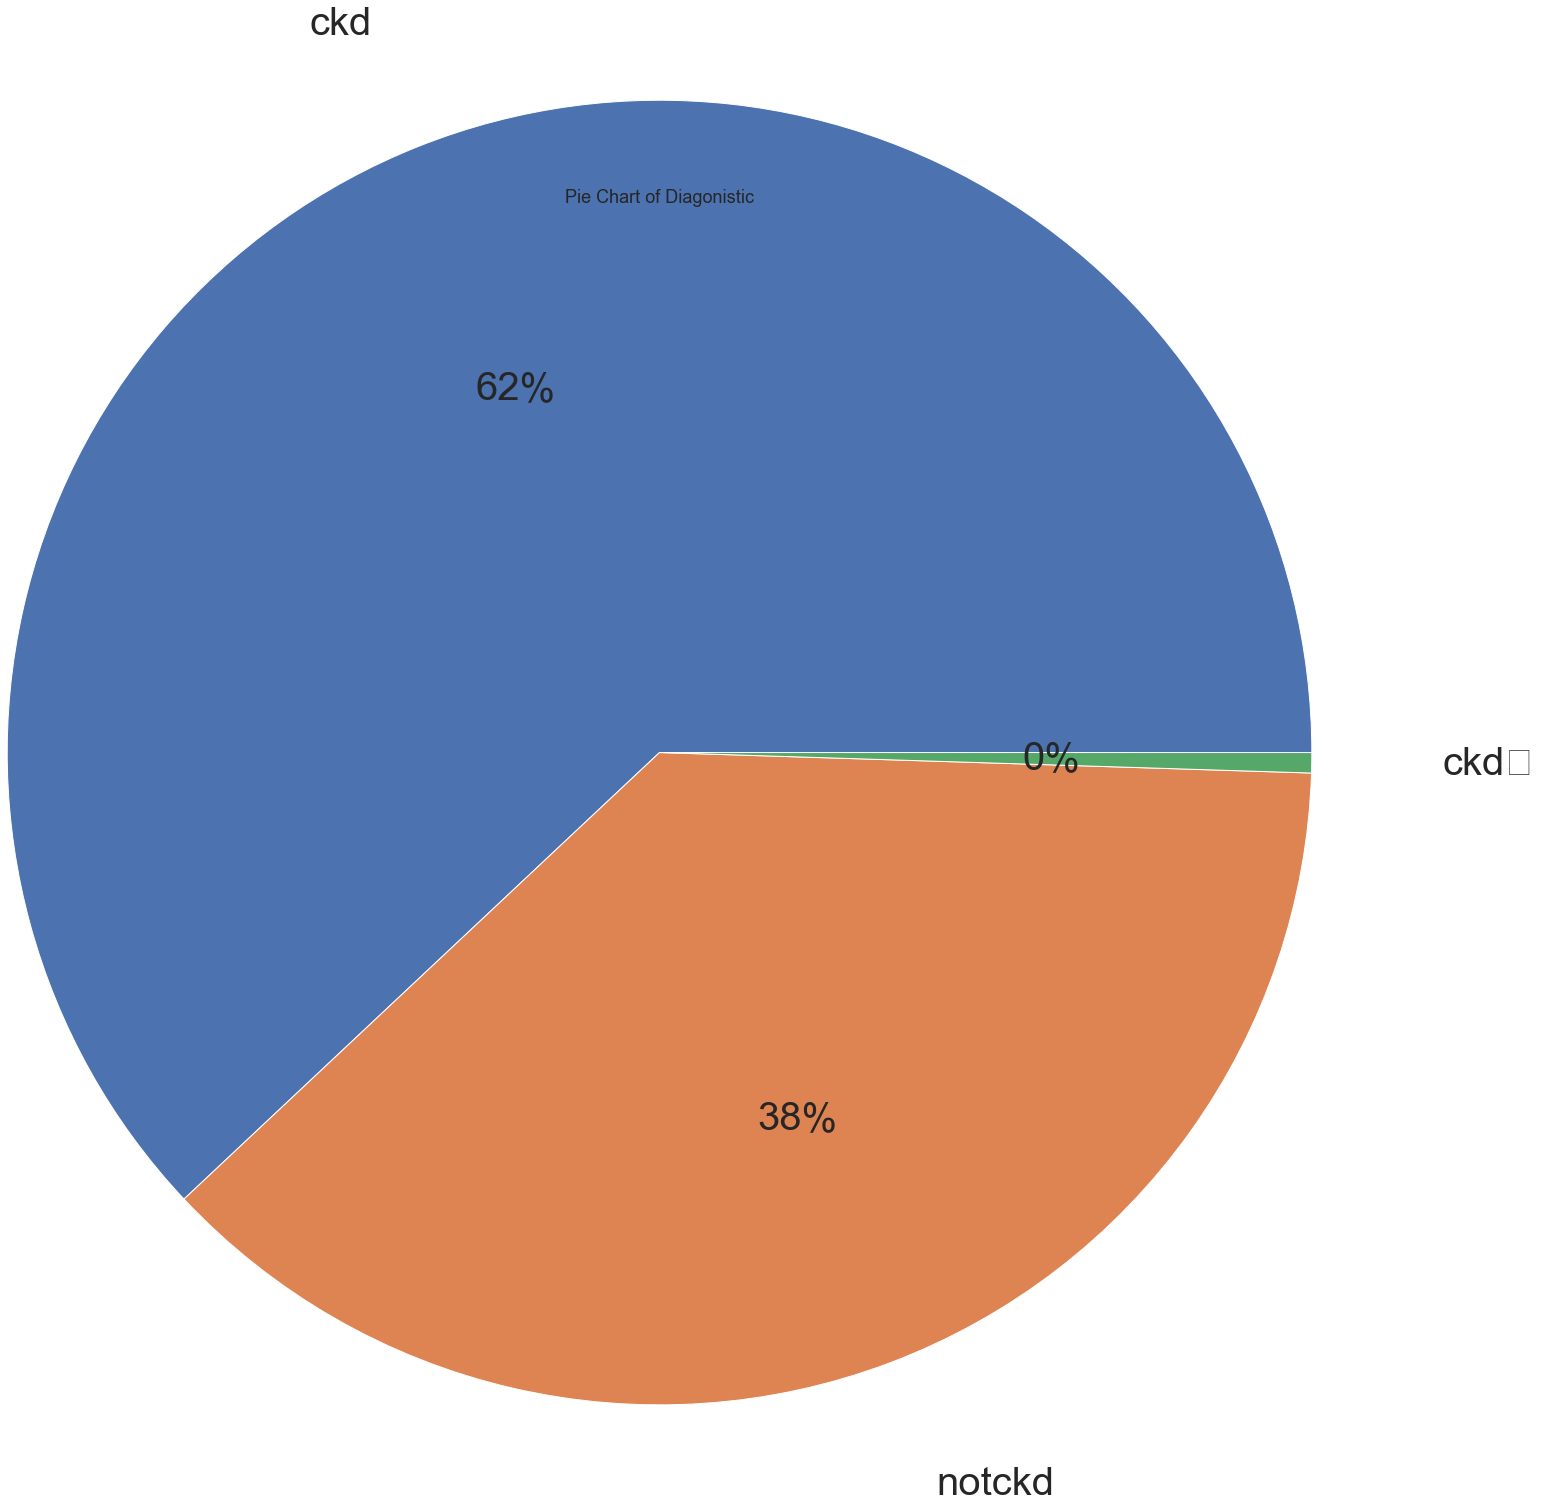

In [83]:
Diagonistics.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 40)
plt.title("Pie Chart of Diagonistic")

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           399 non-null    float64
 1   age          385 non-null    float64
 2   bp           388 non-null    float64
 3   sg           353 non-null    float64
 4   al           354 non-null    float64
 5   su           351 non-null    float64
 6   rbc          248 non-null    object 
 7   pc           335 non-null    object 
 8   pcc          396 non-null    object 
 9   ba           396 non-null    object 
 10  bgr          356 non-null    float64
 11  bu           381 non-null    float64
 12  sc           383 non-null    float64
 13  sod          313 non-null    float64
 14  pot          312 non-null    float64
 15  hemo         348 non-null    float64
 16  pcv          314 non-null    float64
 17  wc           294 non-null    float64
 18  rc           269 non-null    float64
 19  htn     

Text(0.5, 1.0, 'Distribution Plot of age')

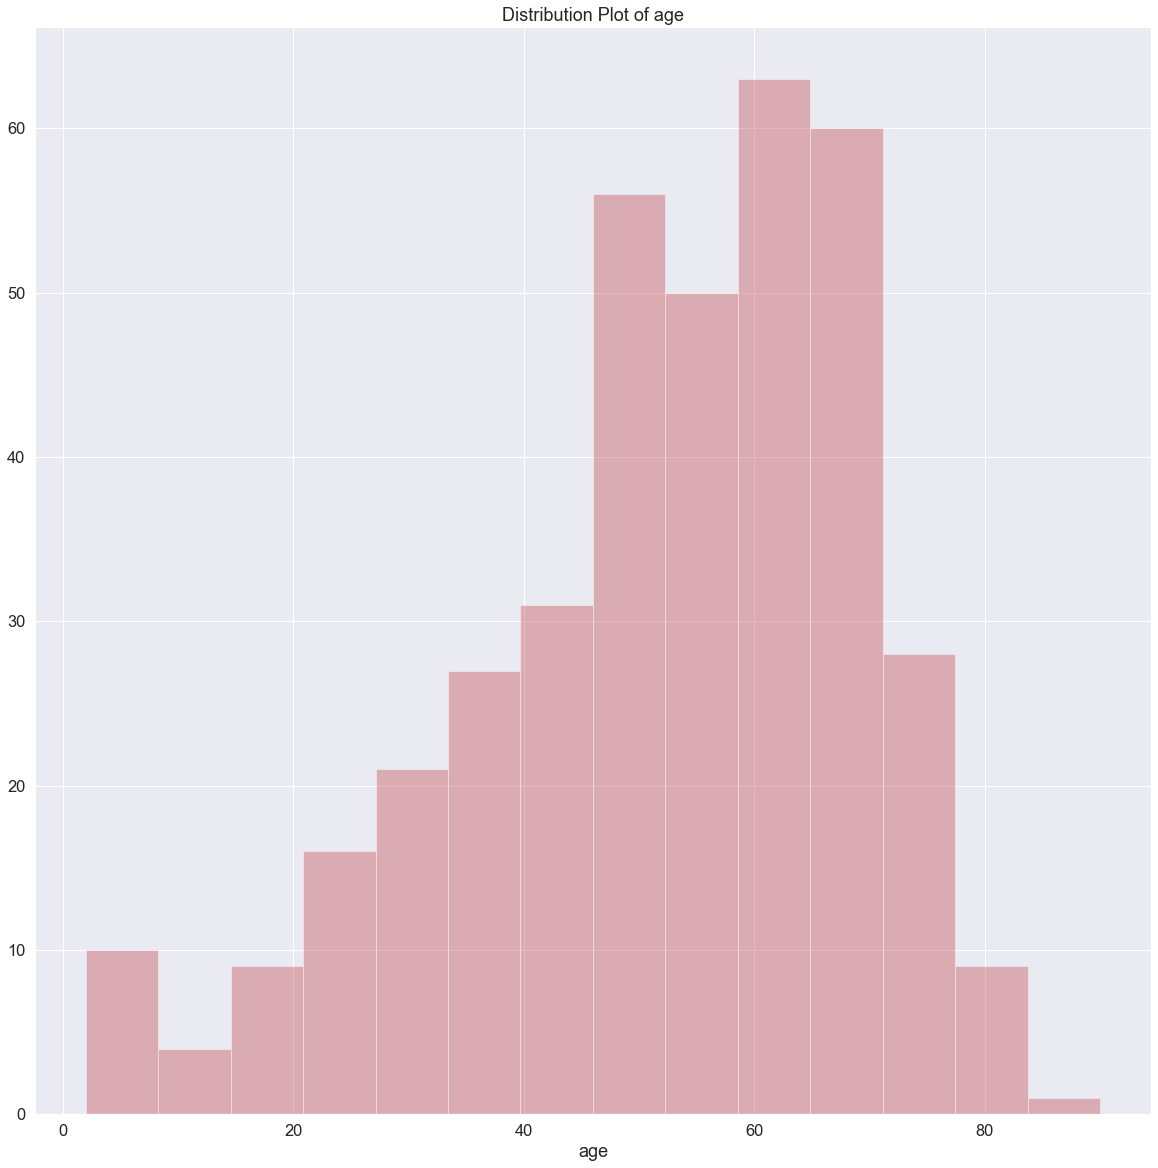

In [85]:
sns.distplot(df["age"] , kde=False , color="r")
plt.title("Distribution Plot of age")

Text(0.5, 1.0, 'Kde Plot of age')

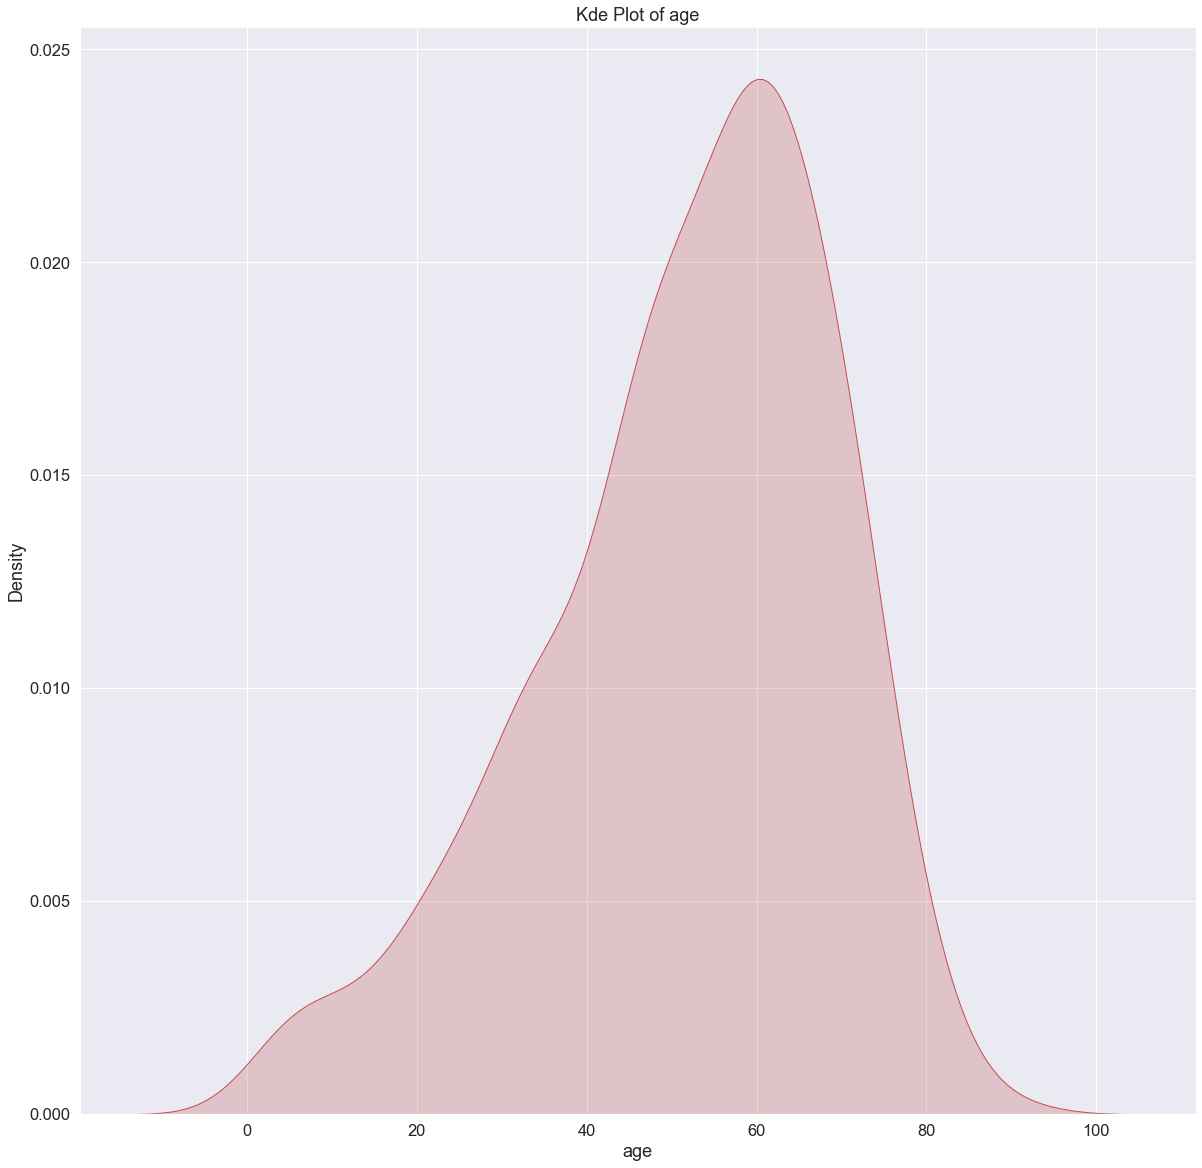

In [86]:
sns.kdeplot(df["age"] , shade=True , color="r")
plt.title("Kde Plot of age")

Text(0.5, 1.0, 'Distribution Plot of bp')

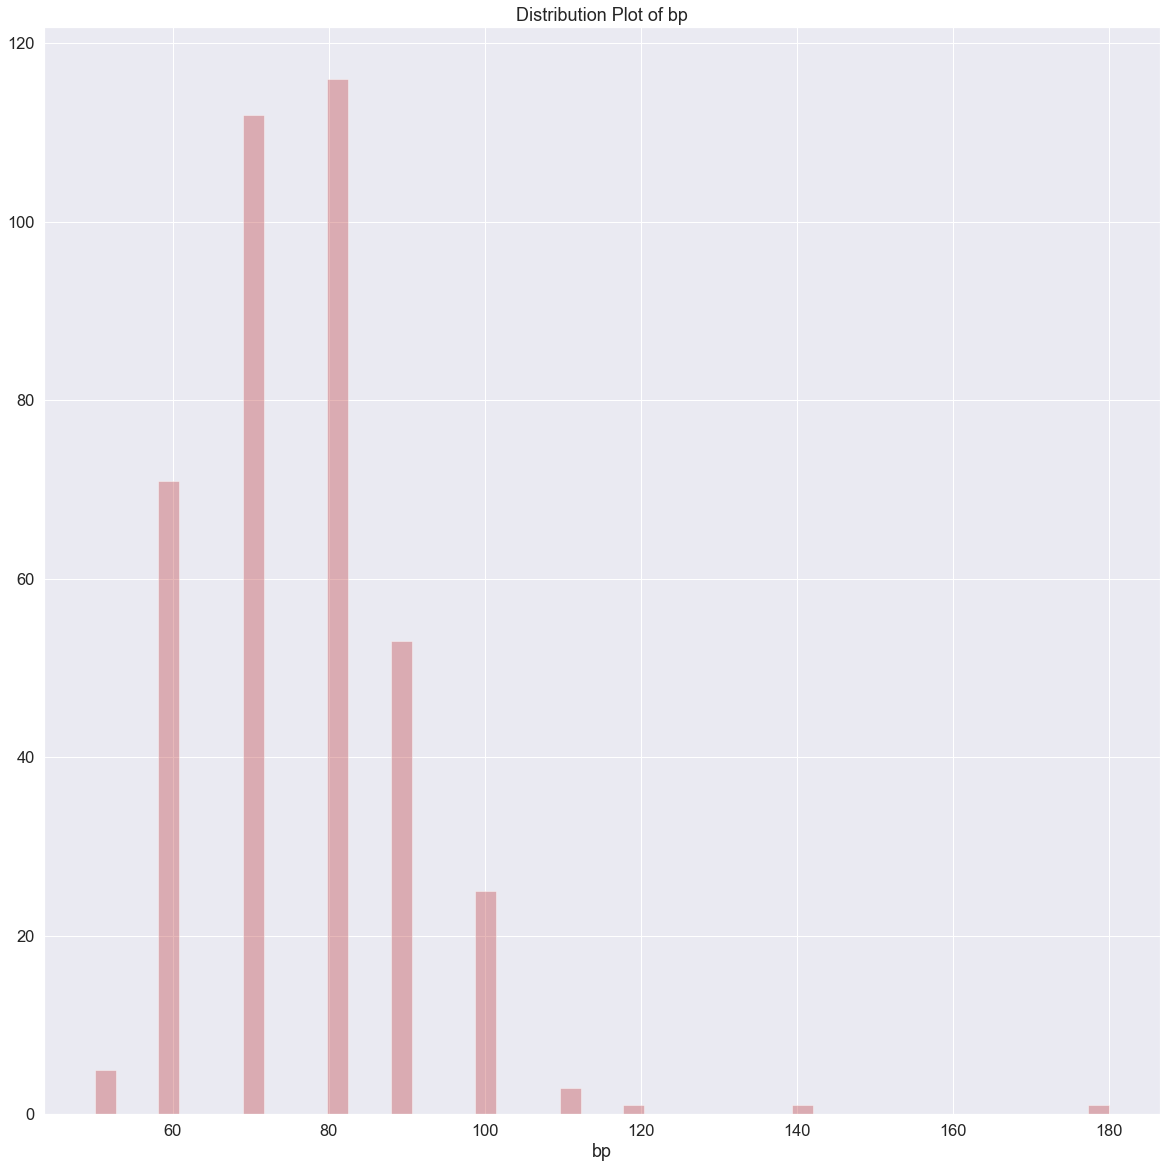

In [87]:
sns.distplot(df["bp"] , kde=False , color="r")
plt.title("Distribution Plot of bp")

Text(0.5, 1.0, 'Kde Plot of bp')

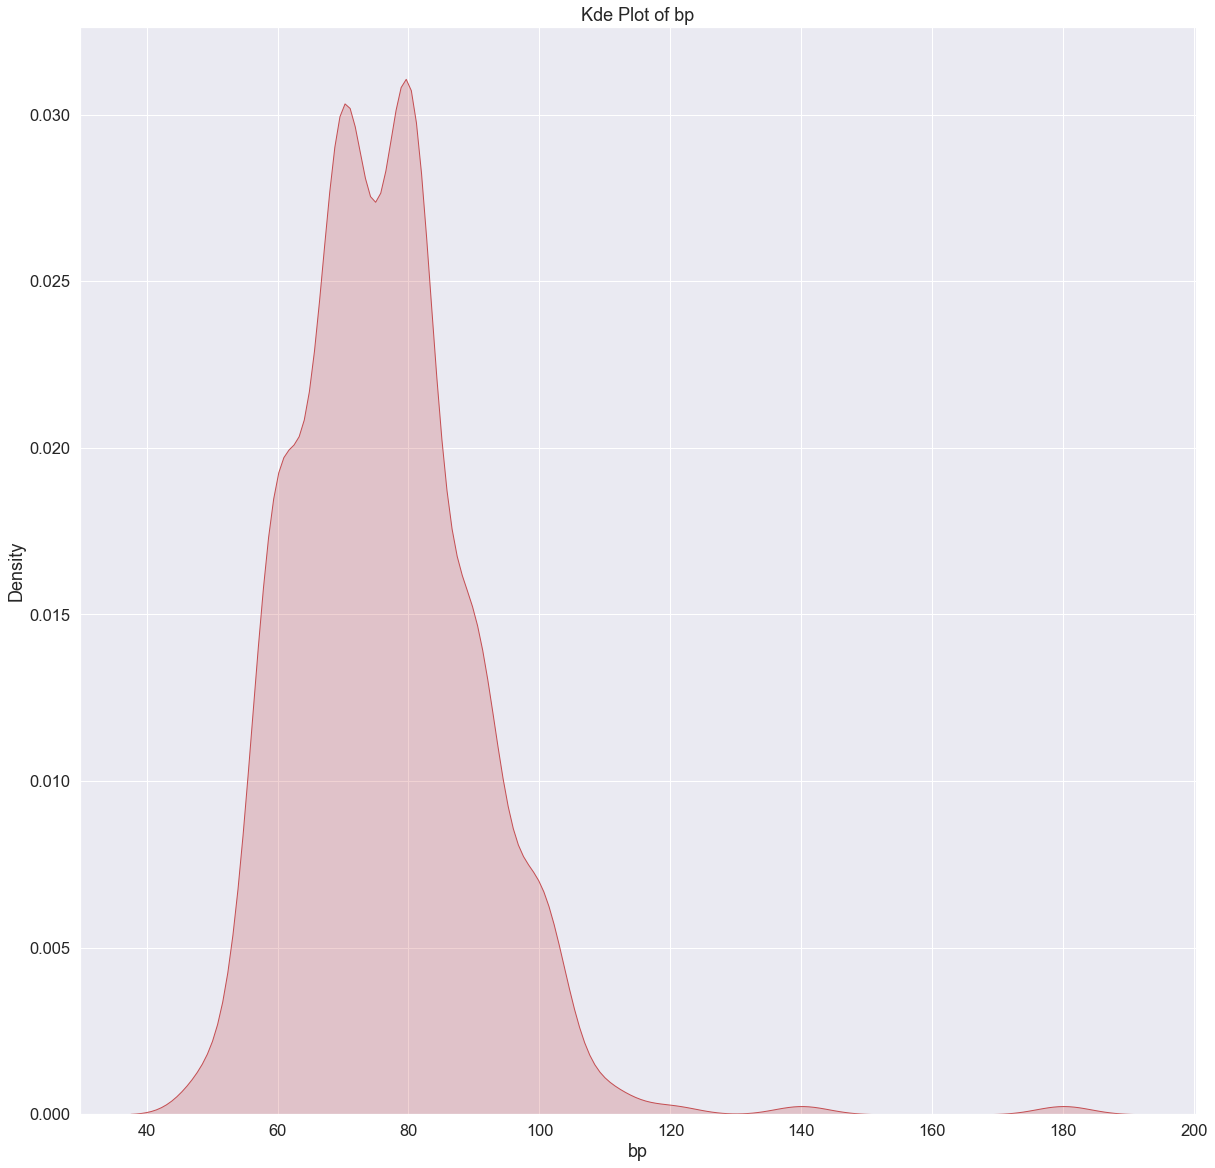

In [88]:
sns.kdeplot(df["bp"] , shade=True , color="r")
plt.title("Kde Plot of bp")

Text(0.5, 1.0, 'Distribution Plot of sg')

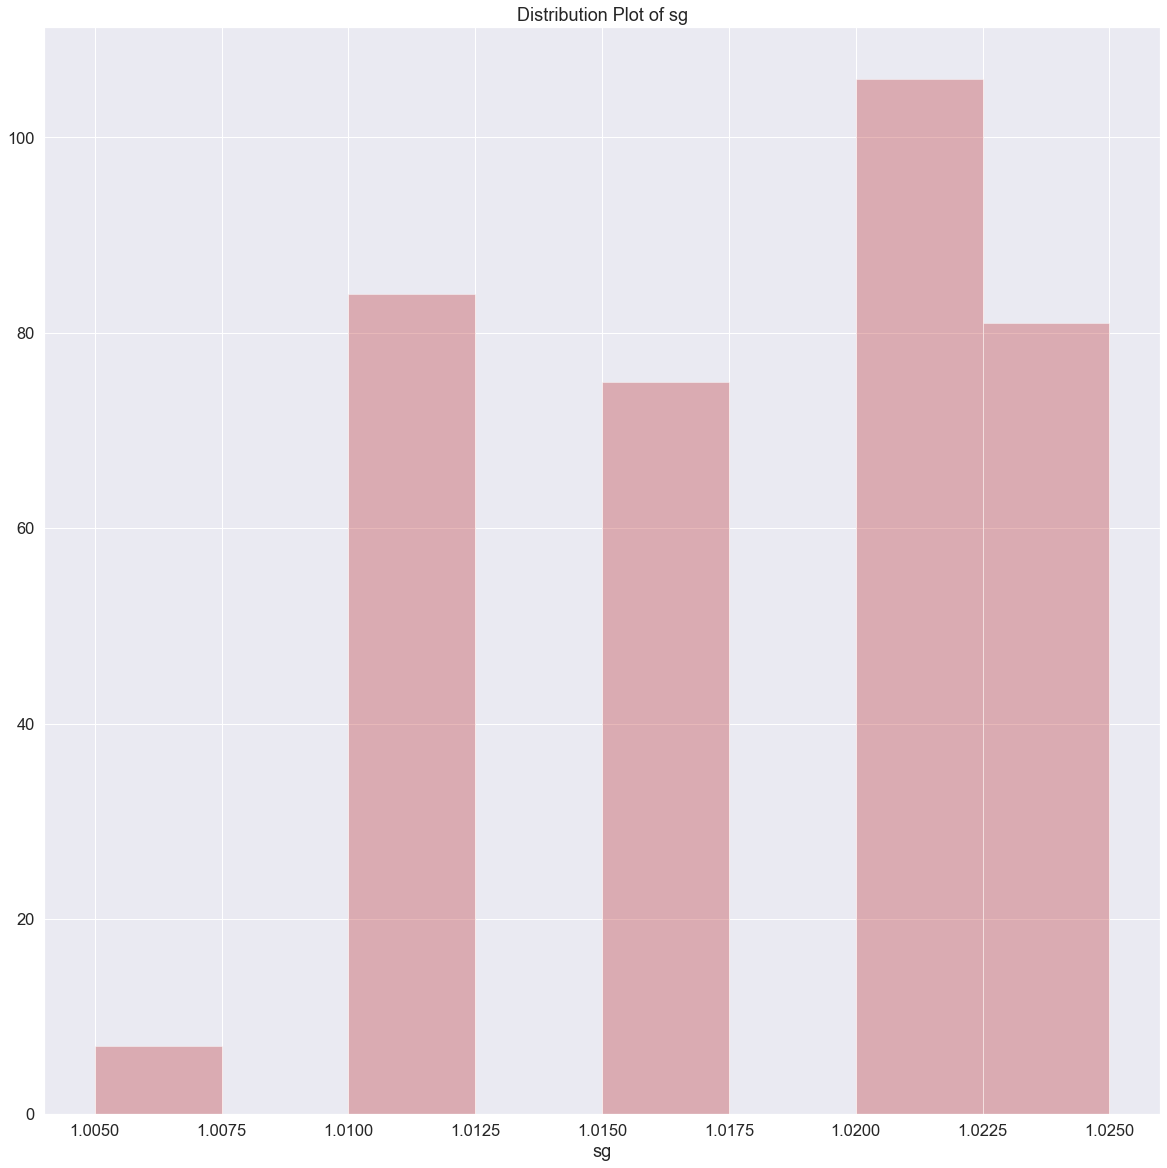

In [89]:
sns.distplot(df["sg"] , kde=False , color="r")
plt.title("Distribution Plot of sg")

Text(0.5, 1.0, 'Kde Plot of sg')

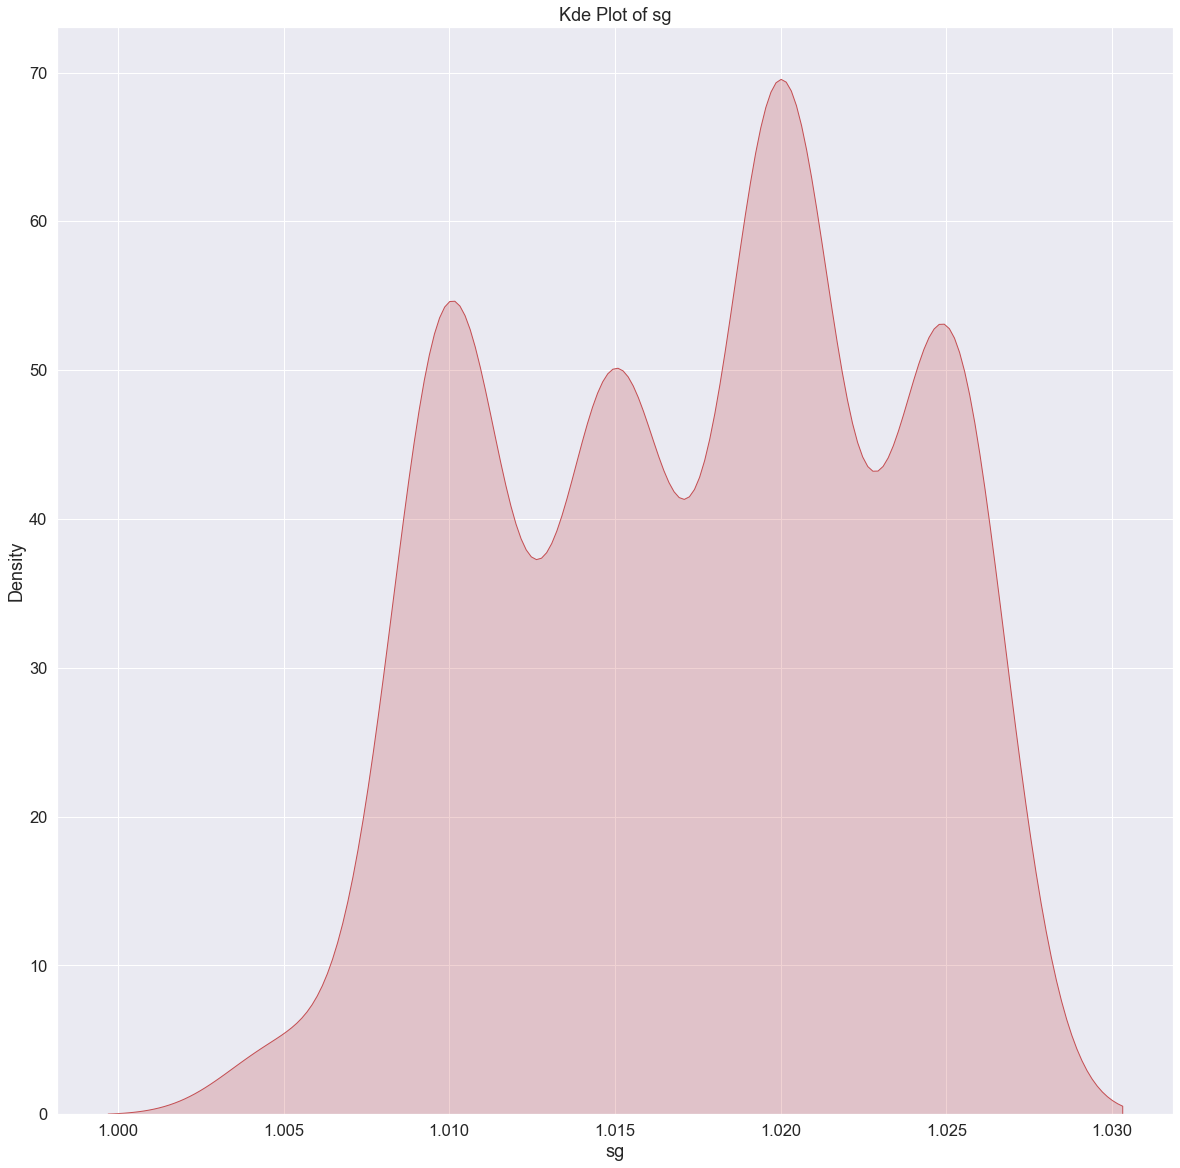

In [90]:
sns.kdeplot(df["sg"] , shade=True , color="r")
plt.title("Kde Plot of sg")

Text(0.5, 1.0, 'Distribution Plot of al')

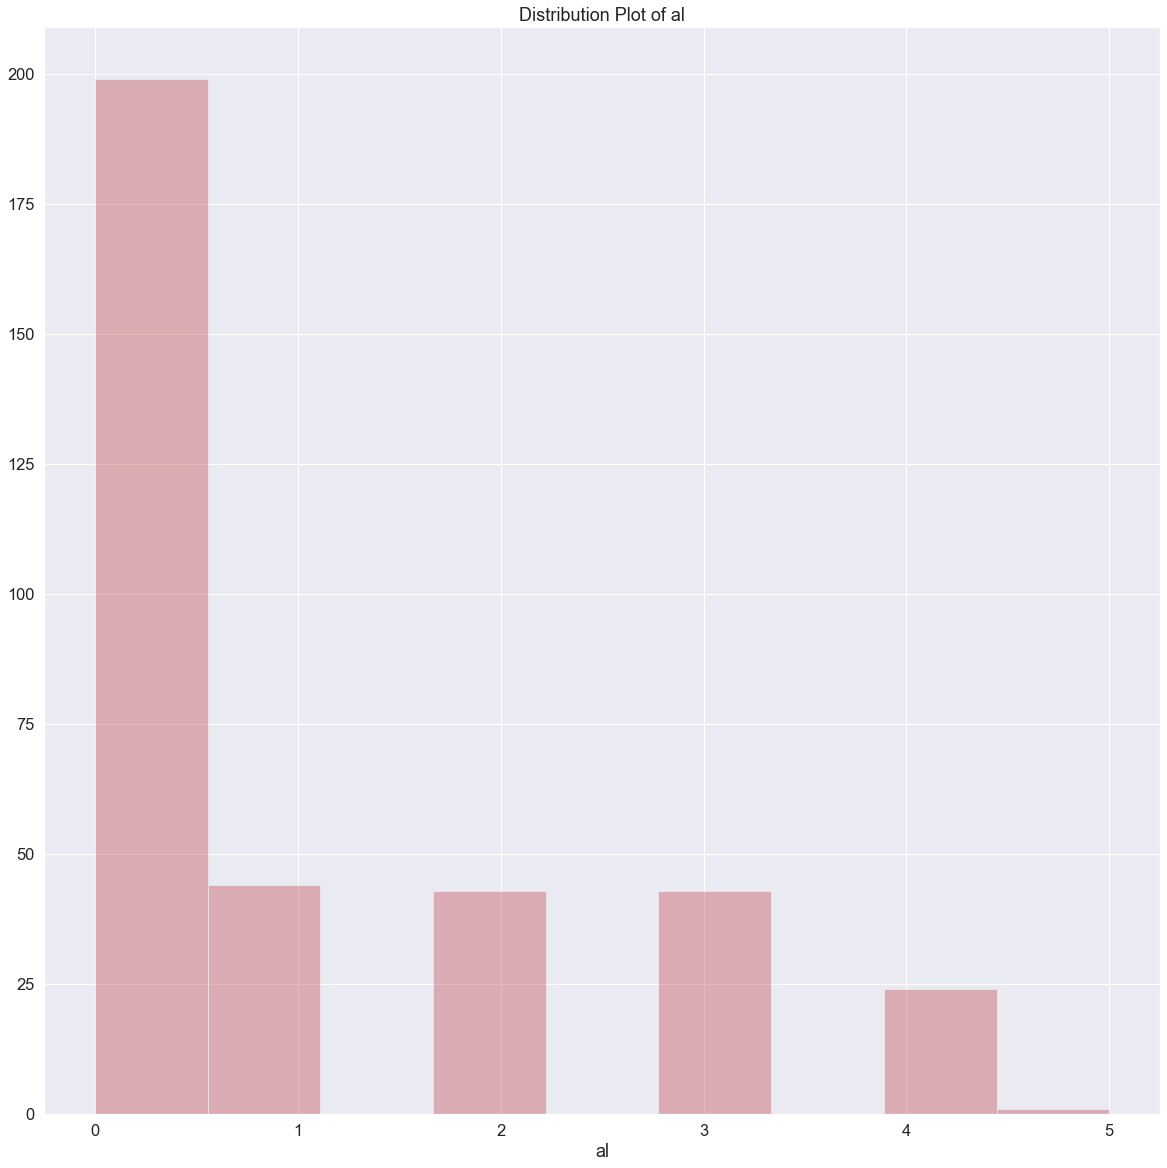

In [91]:
sns.distplot(df["al"] , kde=False , color="r")
plt.title("Distribution Plot of al")

Text(0.5, 1.0, 'Kde Plot of al')

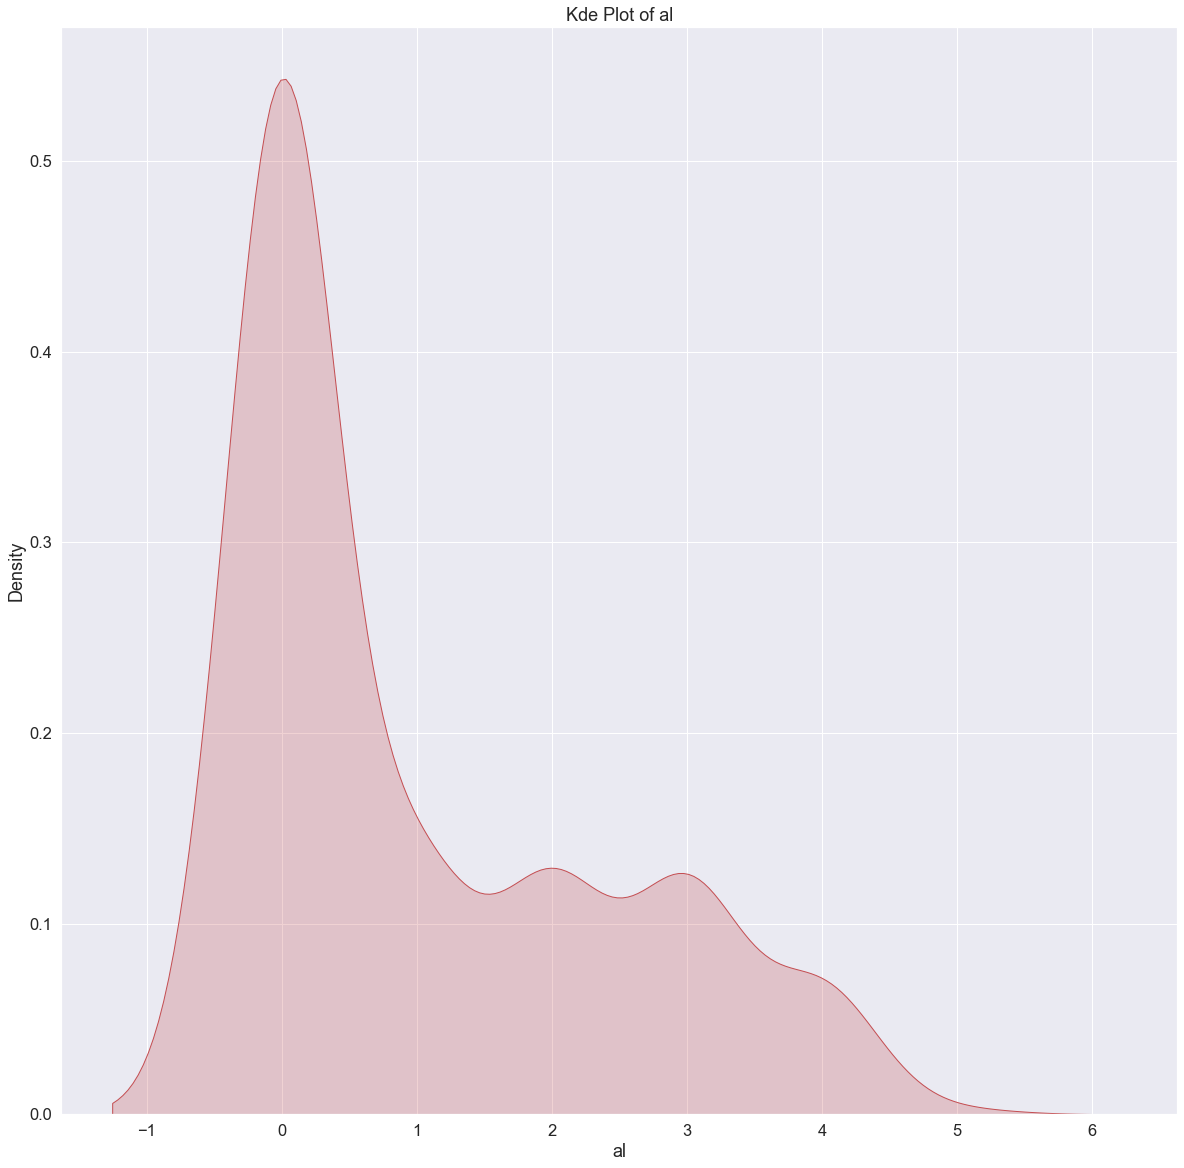

In [92]:
sns.kdeplot(df["al"] , shade=True , color="r")
plt.title("Kde Plot of al")

Text(0.5, 1.0, 'Distribution Plot of su')

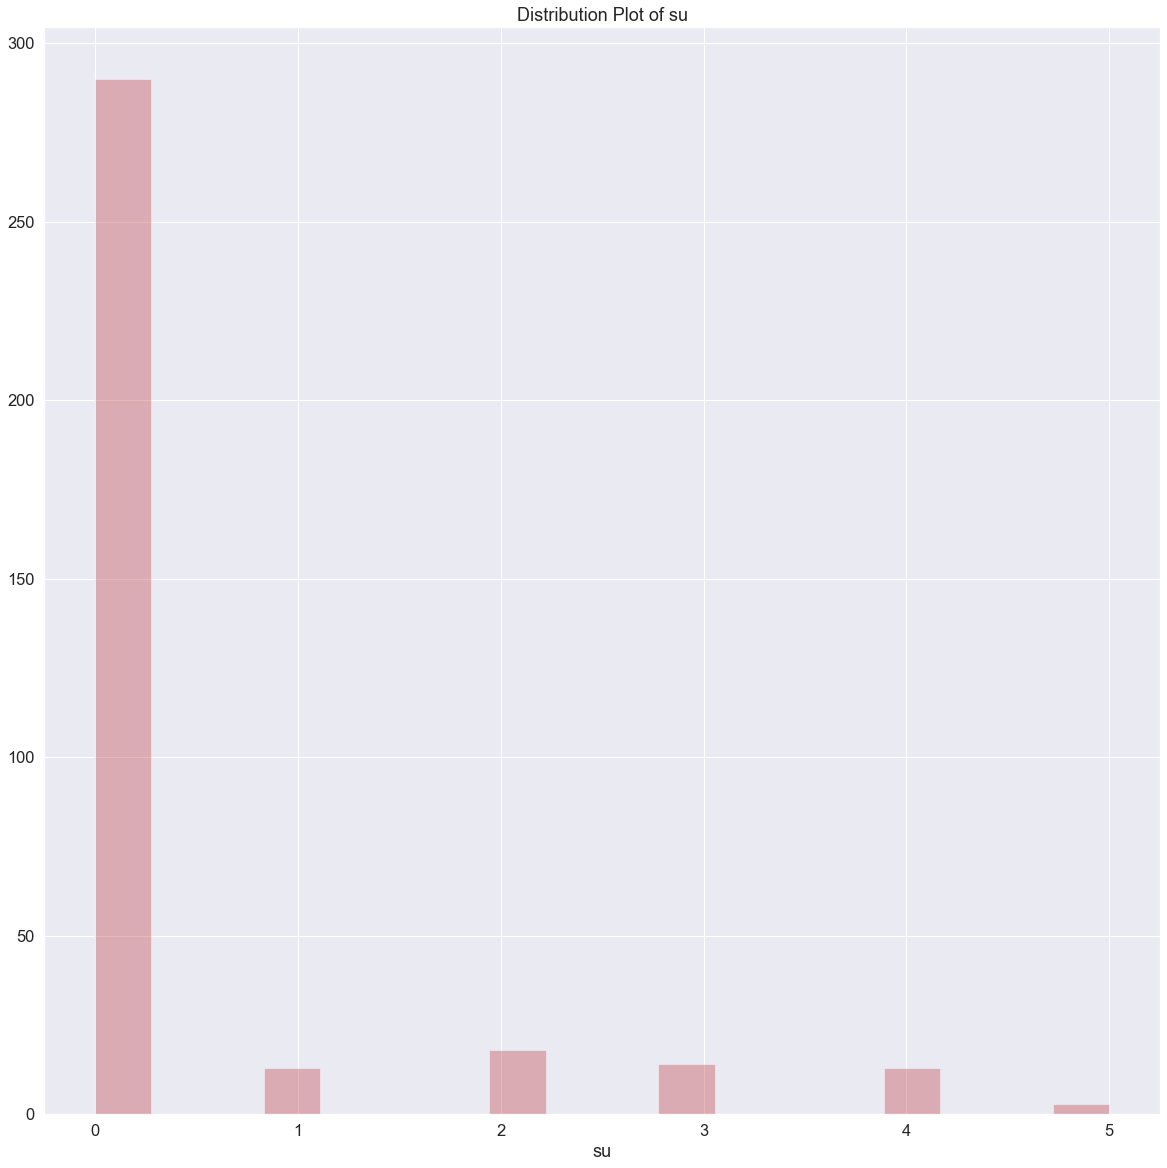

In [93]:
sns.distplot(df["su"] , kde=False , color="r")
plt.title("Distribution Plot of su")

Text(0.5, 1.0, 'Kde Plot of su')

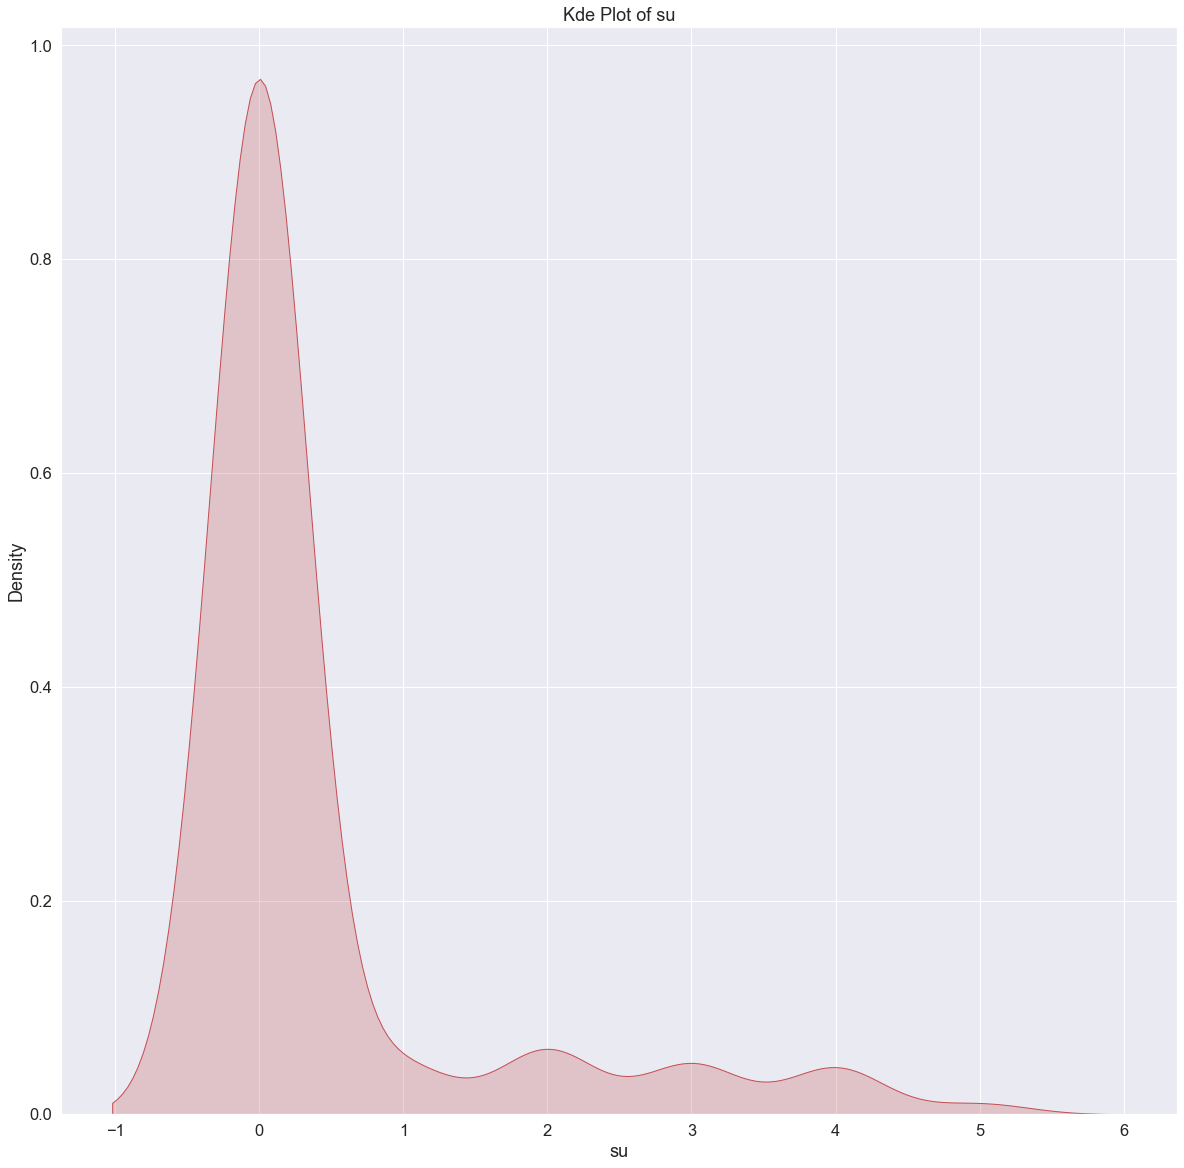

In [94]:
sns.kdeplot(df["su"] , shade=True , color="r")
plt.title("Kde Plot of su")   

Text(0.5, 1.0, 'Distribution Plot of bgr')

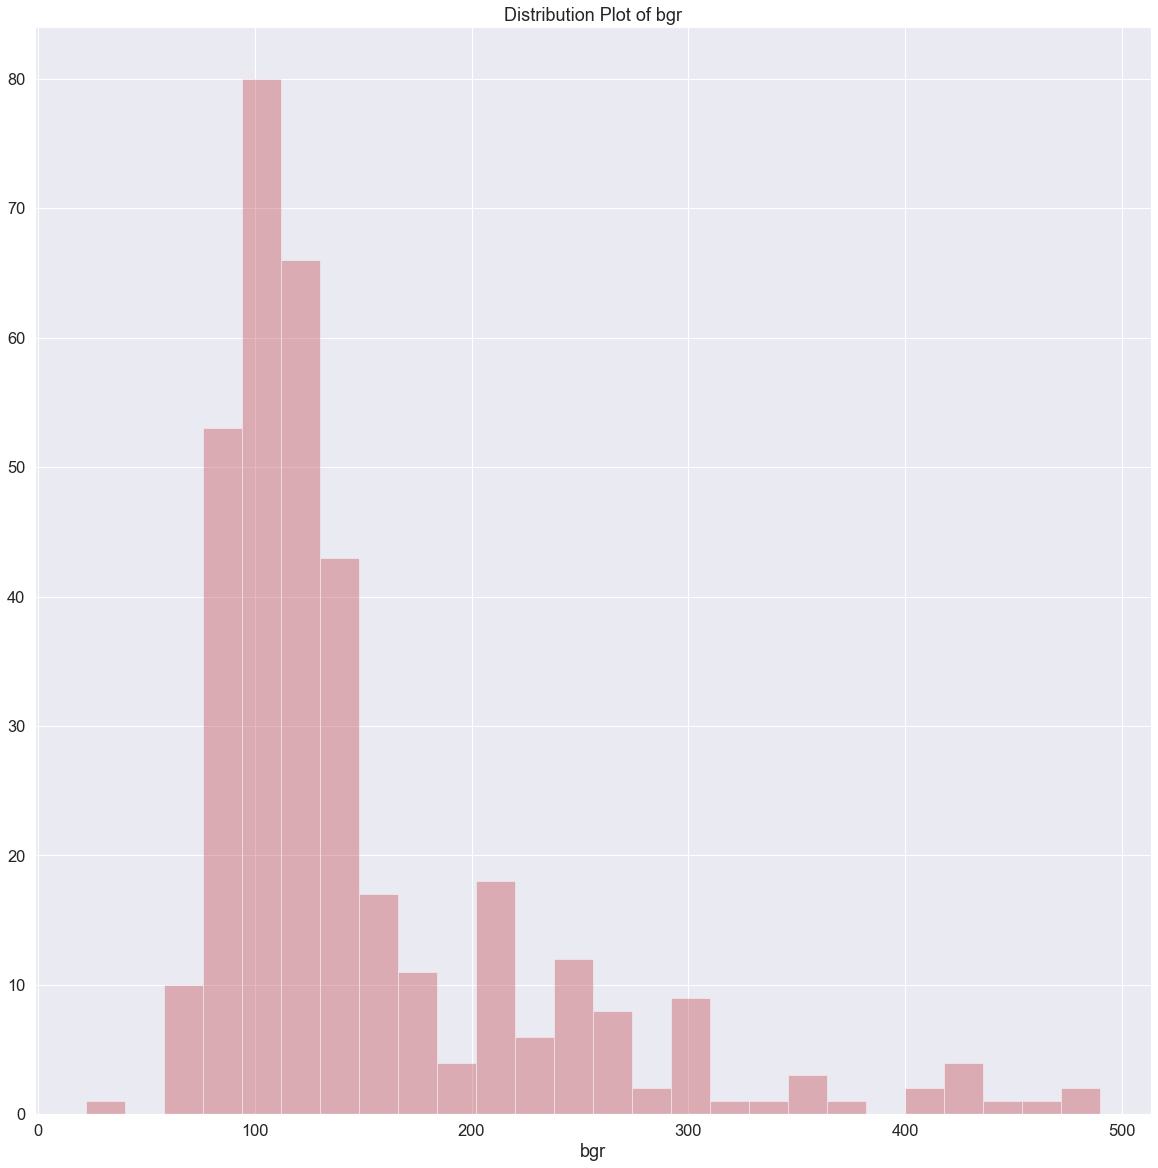

In [95]:
sns.distplot(df["bgr"] , kde=False , color="r")
plt.title("Distribution Plot of bgr")

Text(0.5, 1.0, 'Kde Plot of bgr')

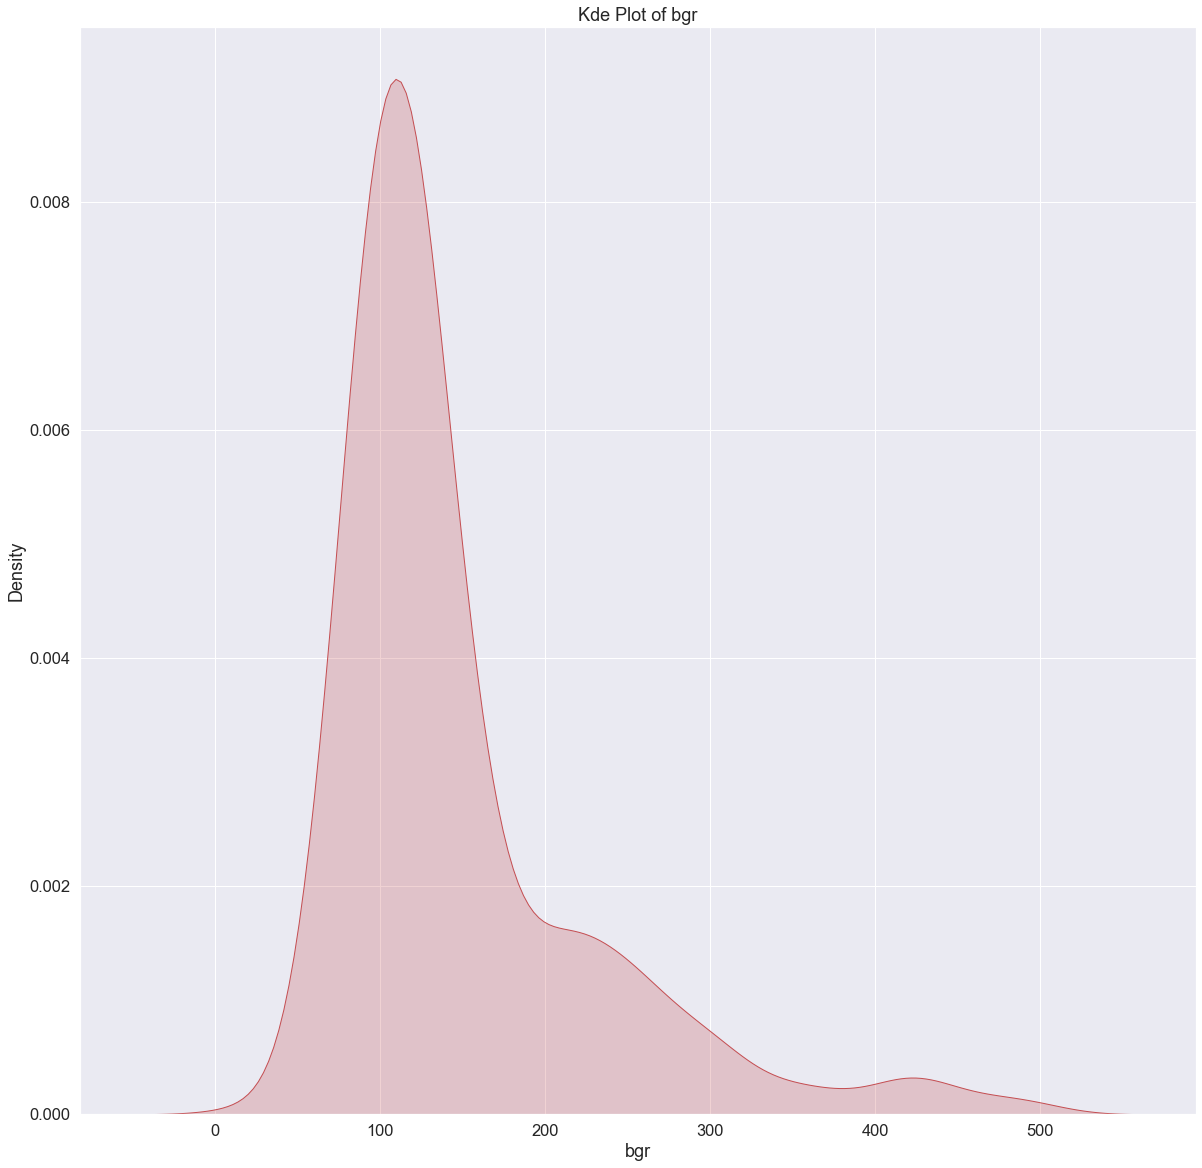

In [96]:
sns.kdeplot(df["bgr"] , shade=True , color="r")
plt.title("Kde Plot of bgr")

Text(0.5, 1.0, 'Distribution Plot of sc')

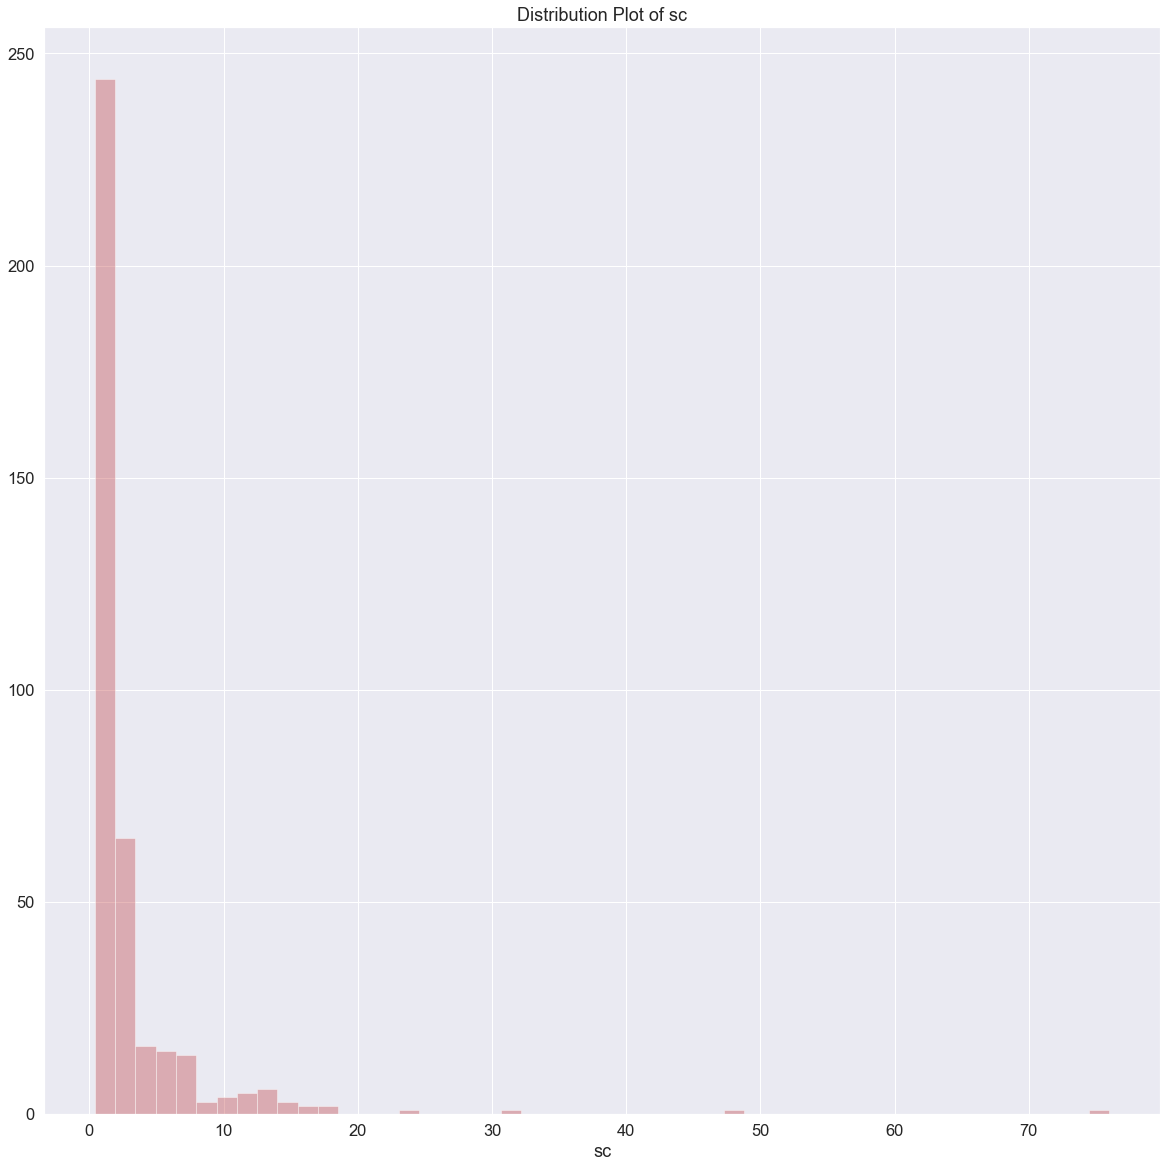

In [97]:
sns.distplot(df["sc"] , kde=False , color="r")
plt.title("Distribution Plot of sc")

Text(0.5, 1.0, 'Kde Plot of sc')

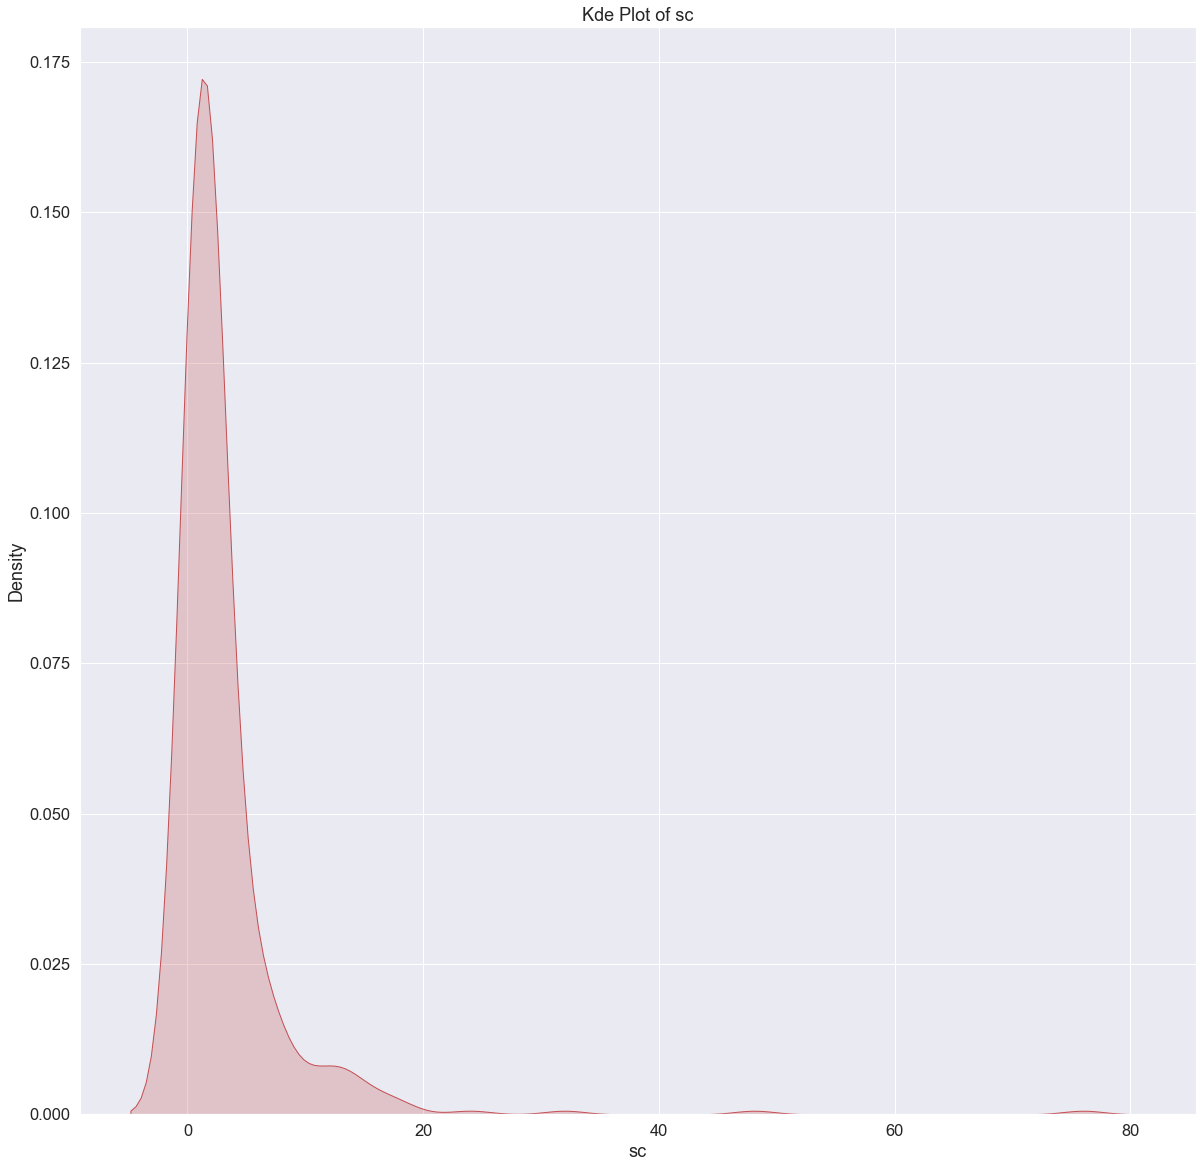

In [98]:
sns.kdeplot(df["sc"] , shade=True , color="r")
plt.title("Kde Plot of sc")

Text(0.5, 1.0, 'Distribution Plot of sod')

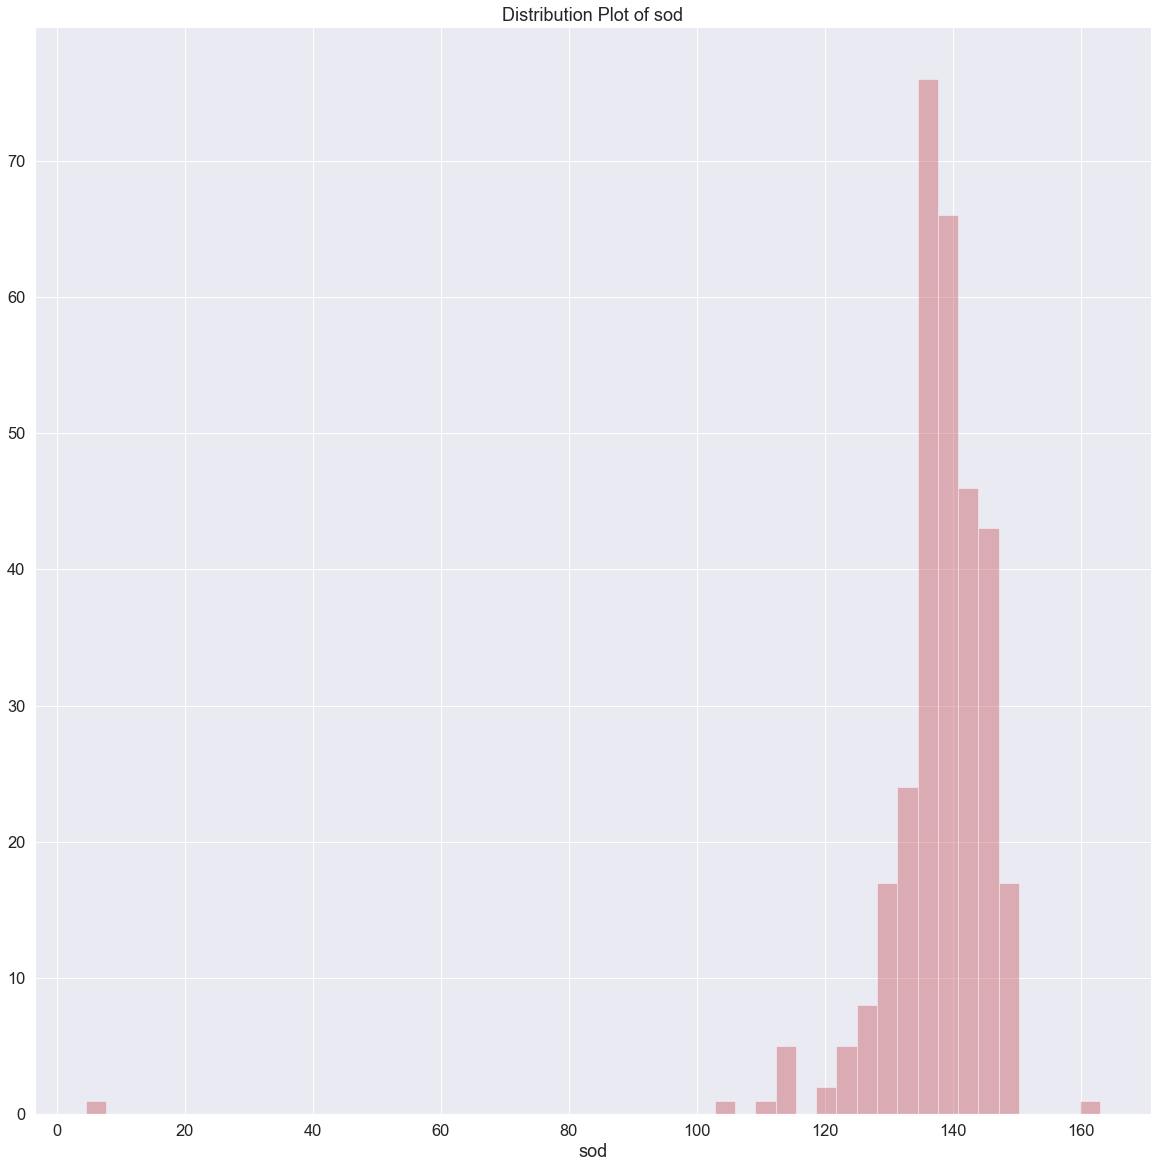

In [99]:
sns.distplot(df["sod"] , kde=False , color="r")
plt.title("Distribution Plot of sod")

Text(0.5, 1.0, 'Kde Plot of sod')

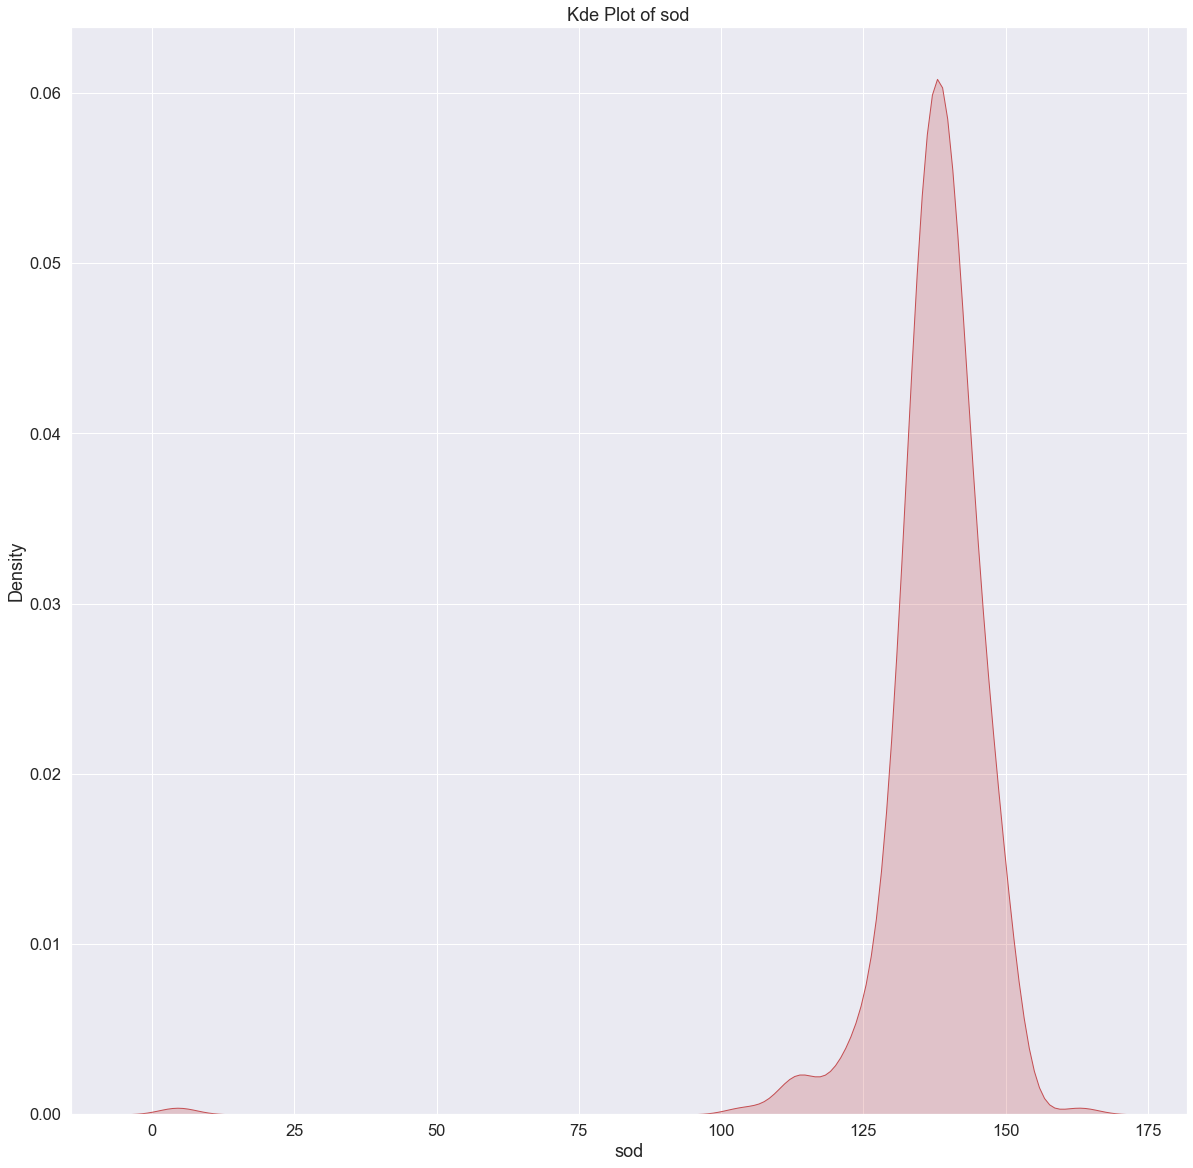

In [100]:
sns.kdeplot(df["sod"] , shade=True , color="r")
plt.title("Kde Plot of sod")

Text(0.5, 1.0, 'Distribution Plot of pot')

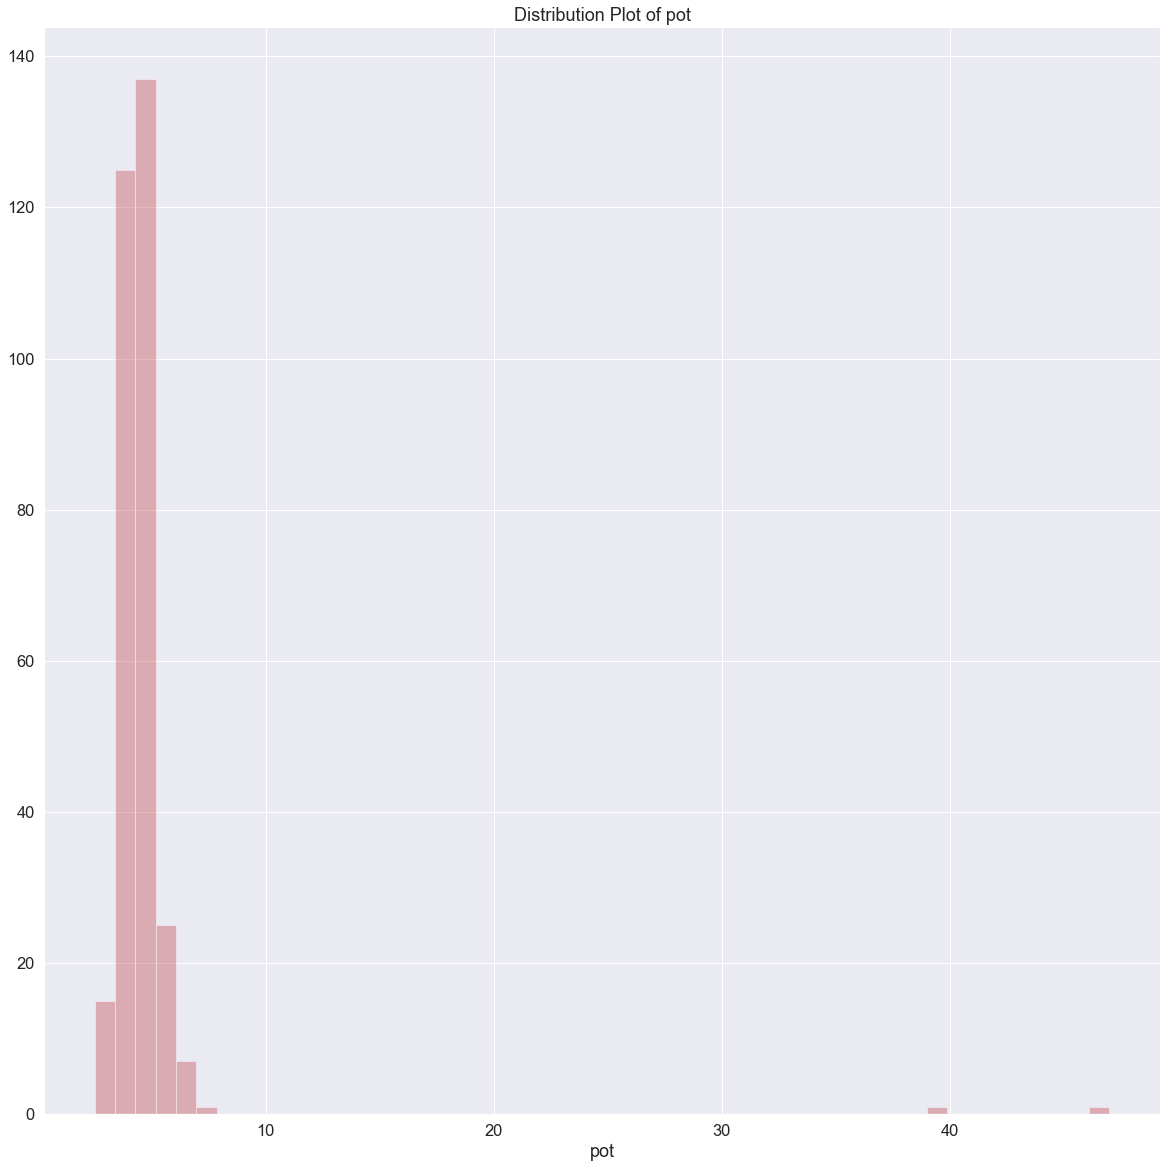

In [101]:
sns.distplot(df["pot"] , kde=False , color="r")
plt.title("Distribution Plot of pot")

Text(0.5, 1.0, 'Kde Plot of pot')

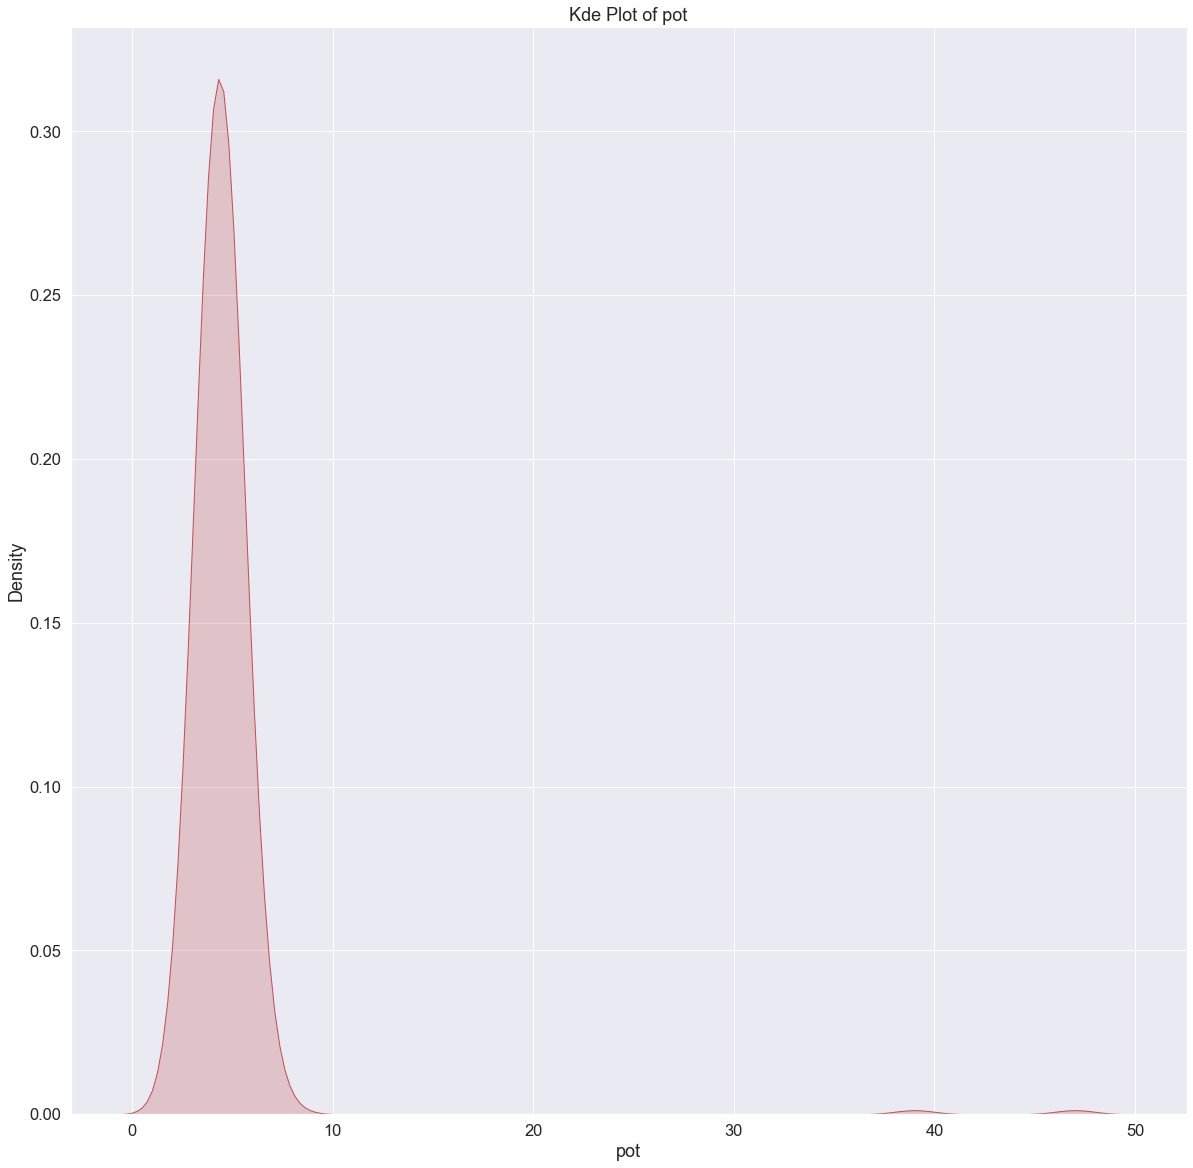

In [102]:
sns.kdeplot(df["pot"] , shade=True , color="r")
plt.title("Kde Plot of pot")

Text(0.5, 1.0, 'Distribution Plot of hemo')

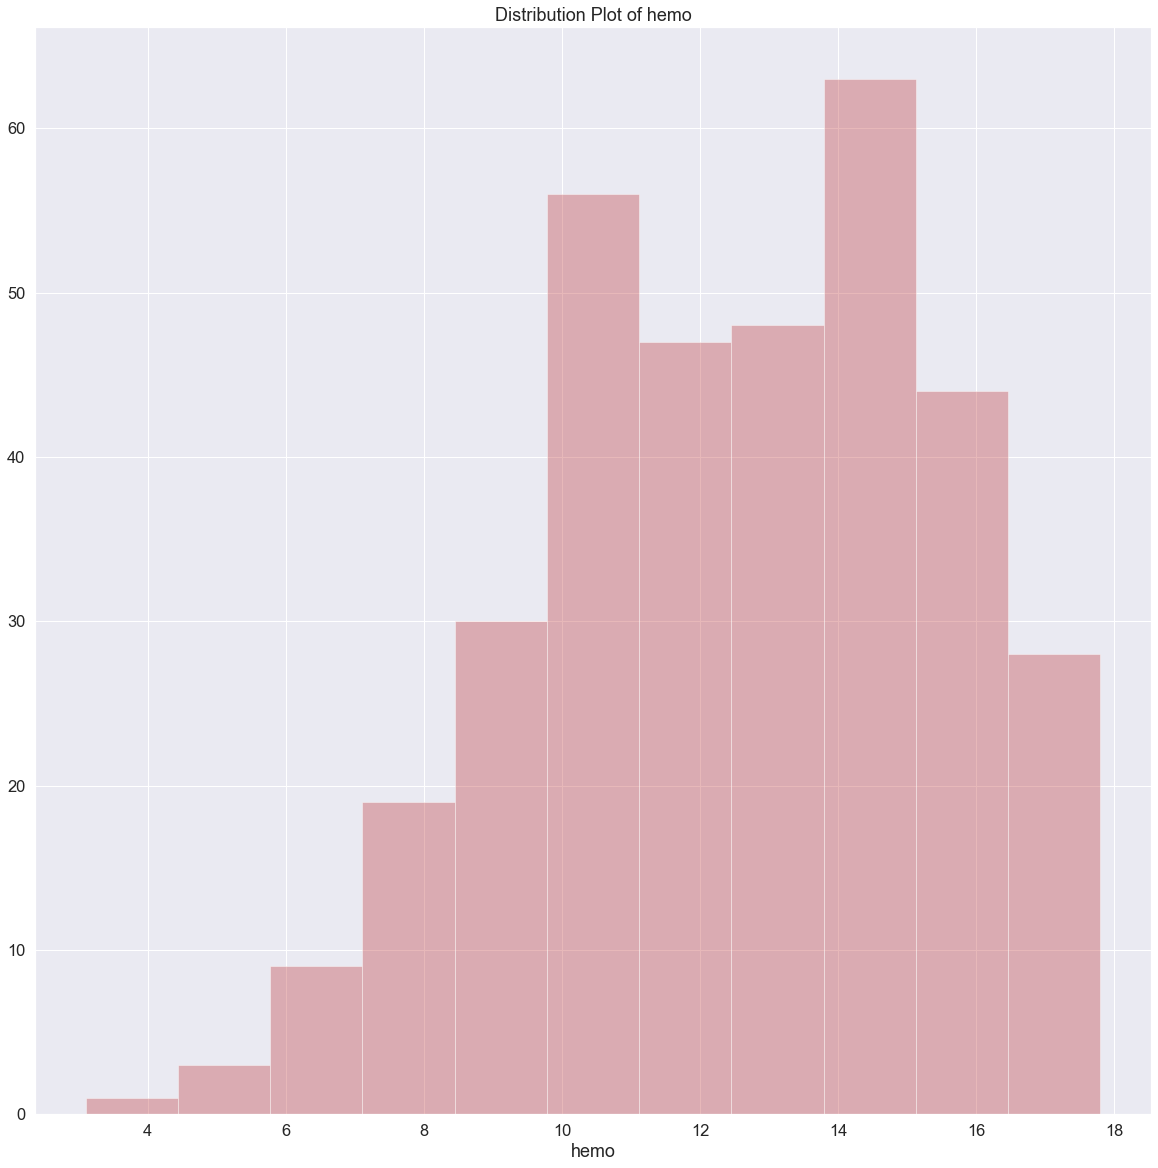

In [103]:
sns.distplot(df["hemo"] , kde=False , color="r")
plt.title("Distribution Plot of hemo")

Text(0.5, 1.0, 'Kde Plot of hemo')

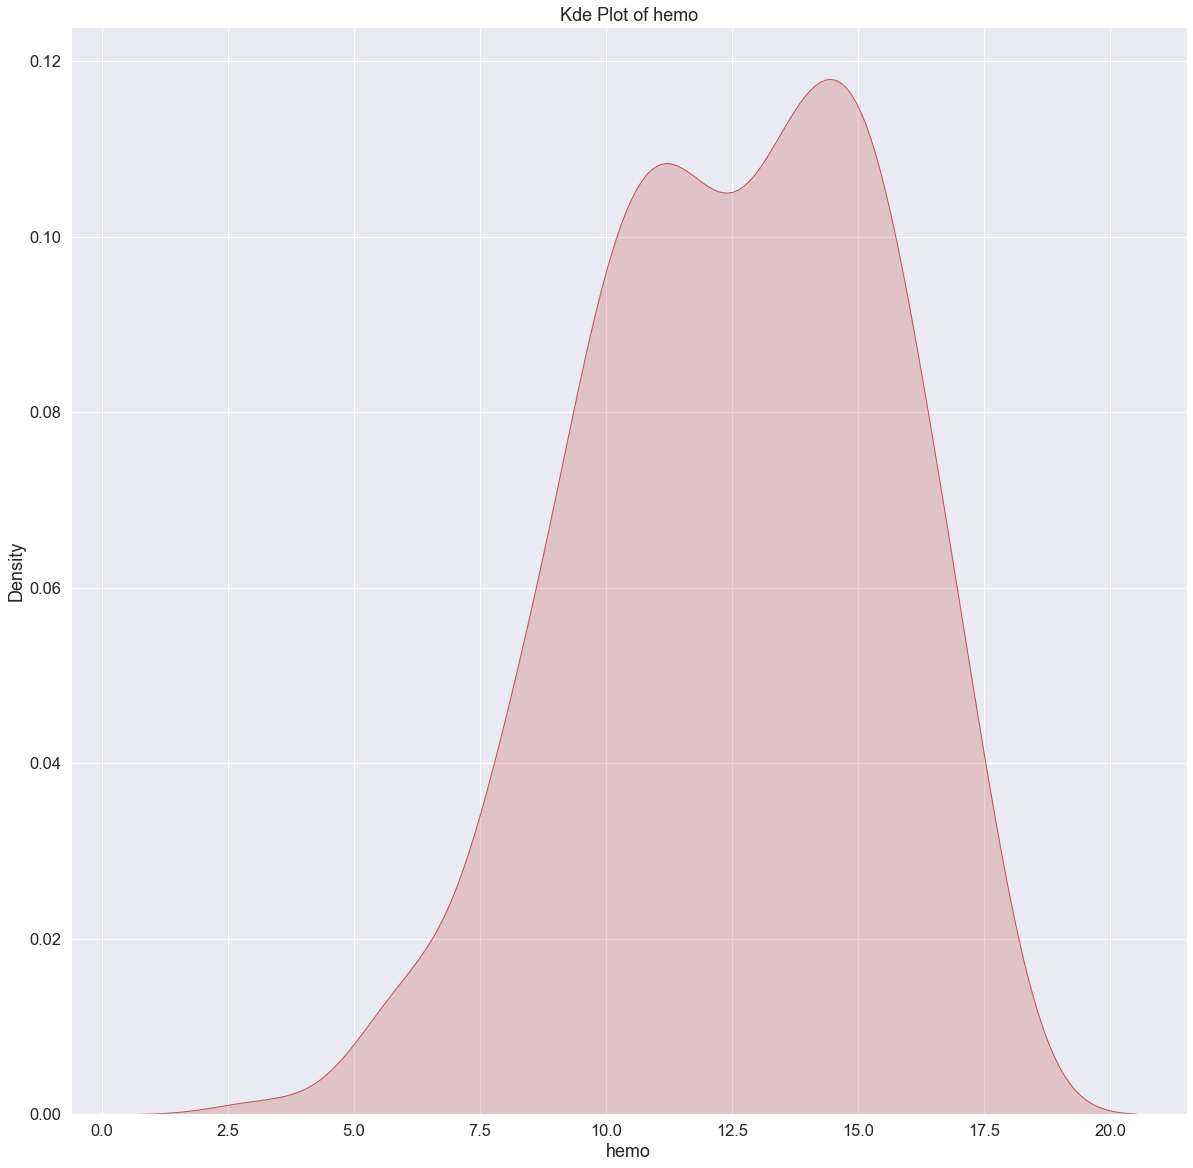

In [104]:
sns.kdeplot(df["hemo"] , shade=True , color="r")
plt.title("Kde Plot of hemo")

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           399 non-null    float64
 1   age          385 non-null    float64
 2   bp           388 non-null    float64
 3   sg           353 non-null    float64
 4   al           354 non-null    float64
 5   su           351 non-null    float64
 6   rbc          248 non-null    object 
 7   pc           335 non-null    object 
 8   pcc          396 non-null    object 
 9   ba           396 non-null    object 
 10  bgr          356 non-null    float64
 11  bu           381 non-null    float64
 12  sc           383 non-null    float64
 13  sod          313 non-null    float64
 14  pot          312 non-null    float64
 15  hemo         348 non-null    float64
 16  pcv          314 non-null    float64
 17  wc           294 non-null    float64
 18  rc           269 non-null    float64
 19  htn     

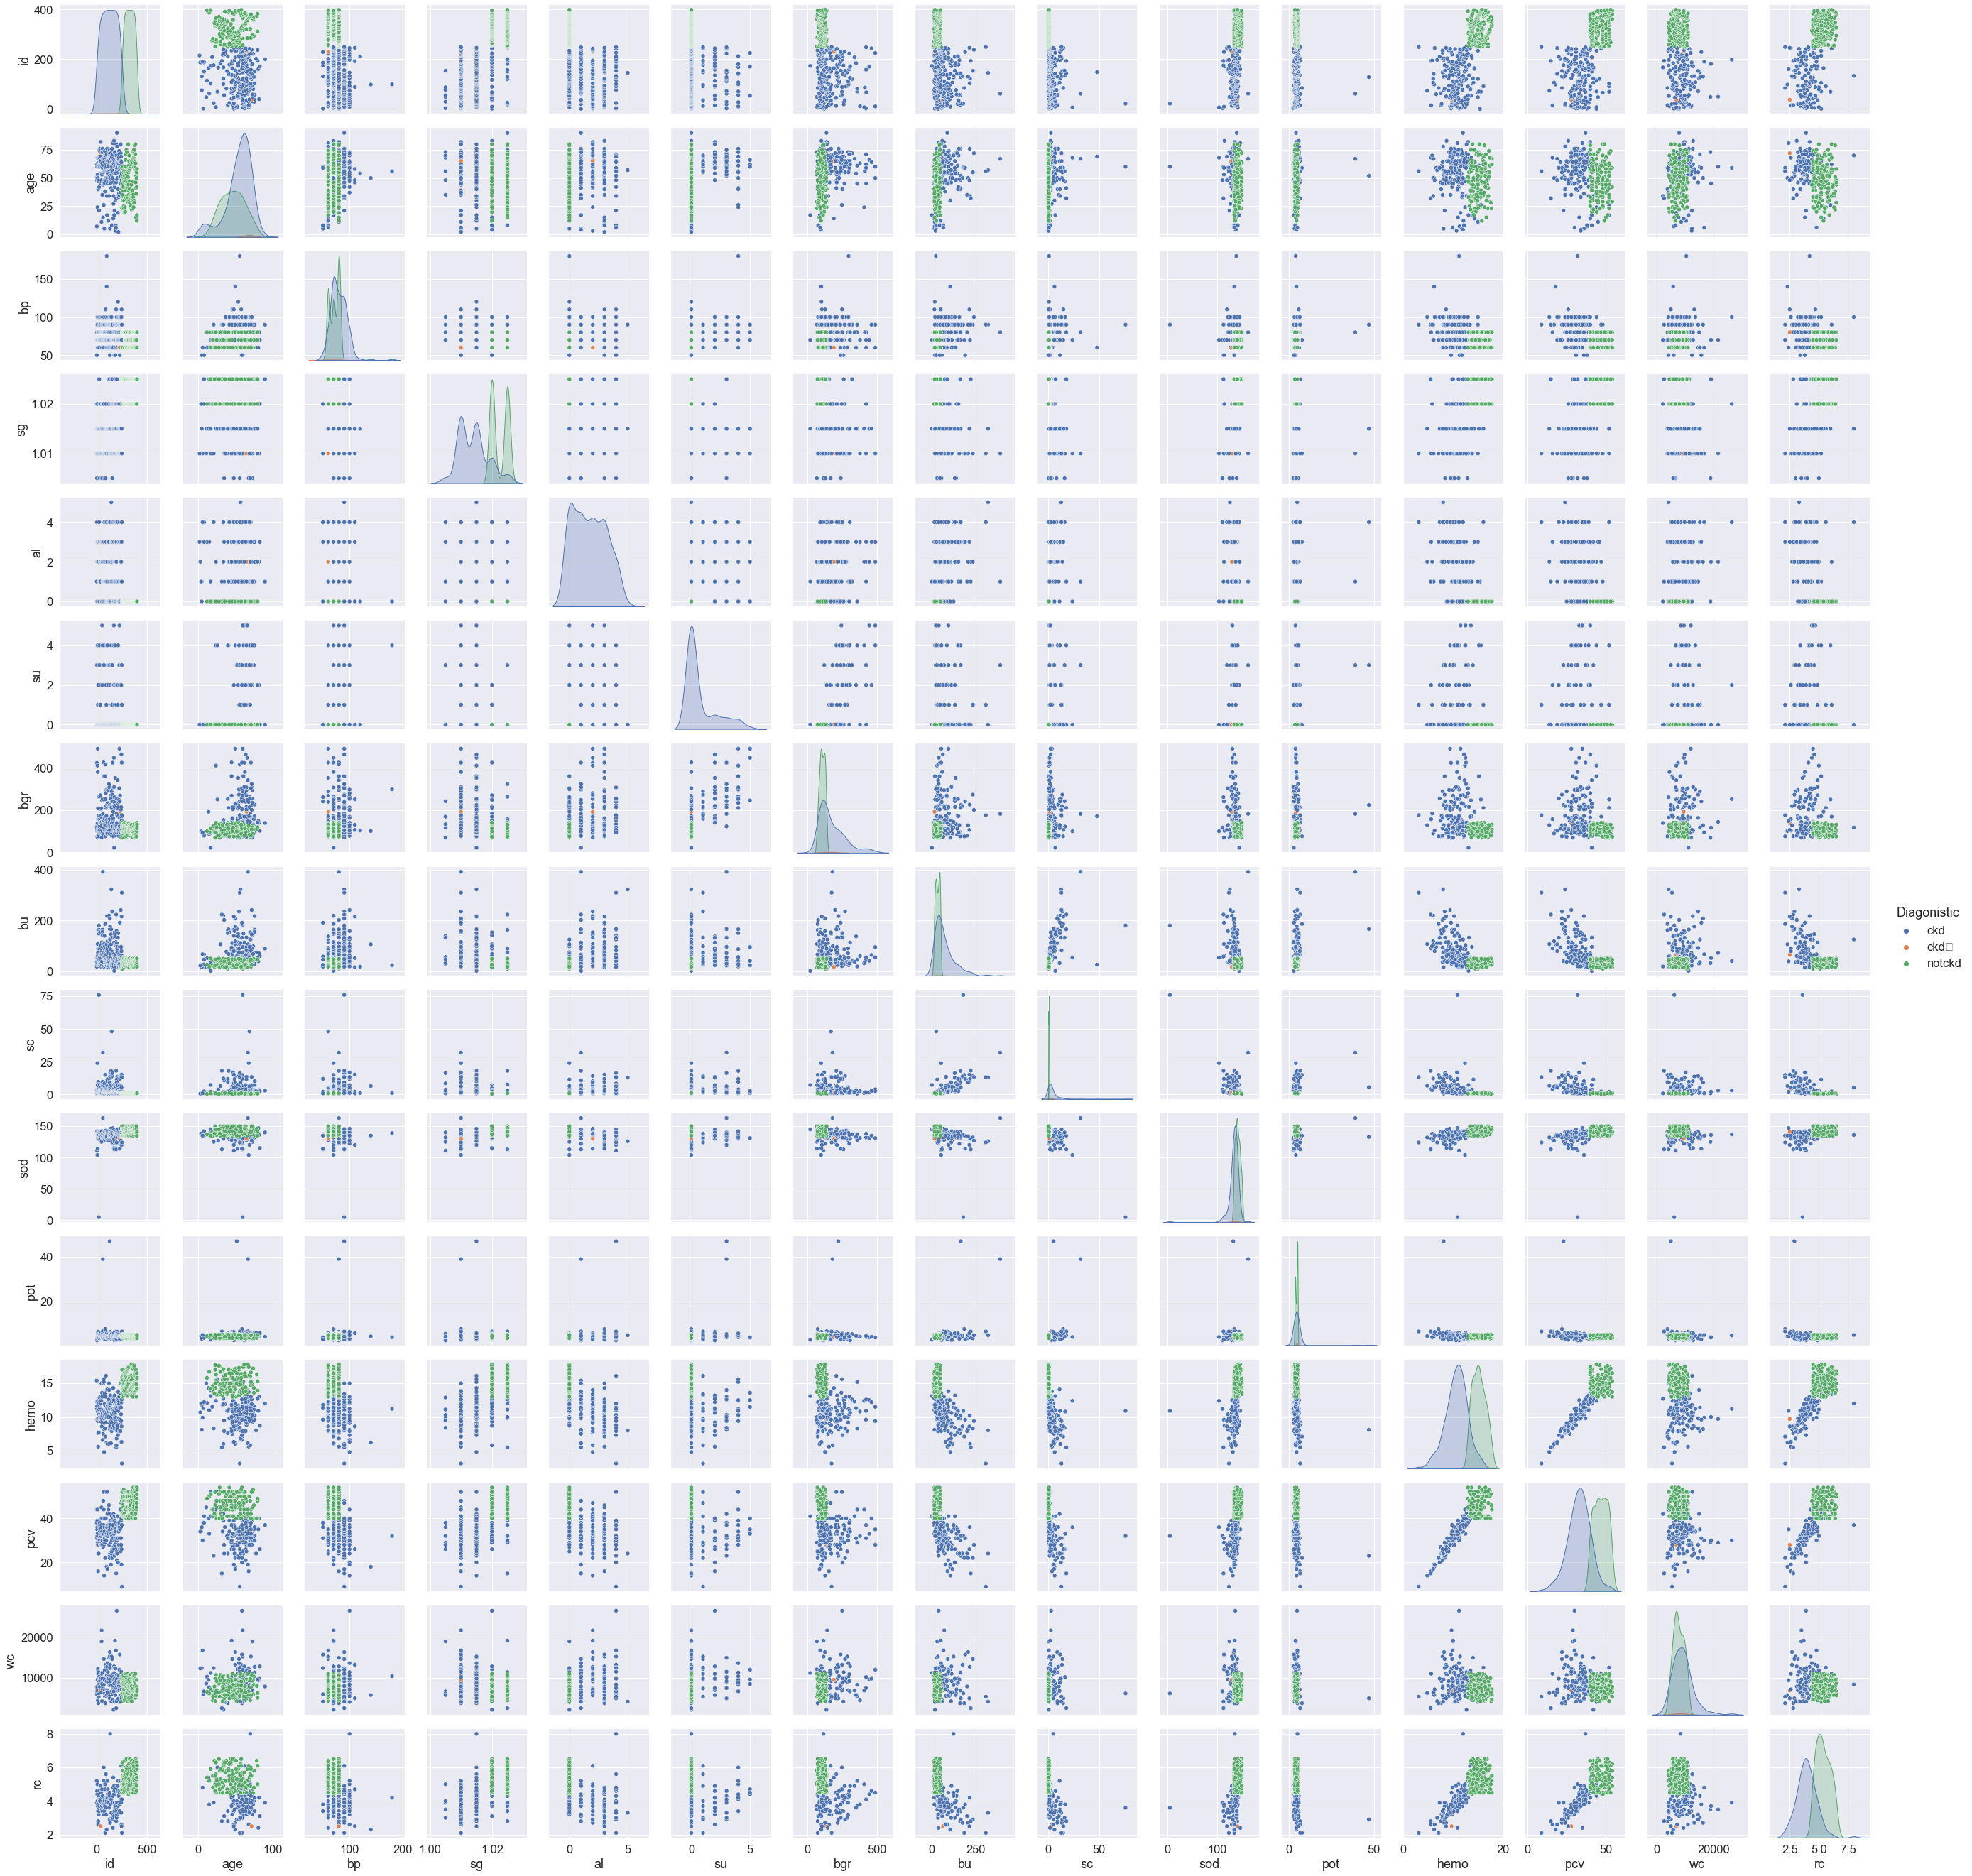

In [106]:
sns.set( rc = {"figure.figsize" : [20 , 10]} , font_scale=1.5)
sns.pairplot(df , hue = "Diagonistic")

Text(0.5, 1.0, 'Swarm Plot of rbc and age Based on Diagonistic ')

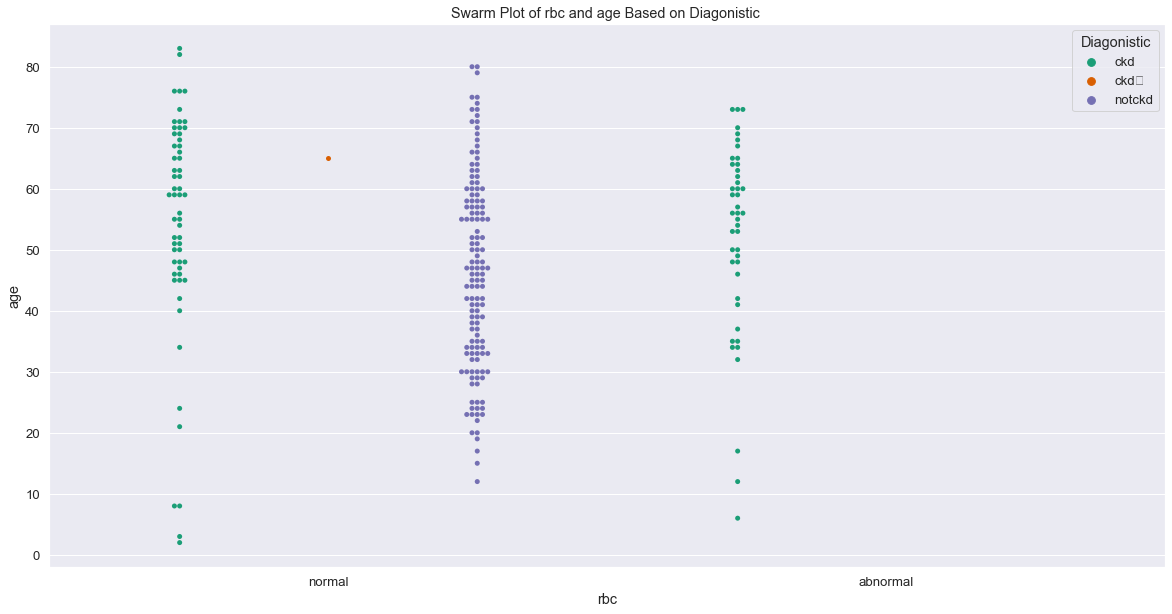

In [107]:
sns.set( rc = {"figure.figsize" : [20 , 10]} , font_scale=1.2)
sns.swarmplot( x = "rbc" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of rbc and age Based on Diagonistic ")

Text(0.5, 1.0, 'Swarm Plot of pc and age Based on Diagonistic ')

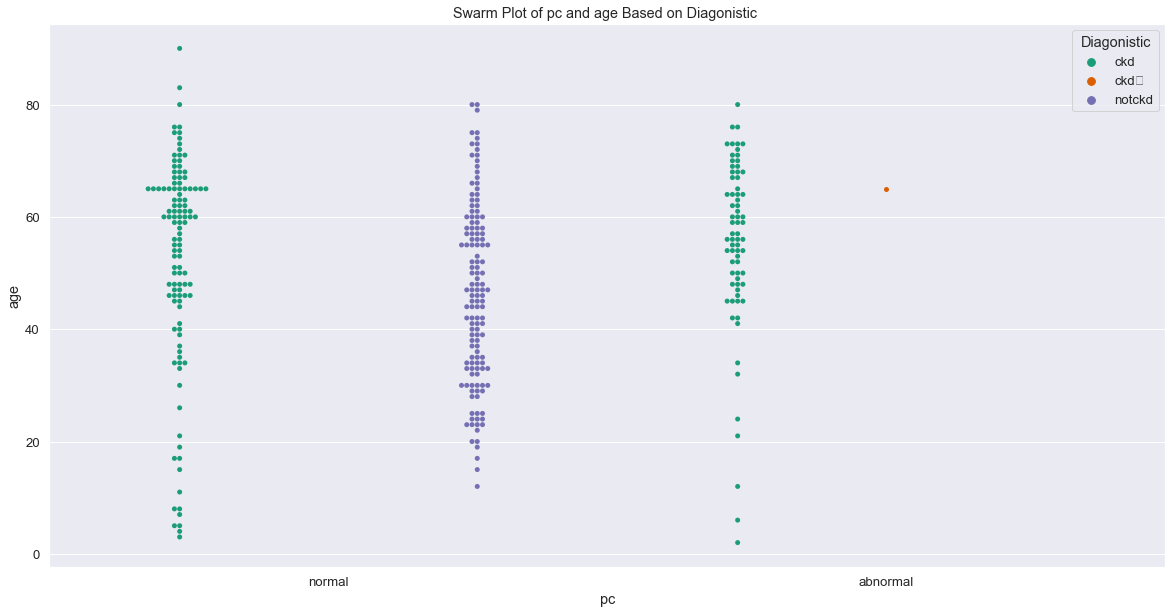

In [108]:
sns.swarmplot( x = "pc" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of pc and age Based on Diagonistic ")

Text(0.5, 1.0, 'Swarm Plot of pcc and age Based on Diagonistic ')

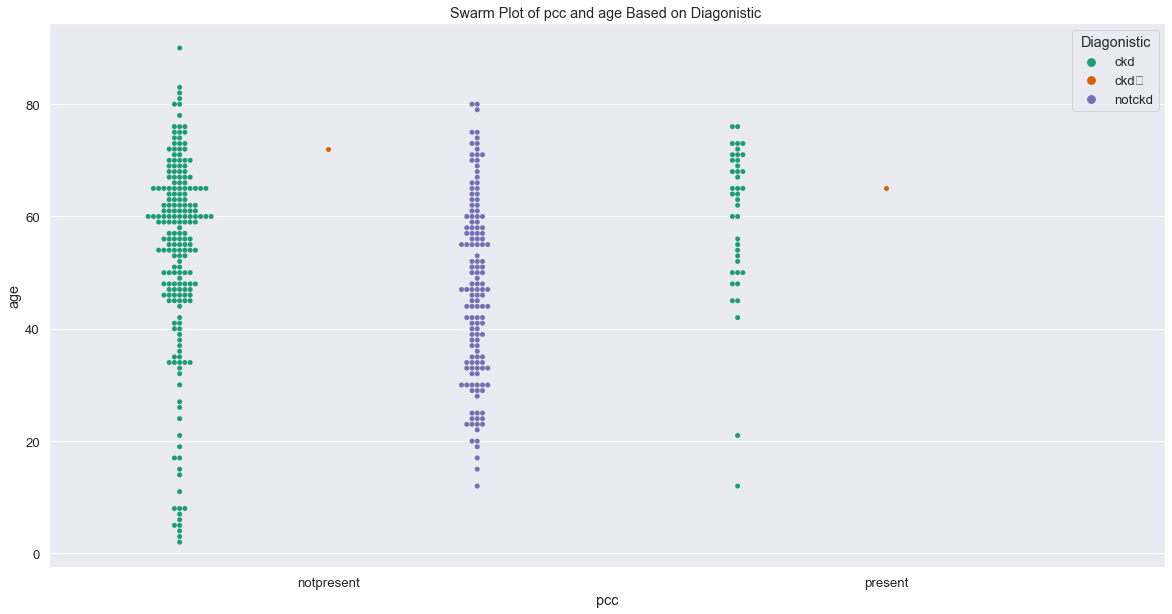

In [109]:
sns.swarmplot( x = "pcc" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of pcc and age Based on Diagonistic ")

Text(0.5, 1.0, 'Swarm Plot of ba and age Based on Diagonistic ')

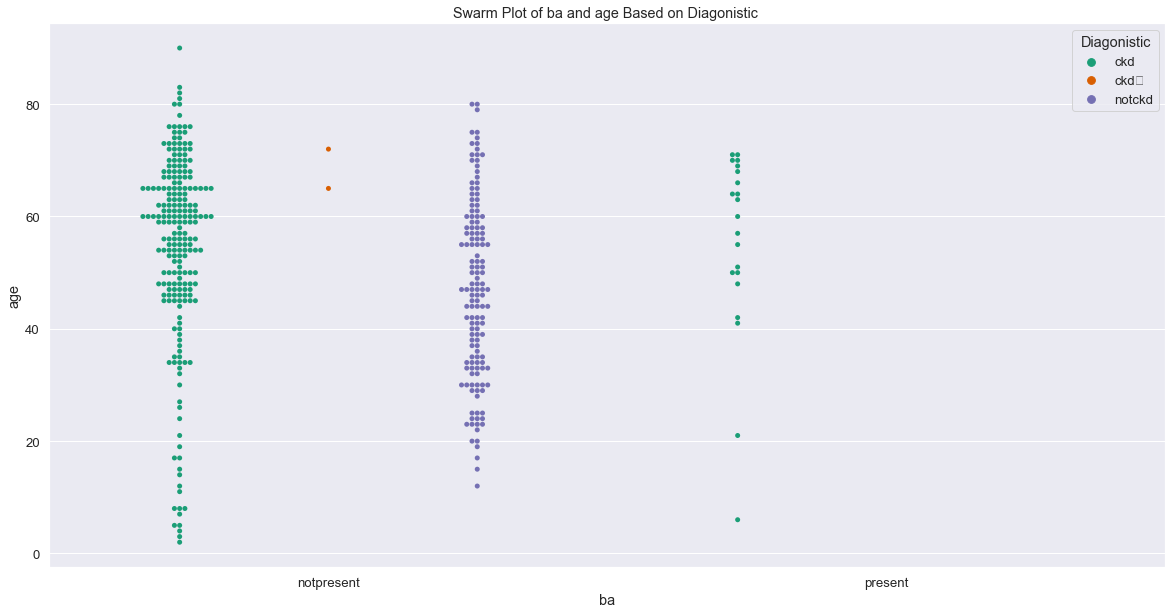

In [110]:
sns.swarmplot( x = "ba" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of ba and age Based on Diagonistic ")

Text(0.5, 1.0, 'Swarm Plot of pcv and age Based on Diagonistic ')

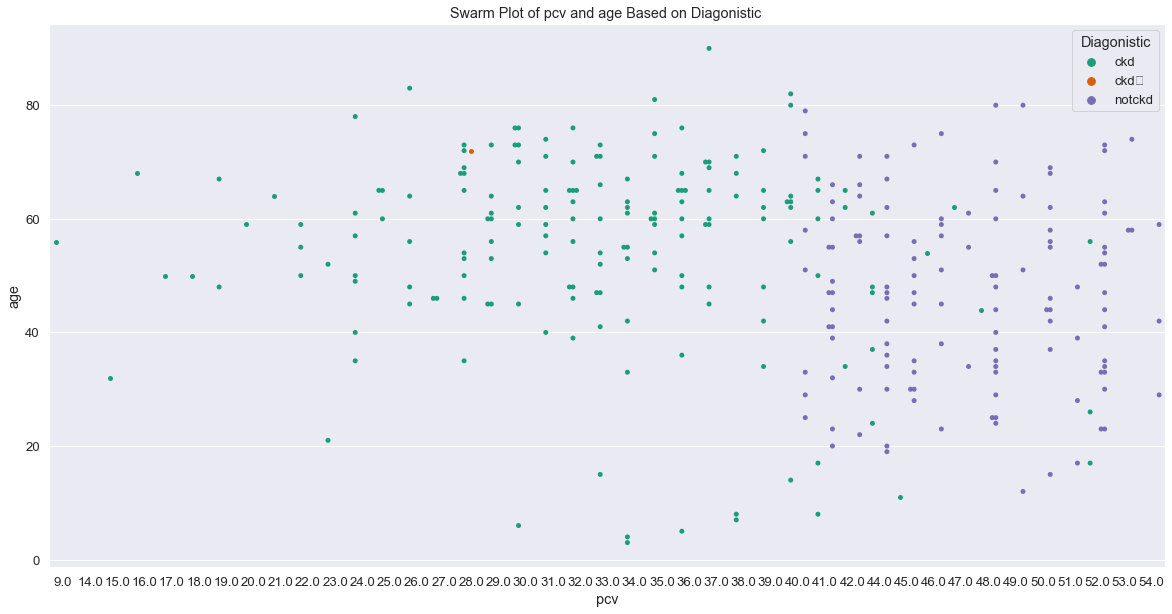

In [111]:
sns.swarmplot( x = "pcv" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of pcv and age Based on Diagonistic ")

Text(0.5, 1.0, 'Swarm Plot of wc and age Based on Diagonistic ')

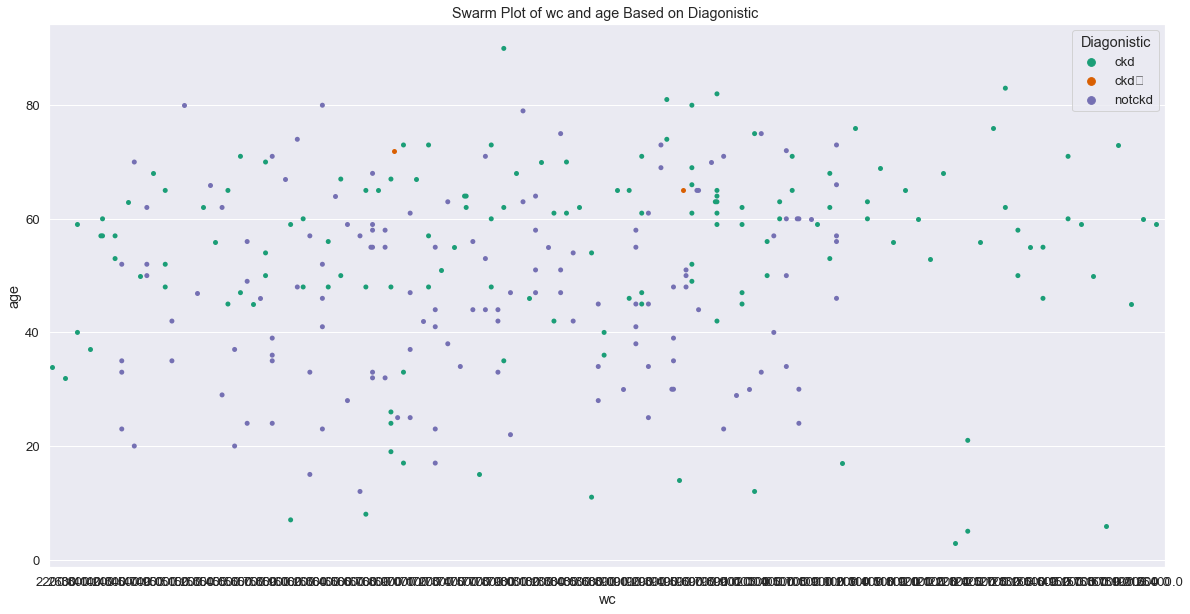

In [112]:
sns.swarmplot( x = "wc" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of wc and age Based on Diagonistic ")

Text(0.5, 1.0, 'Swarm Plot of rc and age Based on Diagonistic ')

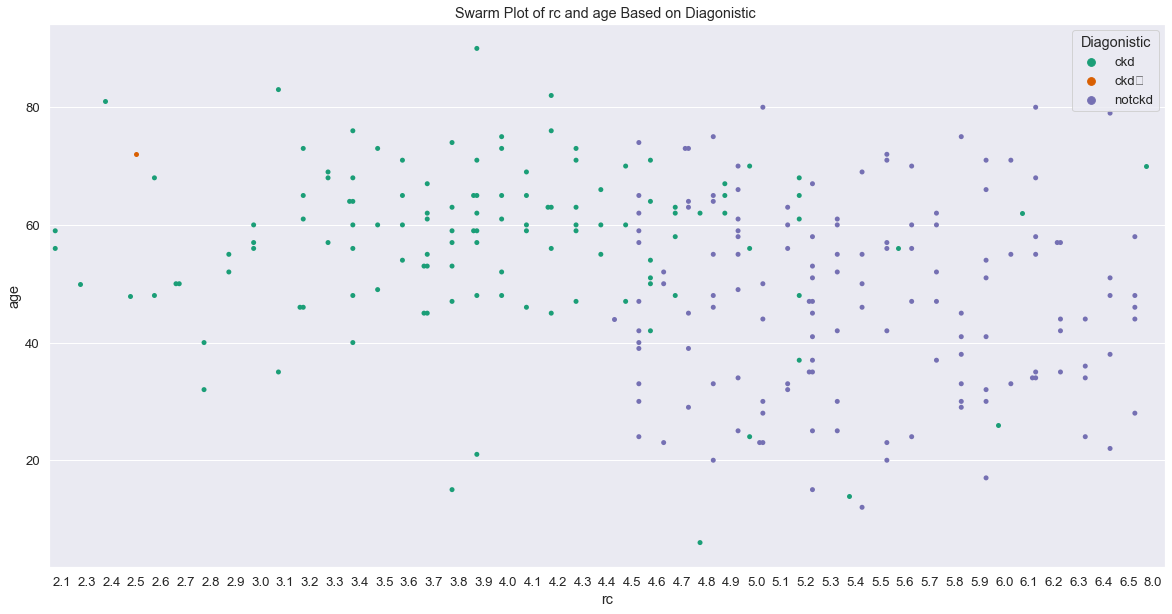

In [113]:
sns.swarmplot( x = "rc" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of rc and age Based on Diagonistic ")

Text(0.5, 1.0, 'Swarm Plot of htn and age Based on Diagonistic ')

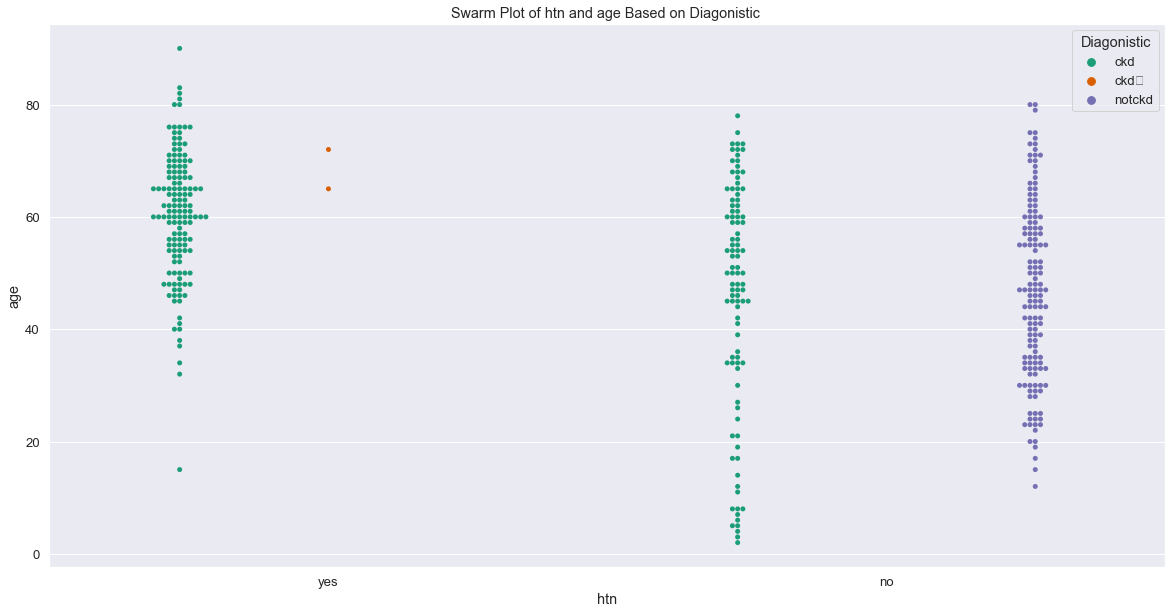

In [114]:
sns.swarmplot( x = "htn" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of htn and age Based on Diagonistic ")

Text(0.5, 1.0, 'Swarm Plot of dm and age Based on Diagonistic ')

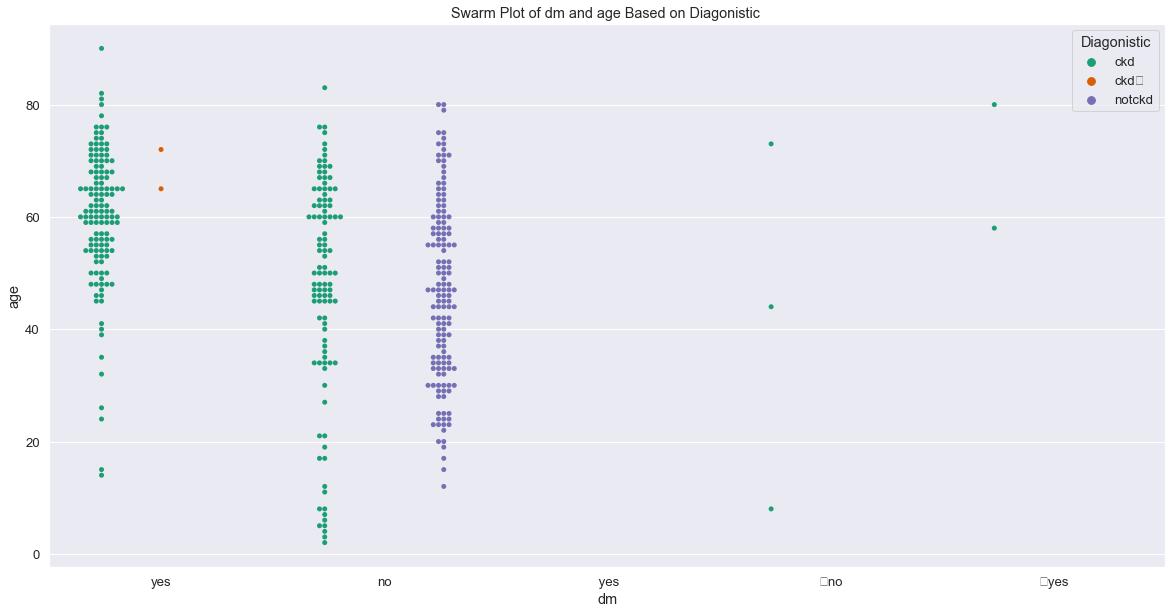

In [115]:
sns.swarmplot( x = "dm" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of dm and age Based on Diagonistic ")

Text(0.5, 1.0, 'Swarm Plot of cad and age Based on Diagonistic ')

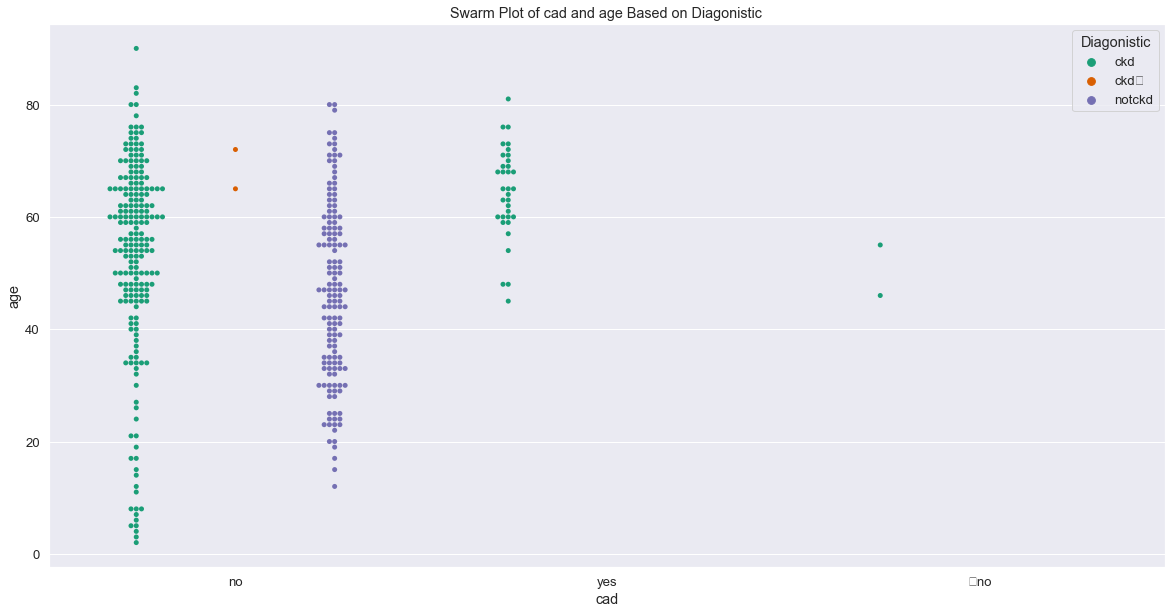

In [116]:
sns.swarmplot( x = "cad" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of cad and age Based on Diagonistic ")

Text(0.5, 1.0, 'Swarm Plot of Diagonistic and age Based on Diagonistic ')

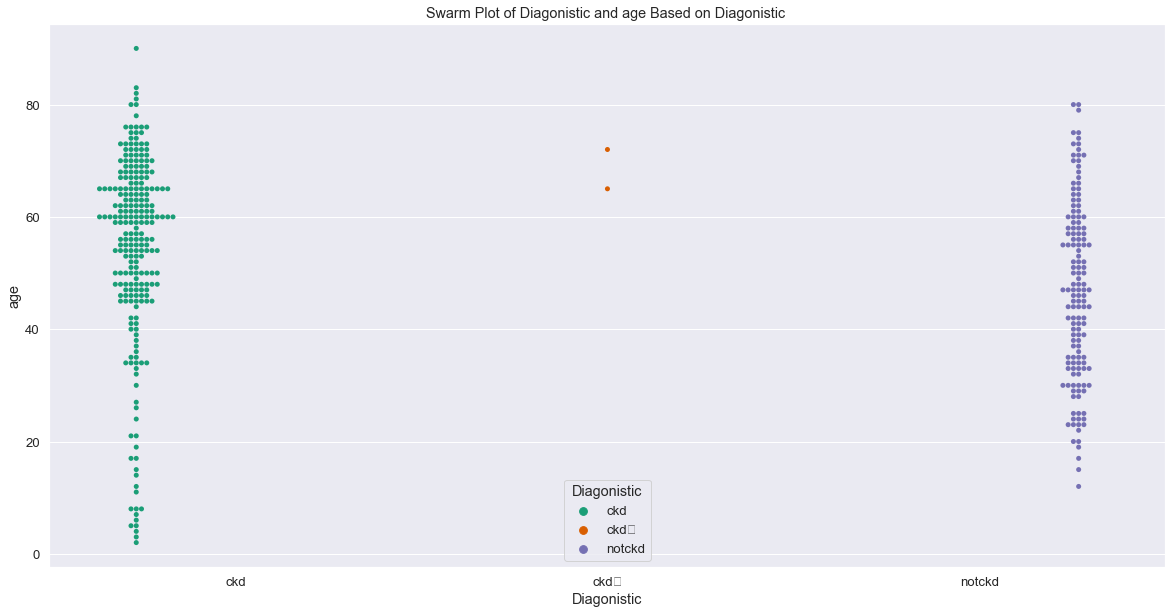

In [117]:
sns.swarmplot( x = "Diagonistic" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of Diagonistic and age Based on Diagonistic ")

Text(0.5, 1.0, 'Box Plot of rbc and age Based on Diagonistic ')

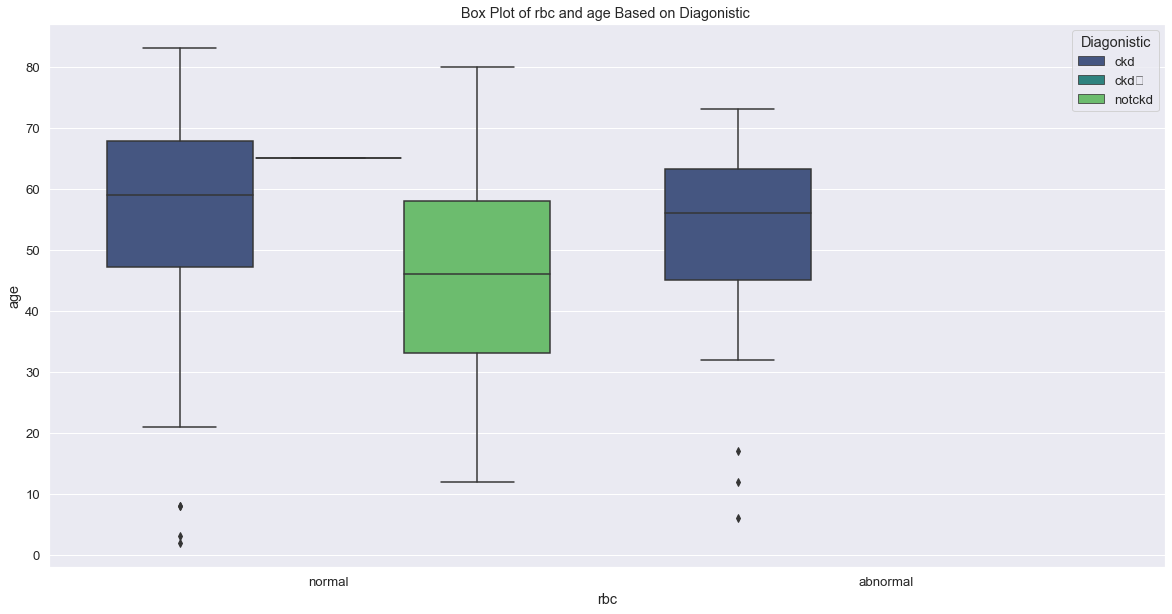

In [118]:
sns.boxplot( x = "rbc" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of rbc and age Based on Diagonistic ")

Text(0.5, 1.0, 'Box Plot of pc and age Based on Diagonistic ')

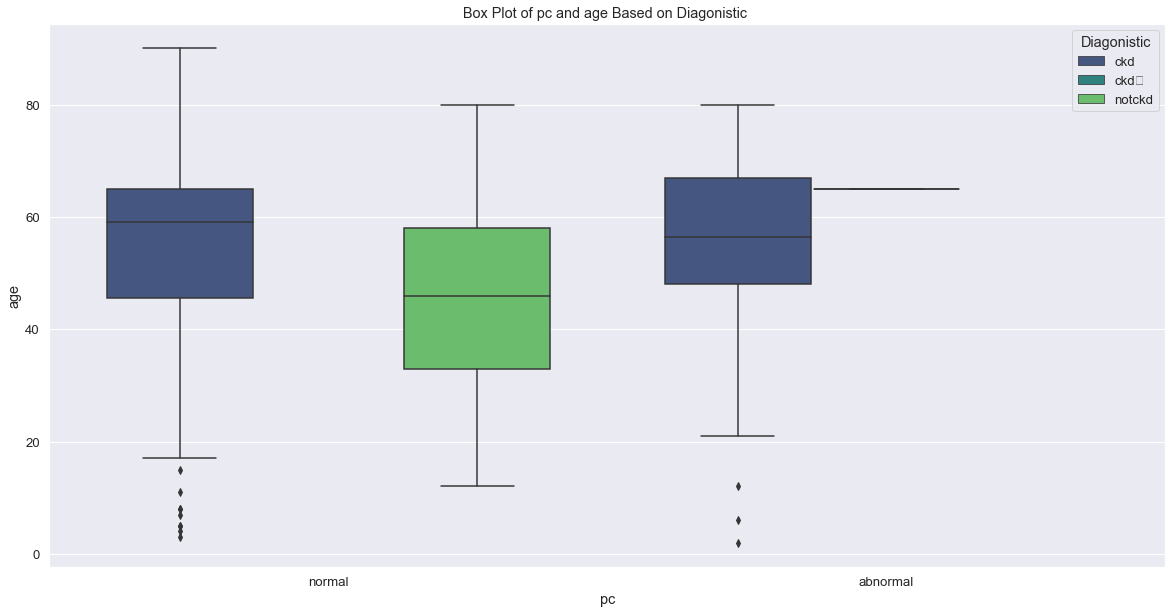

In [119]:
sns.boxplot( x = "pc" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of pc and age Based on Diagonistic ")

Text(0.5, 1.0, 'Box Plot of pcc and age Based on Diagonistic ')

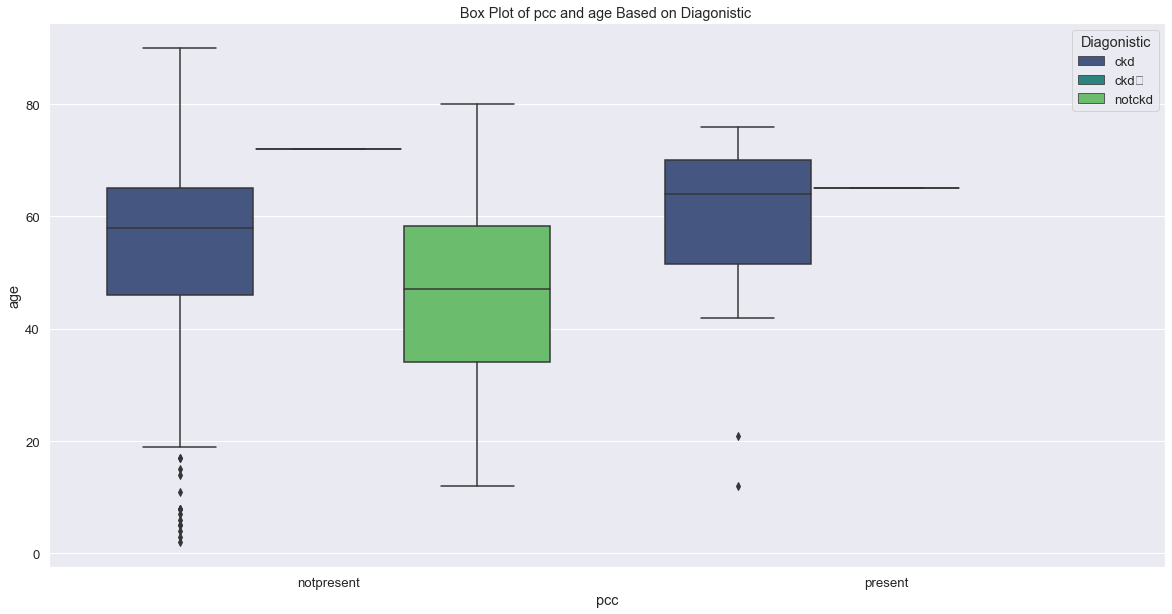

In [120]:
sns.boxplot( x = "pcc" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of pcc and age Based on Diagonistic ")

Text(0.5, 1.0, 'Box Plot of ba and age Based on Diagonistic ')

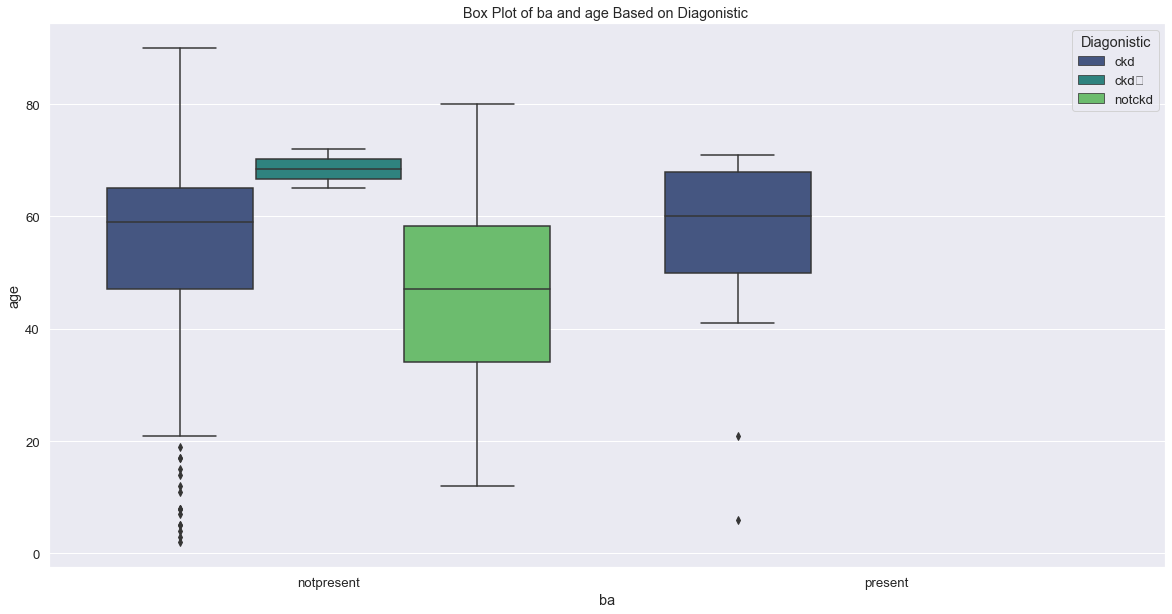

In [121]:
sns.boxplot( x = "ba" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of ba and age Based on Diagonistic ")

Text(0.5, 1.0, 'Box Plot of pcv and age Based on Diagonistic ')

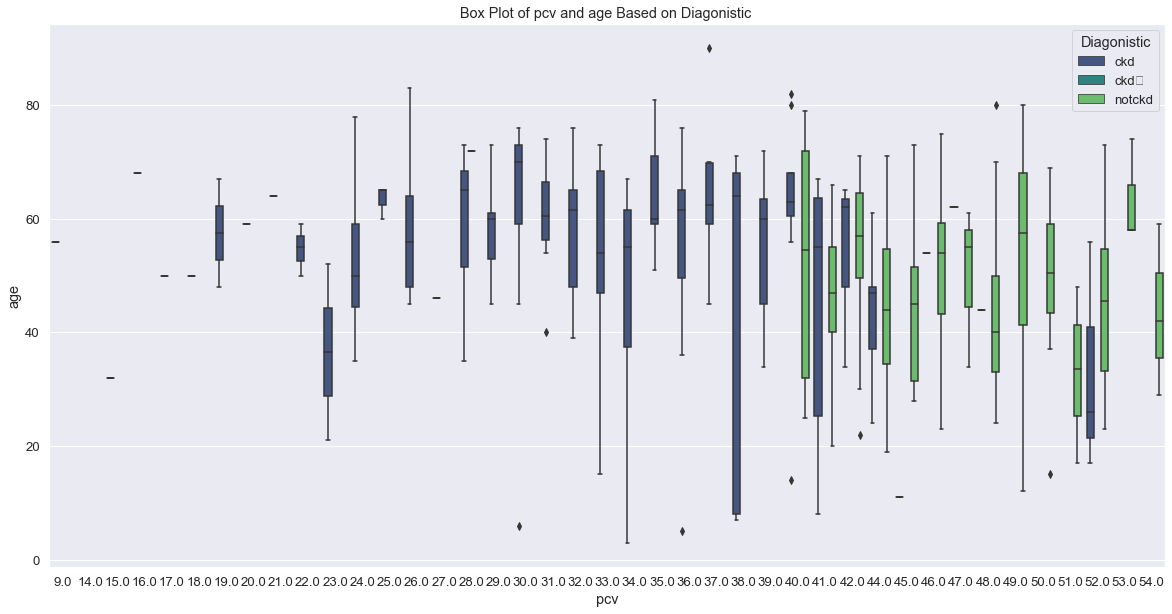

In [122]:
sns.boxplot( x = "pcv" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of pcv and age Based on Diagonistic ")

Text(0.5, 1.0, 'Box Plot of wc and age Based on Diagonistic ')

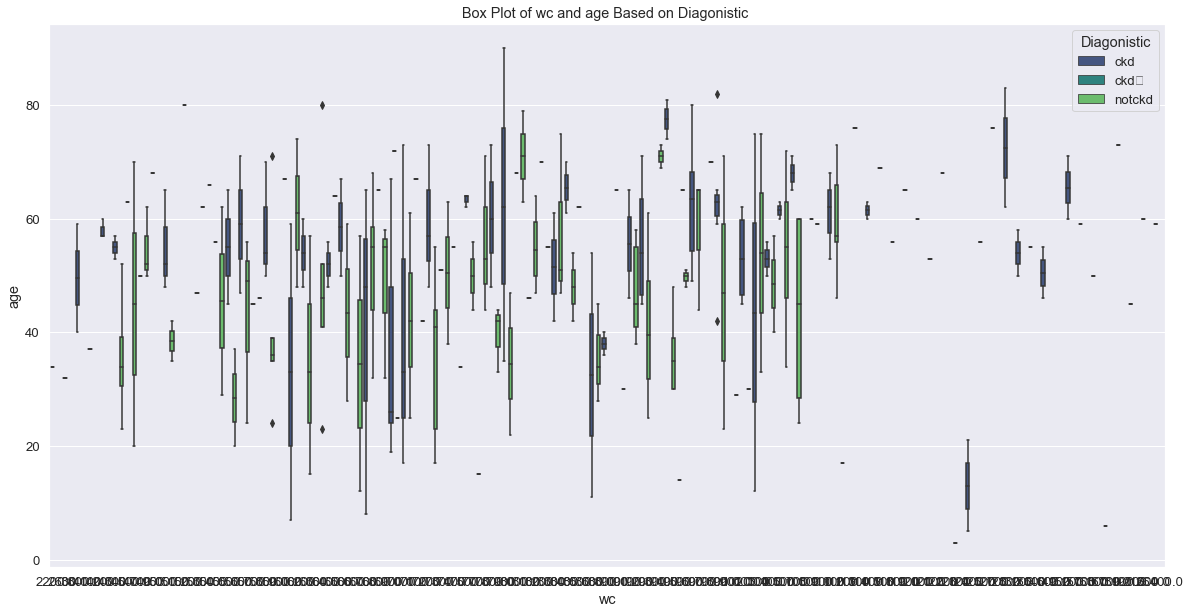

In [123]:
sns.boxplot( x = "wc" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of wc and age Based on Diagonistic ")

Text(0.5, 1.0, 'Box Plot of rc and age Based on Diagonistic ')

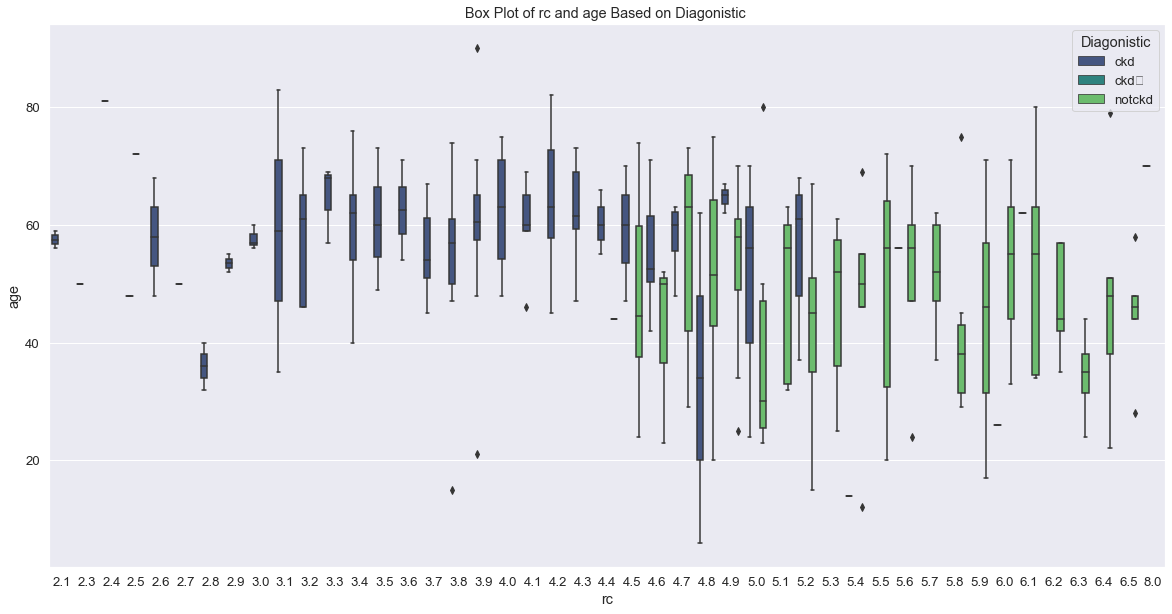

In [124]:
sns.boxplot( x = "rc" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of rc and age Based on Diagonistic ")

Text(0.5, 1.0, 'Box Plot of htn and age Based on Diagonistic ')

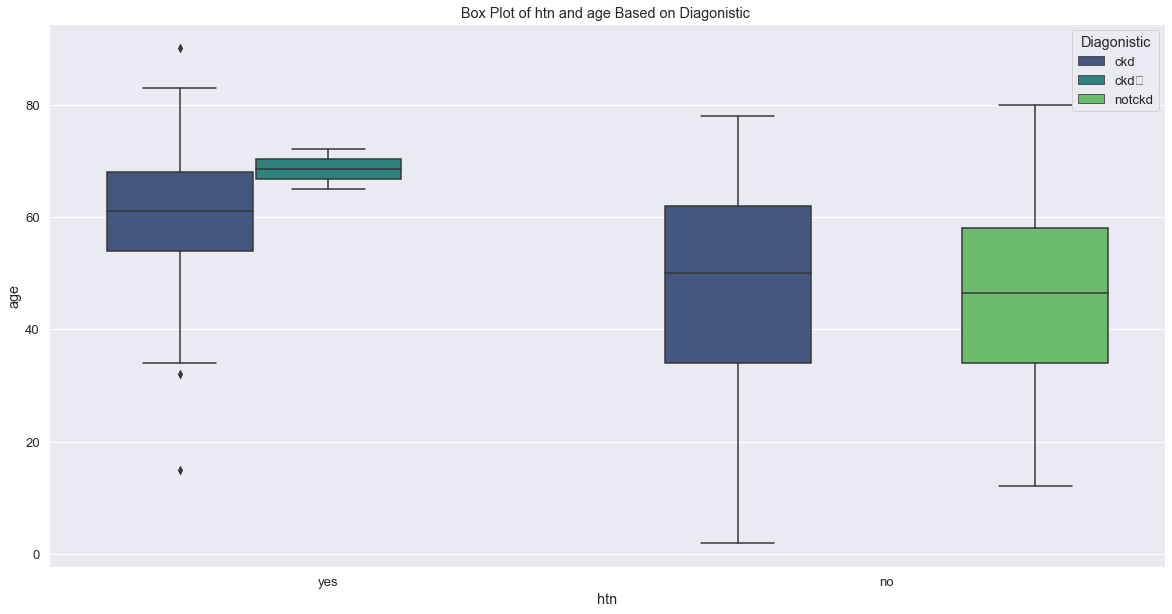

In [125]:
sns.boxplot( x = "htn" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of htn and age Based on Diagonistic ")

Text(0.5, 1.0, 'Box Plot of dm and age Based on Diagonistic ')

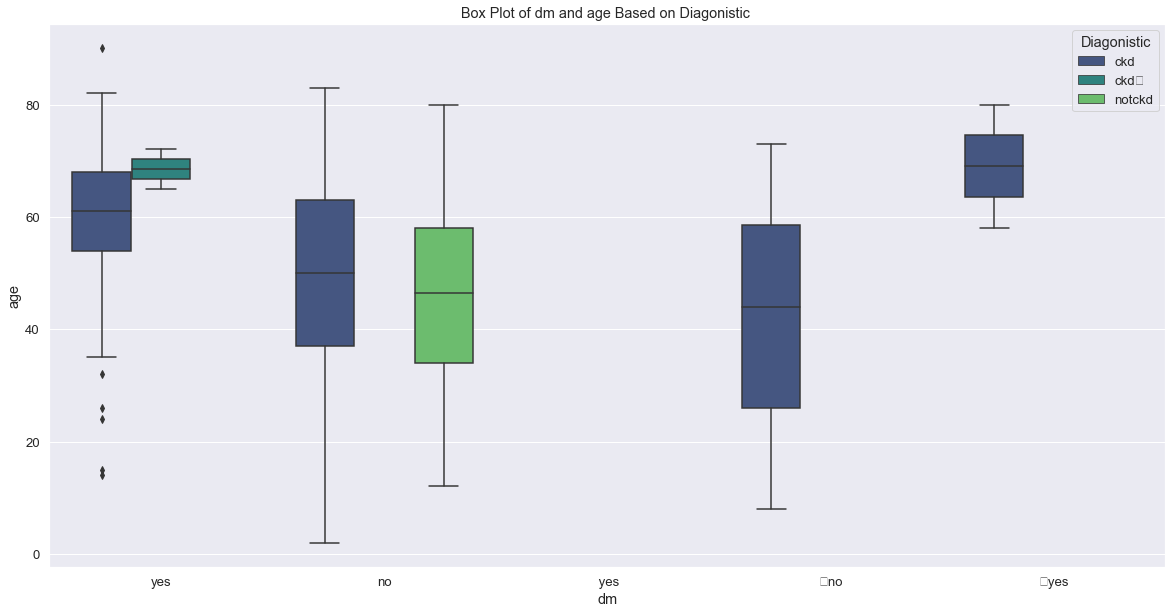

In [126]:
sns.boxplot( x = "dm" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of dm and age Based on Diagonistic ")

Text(0.5, 1.0, 'Box Plot of cad and age Based on Diagonistic ')

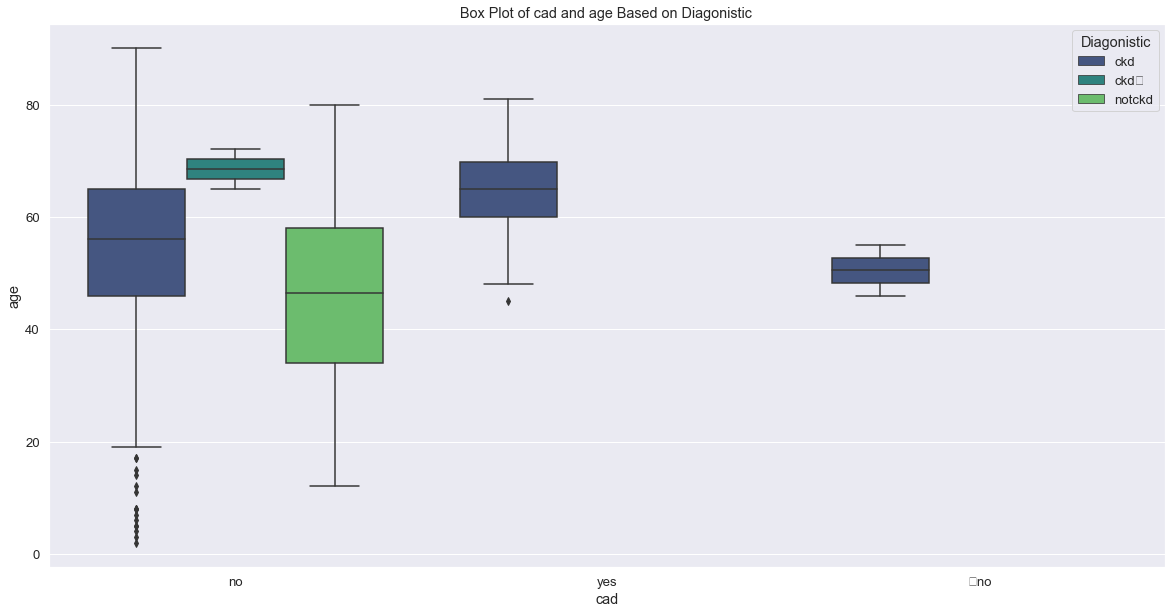

In [127]:
sns.boxplot( x = "cad" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of cad and age Based on Diagonistic ")

Text(0.5, 1.0, 'Box Plot of Diagonistic and age Based on Diagonistic ')

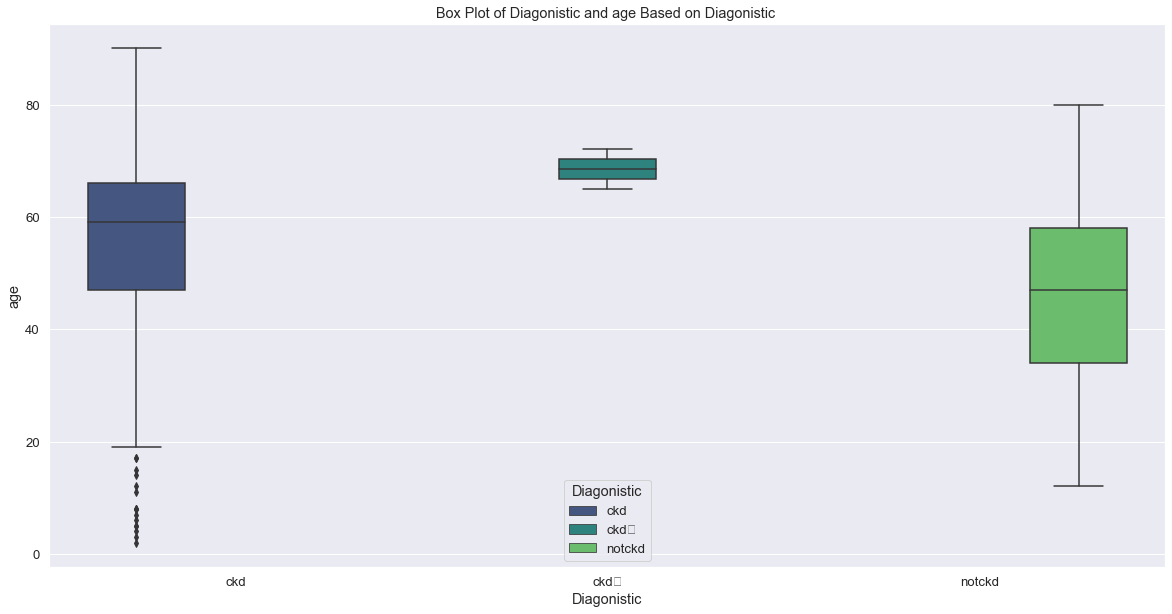

In [128]:
sns.boxplot( x = "Diagonistic" , y = "age" , data = df ,hue = "Diagonistic" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of Diagonistic and age Based on Diagonistic ")

In [129]:
# get describtion file of data ::

profile = pp.ProfileReport(df , title = "Chronic_Kidney_Report" , explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [130]:
# To save report as html file
profile.to_file("Chronic_Kidney-Data_Report.html")


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<p id = "ETl">ETL-Process</p>

# 1 - Feature_Engineering Technice ::
*********************************************************************
* Its one of the most important phase in data scientist life cycle which use to generate new usefull features from the old  features which not enough for train model.

In [131]:
df

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0.0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1.0   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2.0  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3.0  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4.0  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..     ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395.0  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396.0  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397.0  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398.0  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399.0  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...   pcv      wc   rc  htn   dm  cad  appet   pe  ane  \
0    notpresent  ...  44.0  7800.0  5.2  yes  yes   no   good   no   no   
1    notpresent  ...  38.0  6000.0  NaN   no   no   no   good   no   no   
2    notpresent  ...  31.0  7500.0  NaN   no  yes   no   poor   no  yes   
3    notpresent  ...  32.0  6700.0  3.9  yes   no   no   poor  yes  yes   
4    notpresent  ...  35.0  7300.0  4.6   no   no   no   good   no   no   
..          ...  ...   ...     ...  ...  ...  ...  ...    ...  ...  ...   
395  notpresent  ...  47.0  6700.0  4.9   no   no   no   good   no   no   
396  notpresent  ...  54.0  7800.0  6.2   no   no   no   good   no   no   
397  notpresent  ...  49.0  6600.0  5.4   no   no   no   good   no   no   
398  notpresent  ...  51.0  7200.0  5.9   no   no   no   good   no   no   
399  notpresent  ...  53.0  6800.0  6.1   no   no   no   good   no   no   

    Diagonistic  
0           ckd  
1           ckd  
2           ckd  
3           ckd  
4           ckd  
..          ...  
395      notckd  
396      notckd  
397      notckd  
398      notckd  
399      notckd  

[400 rows x 26 columns]

# 2 - Transform_data ::
*************************************************
* 2 :: *Cleancing data* ::
     * Data in the real state dont comes cleaned is come dirty may include ::
         * non_logic_data_values.
         * Noisy and Errors.
         * Duplicaties data.
         * Missing_data_Values.

# non_logic_Values ::
***********************************
* Its one of the common issuse which consider us on data which data may include errors , noisy data such as :
    * Negaive values and that not logic.
    * Fraction Values and that not logic also.

In [132]:
# Check data include Non_logic data_Values ::

for col in df.columns :
    print(f"The Col ({col})\n")
    print(f"The Unique Values of ({col}) :: {df[col].unique()}\n\n")
    print(f"The Value_Counts of ({col}) :: \n{df[col].value_counts()}")
    print("-" * 80)

The Col (id)

The Unique Values of (id) :: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  nan  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188

# Dublicates data ::
***************************
* Its also one of the most common issue which may found reapat or redendant data that generate from :
    * Miss understanding from data entry person.
    * There are two cols have diff names but present the same entity.

In [133]:
# detect duplicated data ::

df.duplicated().sum()

0

In [134]:
# To confirm that ::
df.drop_duplicates(inplace=True)

In [135]:
# investigate data not include duplicaties records ::

df.duplicated().sum()

0

# Missing Dtat Values ::
**********************************
* Its The Most common issue which consider us on data that generate from ::
    * Miss understanding from data entry person.
    * Falier the impute system.
* We must identify that missing data and impute it, we will solve that issue by ::
    * Fill Missing values use :
        * Mean value if data not include outliers.
        * Median value if data include outliers.
        * Mode value if that categorical data.
    * Or Impute data use :;
        * Simpleimputer ML Technice.
        * KNN ML Model.

In [136]:
# detect missing data values ::

df.isnull().sum()

id               1
age             15
bp              12
sg              47
al              46
su              49
rbc            152
pc              65
pcc              4
ba               4
bgr             44
bu              19
sc              17
sod             87
pot             88
hemo            52
pcv             86
wc             106
rc             131
htn              2
dm               2
cad              2
appet            1
pe               1
ane              1
Diagonistic      0
dtype: int64

In [137]:
Num_Missing     = df.isnull().sum().sort_values(ascending = False)
Precent_Missing = ( df.isnull().sum() / df.isnull().count() ).sort_values(ascending = False)
Missing_Data    = pd.concat( [ Num_Missing , Precent_Missing ] ,axis=1 , keys = ["Num_Missing" , "Prec_Missing"])
Missing_Data

Num_Missing  Prec_Missing
rbc                  152        0.3800
rc                   131        0.3275
wc                   106        0.2650
pot                   88        0.2200
sod                   87        0.2175
pcv                   86        0.2150
pc                    65        0.1625
hemo                  52        0.1300
su                    49        0.1225
sg                    47        0.1175
al                    46        0.1150
bgr                   44        0.1100
bu                    19        0.0475
sc                    17        0.0425
age                   15        0.0375
bp                    12        0.0300
ba                     4        0.0100
pcc                    4        0.0100
htn                    2        0.0050
dm                     2        0.0050
cad                    2        0.0050
pe                     1        0.0025
ane                    1        0.0025
id                     1        0.0025
appet                  1        0.0025
Diagonistic            0        0.0000

In [138]:
Num_Feats = df.select_dtypes(include=["number"]).columns
Cat_Feats = df.select_dtypes(include=["object"]).columns

In [139]:
# Fill Mising data values in Numerical data with Mean
for num in Num_Feats :
    df[num].fillna(df[num].mean() , inplace=True)

In [140]:
for cat in Cat_Feats :
    df[cat].fillna(df[cat].mode()[0] , inplace=True)

In [141]:
# investigate data not include Missing data

Num_Missing     = df.isnull().sum().sort_values(ascending = False)
Precent_Missing = ( df.isnull().sum() / df.isnull().count() ).sort_values(ascending = False)
Missing_Data    = pd.concat( [ Num_Missing , Precent_Missing ] ,axis=1 , keys = ["Num_Missing" , "Prec_Missing"])
Missing_Data

Num_Missing  Prec_Missing
id                     0           0.0
age                    0           0.0
ane                    0           0.0
pe                     0           0.0
appet                  0           0.0
cad                    0           0.0
dm                     0           0.0
htn                    0           0.0
rc                     0           0.0
wc                     0           0.0
pcv                    0           0.0
hemo                   0           0.0
pot                    0           0.0
sod                    0           0.0
sc                     0           0.0
bu                     0           0.0
bgr                    0           0.0
ba                     0           0.0
pcc                    0           0.0
pc                     0           0.0
rbc                    0           0.0
su                     0           0.0
al                     0           0.0
sg                     0           0.0
bp                     0           0.0
Diagonistic            0           0.0

In [142]:
# Handling data By coverting it into 0 , 1
df["rbc"] = df["rbc"].apply(lambda x :1 if x == "normal"  else 0 )
df["pc"] = df["pc"].apply(lambda x : 1 if x == "normal" else 0 )
df["pcc"] = df["pcc"].apply(lambda x : 1 if  x == "present" else 0 )
df["ba"] = df["ba"].apply(lambda x : 1 if x == "present" else 0 )
df["htn"] = df["htn"].apply(lambda x : 1 if x == "yes" else 0 )
df["pe"] = df["pe"].apply(lambda x : 1 if x == "yes" else 0 )
df["ane"] = df["ane"].apply(lambda x : 1 if x == "yes"  else 0 )
df["dm"] = df["dm"].apply(lambda x : 1 if x == "yes"  else 0 )
df["cad"] = df["cad"].apply(lambda x : 1 if x == "yes" else 0 )
df["appet"] = df["appet"].apply(lambda x : 1 if x == "good" else 0 )
df["Diagonistic"] = df["Diagonistic"].apply(lambda x : 1 if x == "ckd" else 0 )


In [143]:
df["dm"].value_counts()

0    266
1    134
Name: dm, dtype: int64

In [144]:


df["Diagonistic"].value_counts()


1    248
0    152
Name: Diagonistic, dtype: int64

* 3 :: *Data_Preprocessing* ::
    * Data may include ::
        * Outliers values.
        * Impalanced classes.
        * Text data.

# Outliers Values ::
**********************************
* Its one of the most common issuse which conseder us on data But we must investigate that value already outliers or anominal data values Based on ::
    * Understanding the domain of the Business well.
    * If num of ouliers values few that mean may that values outlier.
    * If num of outliers values hue that mean may that values not outliers.
* If that data outlier we will replace it by mean value or drop it.

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           400 non-null    float64
 1   age          400 non-null    float64
 2   bp           400 non-null    float64
 3   sg           400 non-null    float64
 4   al           400 non-null    float64
 5   su           400 non-null    float64
 6   rbc          400 non-null    int64  
 7   pc           400 non-null    int64  
 8   pcc          400 non-null    int64  
 9   ba           400 non-null    int64  
 10  bgr          400 non-null    float64
 11  bu           400 non-null    float64
 12  sc           400 non-null    float64
 13  sod          400 non-null    float64
 14  pot          400 non-null    float64
 15  hemo         400 non-null    float64
 16  pcv          400 non-null    float64
 17  wc           400 non-null    float64
 18  rc           400 non-null    float64
 19  htn     

<AxesSubplot:ylabel='age'>

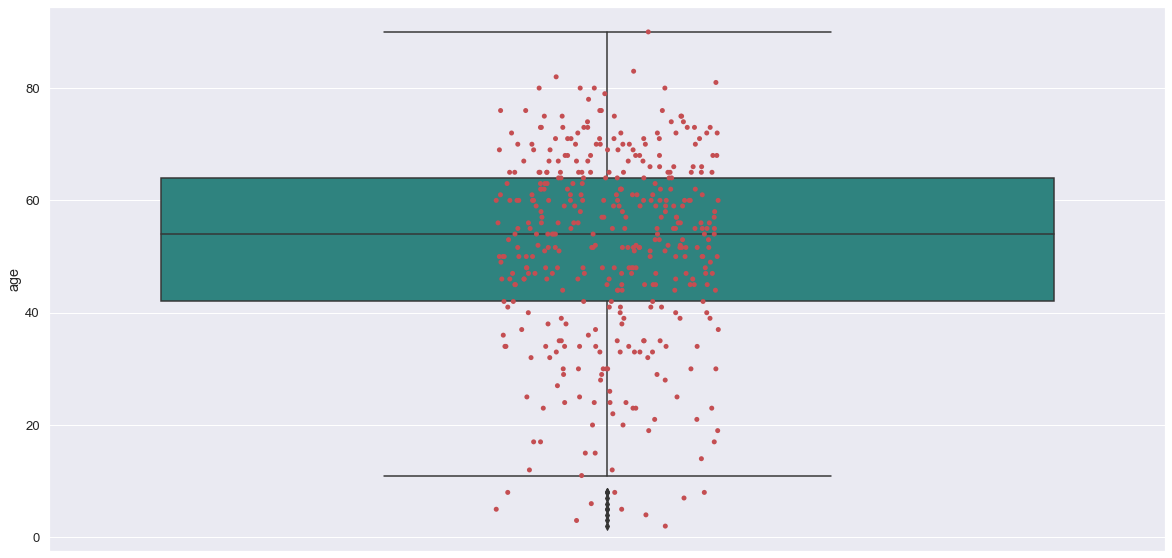

In [146]:
# detect outliers values in age feature ::

sns.boxplot  (y = "age" , data = df , palette="viridis")
sns.stripplot(y = "age" , data = df , color = "r")

<AxesSubplot:ylabel='bp'>

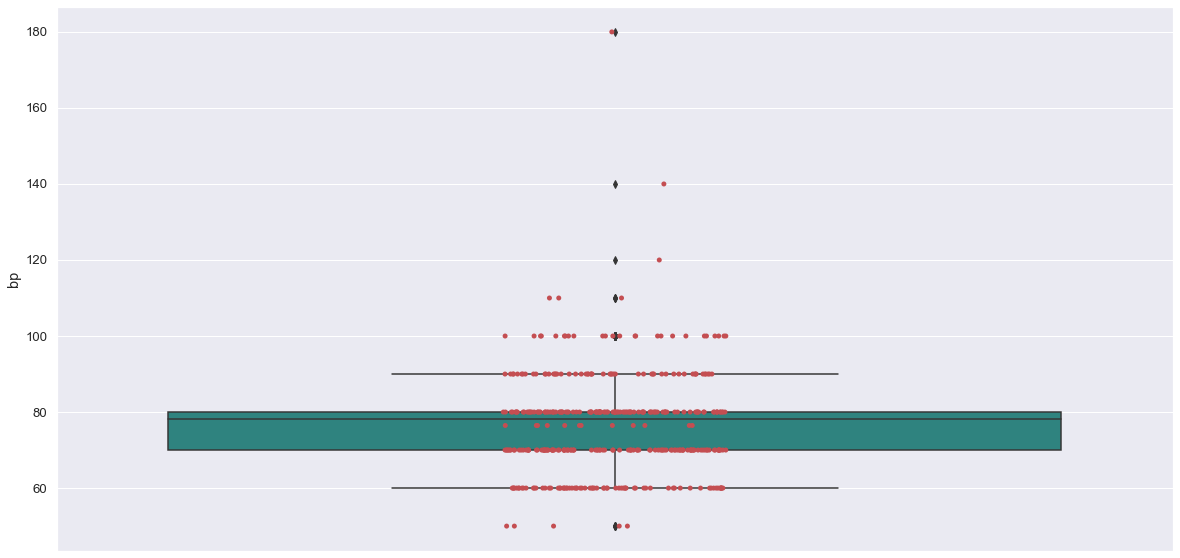

In [147]:
# detect outliers values in bp feature ::

sns.boxplot  (y = "bp" , data = df , palette="viridis")
sns.stripplot(y = "bp" , data = df , color = "r")

<AxesSubplot:ylabel='sg'>

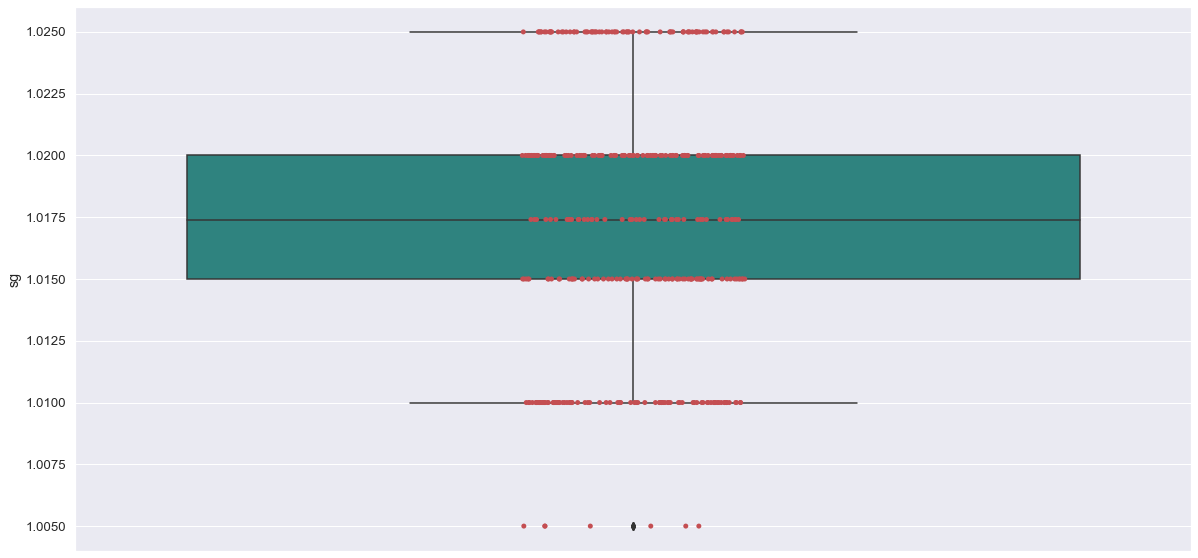

In [148]:
# detect outliers values in sg feature ::

sns.boxplot  (y = "sg" , data = df , palette="viridis")
sns.stripplot(y = "sg" , data = df , color = "r")

<AxesSubplot:ylabel='al'>

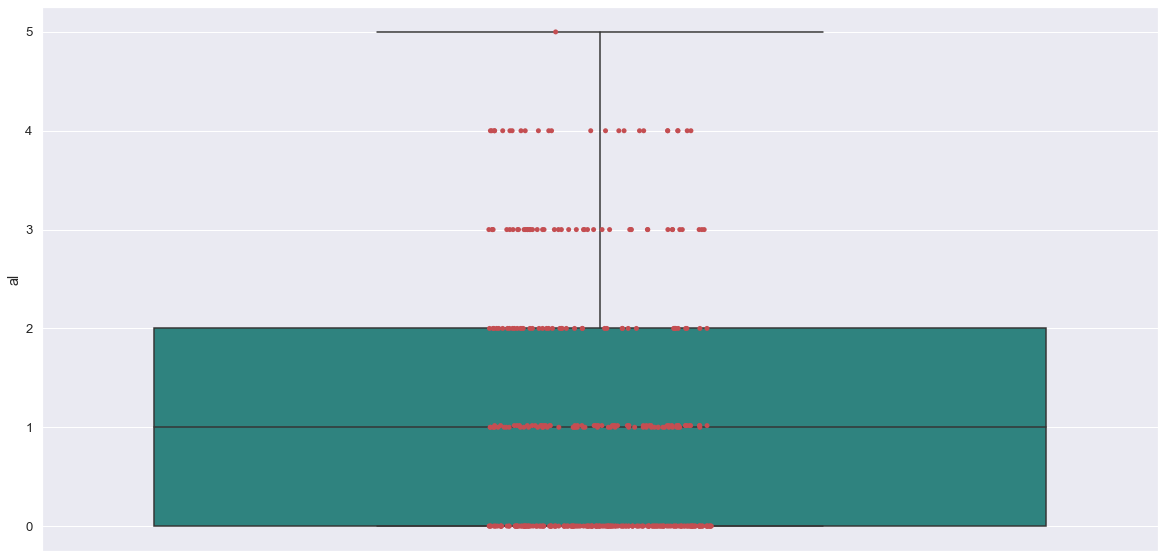

In [149]:
# detect outliers values in al feature ::

sns.boxplot  (y = "al" , data = df , palette="viridis")
sns.stripplot(y = "al" , data = df , color = "r")

<AxesSubplot:ylabel='su'>

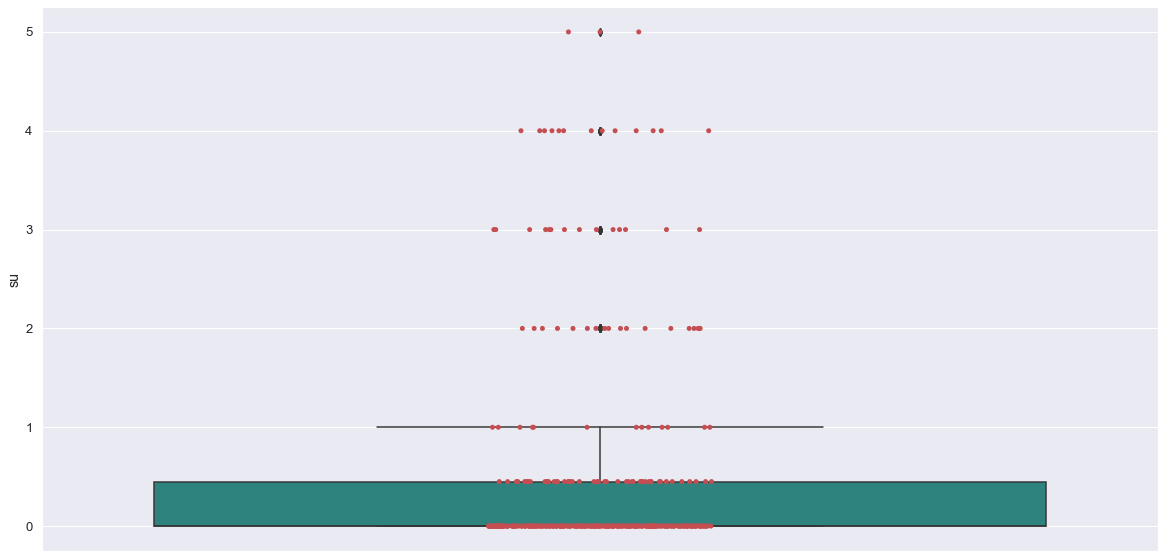

In [150]:
# detect outliers values in su feature ::

sns.boxplot  (y = "su" , data = df , palette="viridis")
sns.stripplot(y = "su" , data = df , color = "r")

<AxesSubplot:ylabel='bu'>

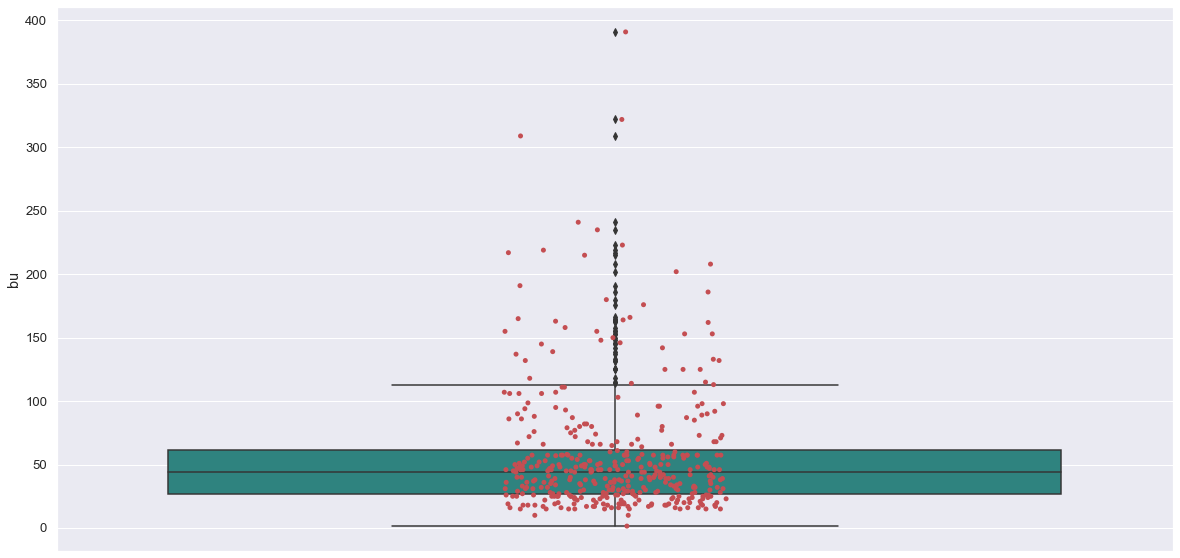

In [151]:
# detect outliers values in bu feature ::

sns.boxplot  (y = "bu" , data = df , palette="viridis")
sns.stripplot(y = "bu" , data = df , color = "r")

<AxesSubplot:ylabel='sc'>

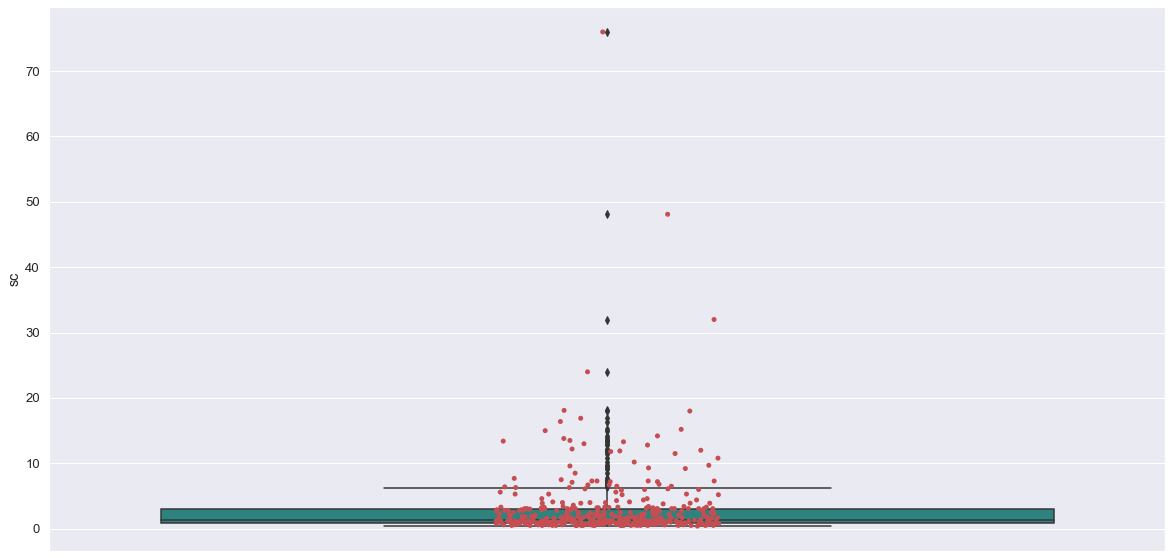

In [152]:
# detect outliers values in sc feature ::

sns.boxplot  (y = "sc" , data = df , palette="viridis")
sns.stripplot(y = "sc" , data = df , color = "r")

<AxesSubplot:ylabel='sod'>

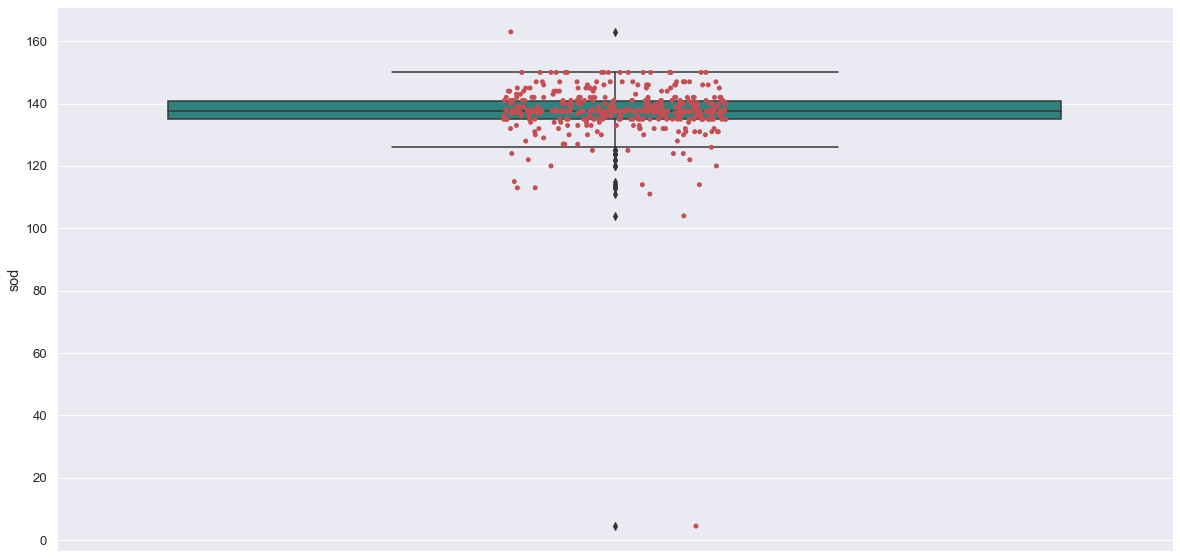

In [153]:
# detect outliers values in sod feature ::

sns.boxplot  (y = "sod" , data = df , palette="viridis")
sns.stripplot(y = "sod" , data = df , color = "r")

<AxesSubplot:ylabel='pot'>

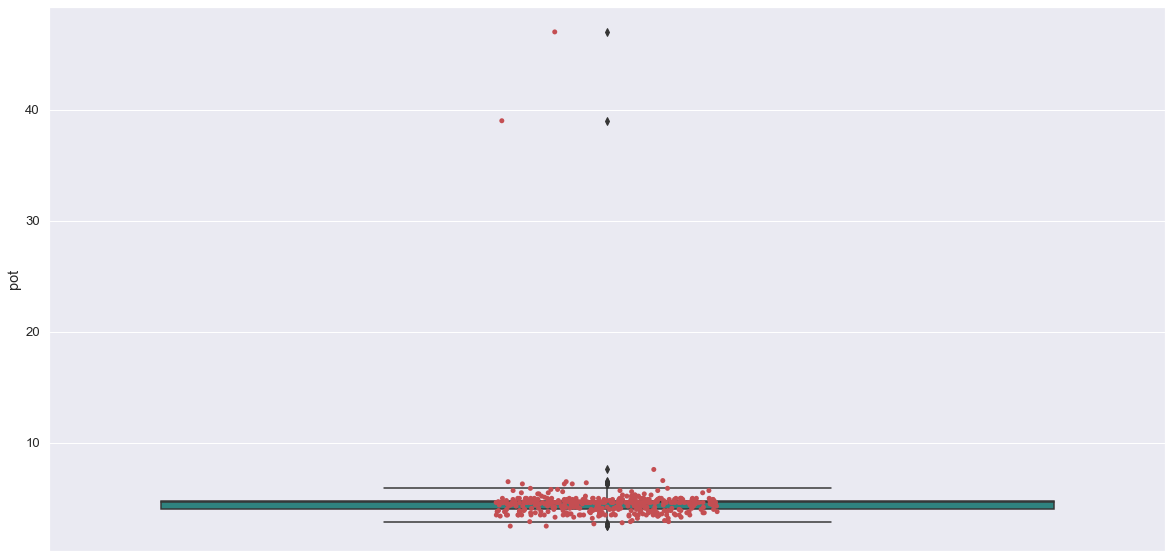

In [154]:
# detect outliers values in pot feature ::

sns.boxplot  (y = "pot" , data = df , palette="viridis")
sns.stripplot(y = "pot" , data = df , color = "r")

<AxesSubplot:ylabel='hemo'>

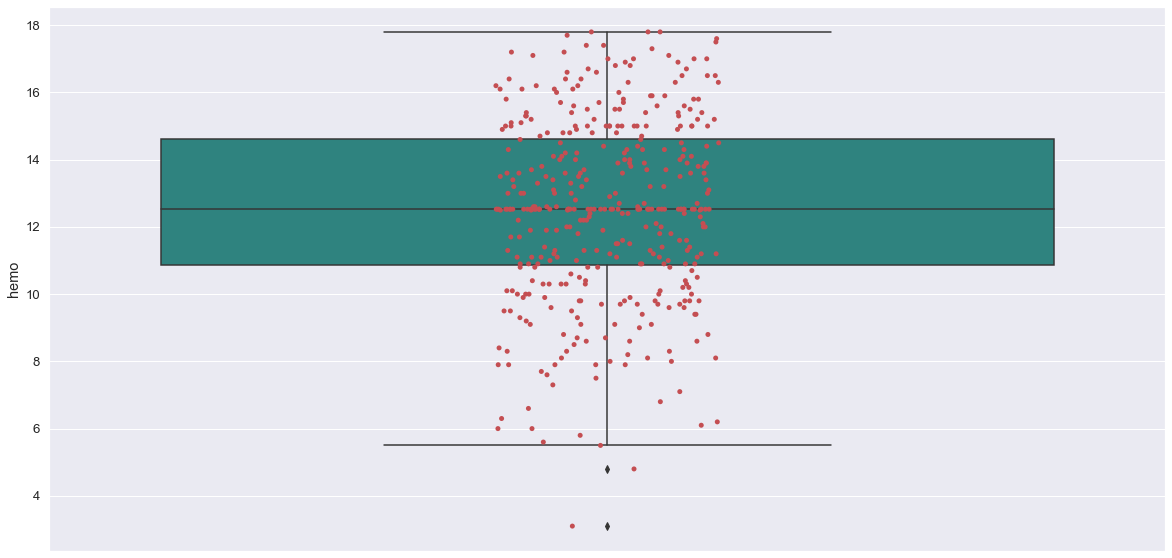

In [155]:
# detect outliers values in hemo feature ::

sns.boxplot  (y = "hemo" , data = df , palette="viridis")
sns.stripplot(y = "hemo" , data = df , color = "r")

# Processing Text data ::
**********************************************
* We must handling test data into numerical numbers becouse ML Models not understanding that text data so that we use one_hot_encoding or one_variable_encoding technices.
* we are alraedy encoding categorical data into integer values.


In [156]:
# creating dummy variables for categorical features
df = pd.get_dummies(df,drop_first=True)

In [157]:
df

id   age    bp     sg   al   su  rbc  pc  pcc  ba  ...   pcv      wc  \
0      0.0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  ...  44.0  7800.0   
1      1.0   7.0  50.0  1.020  4.0  0.0    1   1    0   0  ...  38.0  6000.0   
2      2.0  62.0  80.0  1.010  2.0  3.0    1   1    0   0  ...  31.0  7500.0   
3      3.0  48.0  70.0  1.005  4.0  0.0    1   0    1   0  ...  32.0  6700.0   
4      4.0  51.0  80.0  1.010  2.0  0.0    1   1    0   0  ...  35.0  7300.0   
..     ...   ...   ...    ...  ...  ...  ...  ..  ...  ..  ...   ...     ...   
395  395.0  55.0  80.0  1.020  0.0  0.0    1   1    0   0  ...  47.0  6700.0   
396  396.0  42.0  70.0  1.025  0.0  0.0    1   1    0   0  ...  54.0  7800.0   
397  397.0  12.0  80.0  1.020  0.0  0.0    1   1    0   0  ...  49.0  6600.0   
398  398.0  17.0  60.0  1.025  0.0  0.0    1   1    0   0  ...  51.0  7200.0   
399  399.0  58.0  80.0  1.025  0.0  0.0    1   1    0   0  ...  53.0  6800.0   

           rc  htn  dm  cad  appet  pe  ane  Diagonistic  
0    5.200000    1   1    0      1   0    0            1  
1    4.707435    0   0    0      1   0    0            1  
2    4.707435    0   1    0      0   0    1            1  
3    3.900000    1   0    0      0   1    1            1  
4    4.600000    0   0    0      1   0    0            1  
..        ...  ...  ..  ...    ...  ..  ...          ...  
395  4.900000    0   0    0      1   0    0            0  
396  6.200000    0   0    0      1   0    0            0  
397  5.400000    0   0    0      1   0    0            0  
398  5.900000    0   0    0      1   0    0            0  
399  6.100000    0   0    0      1   0    0            0  

[400 rows x 26 columns]

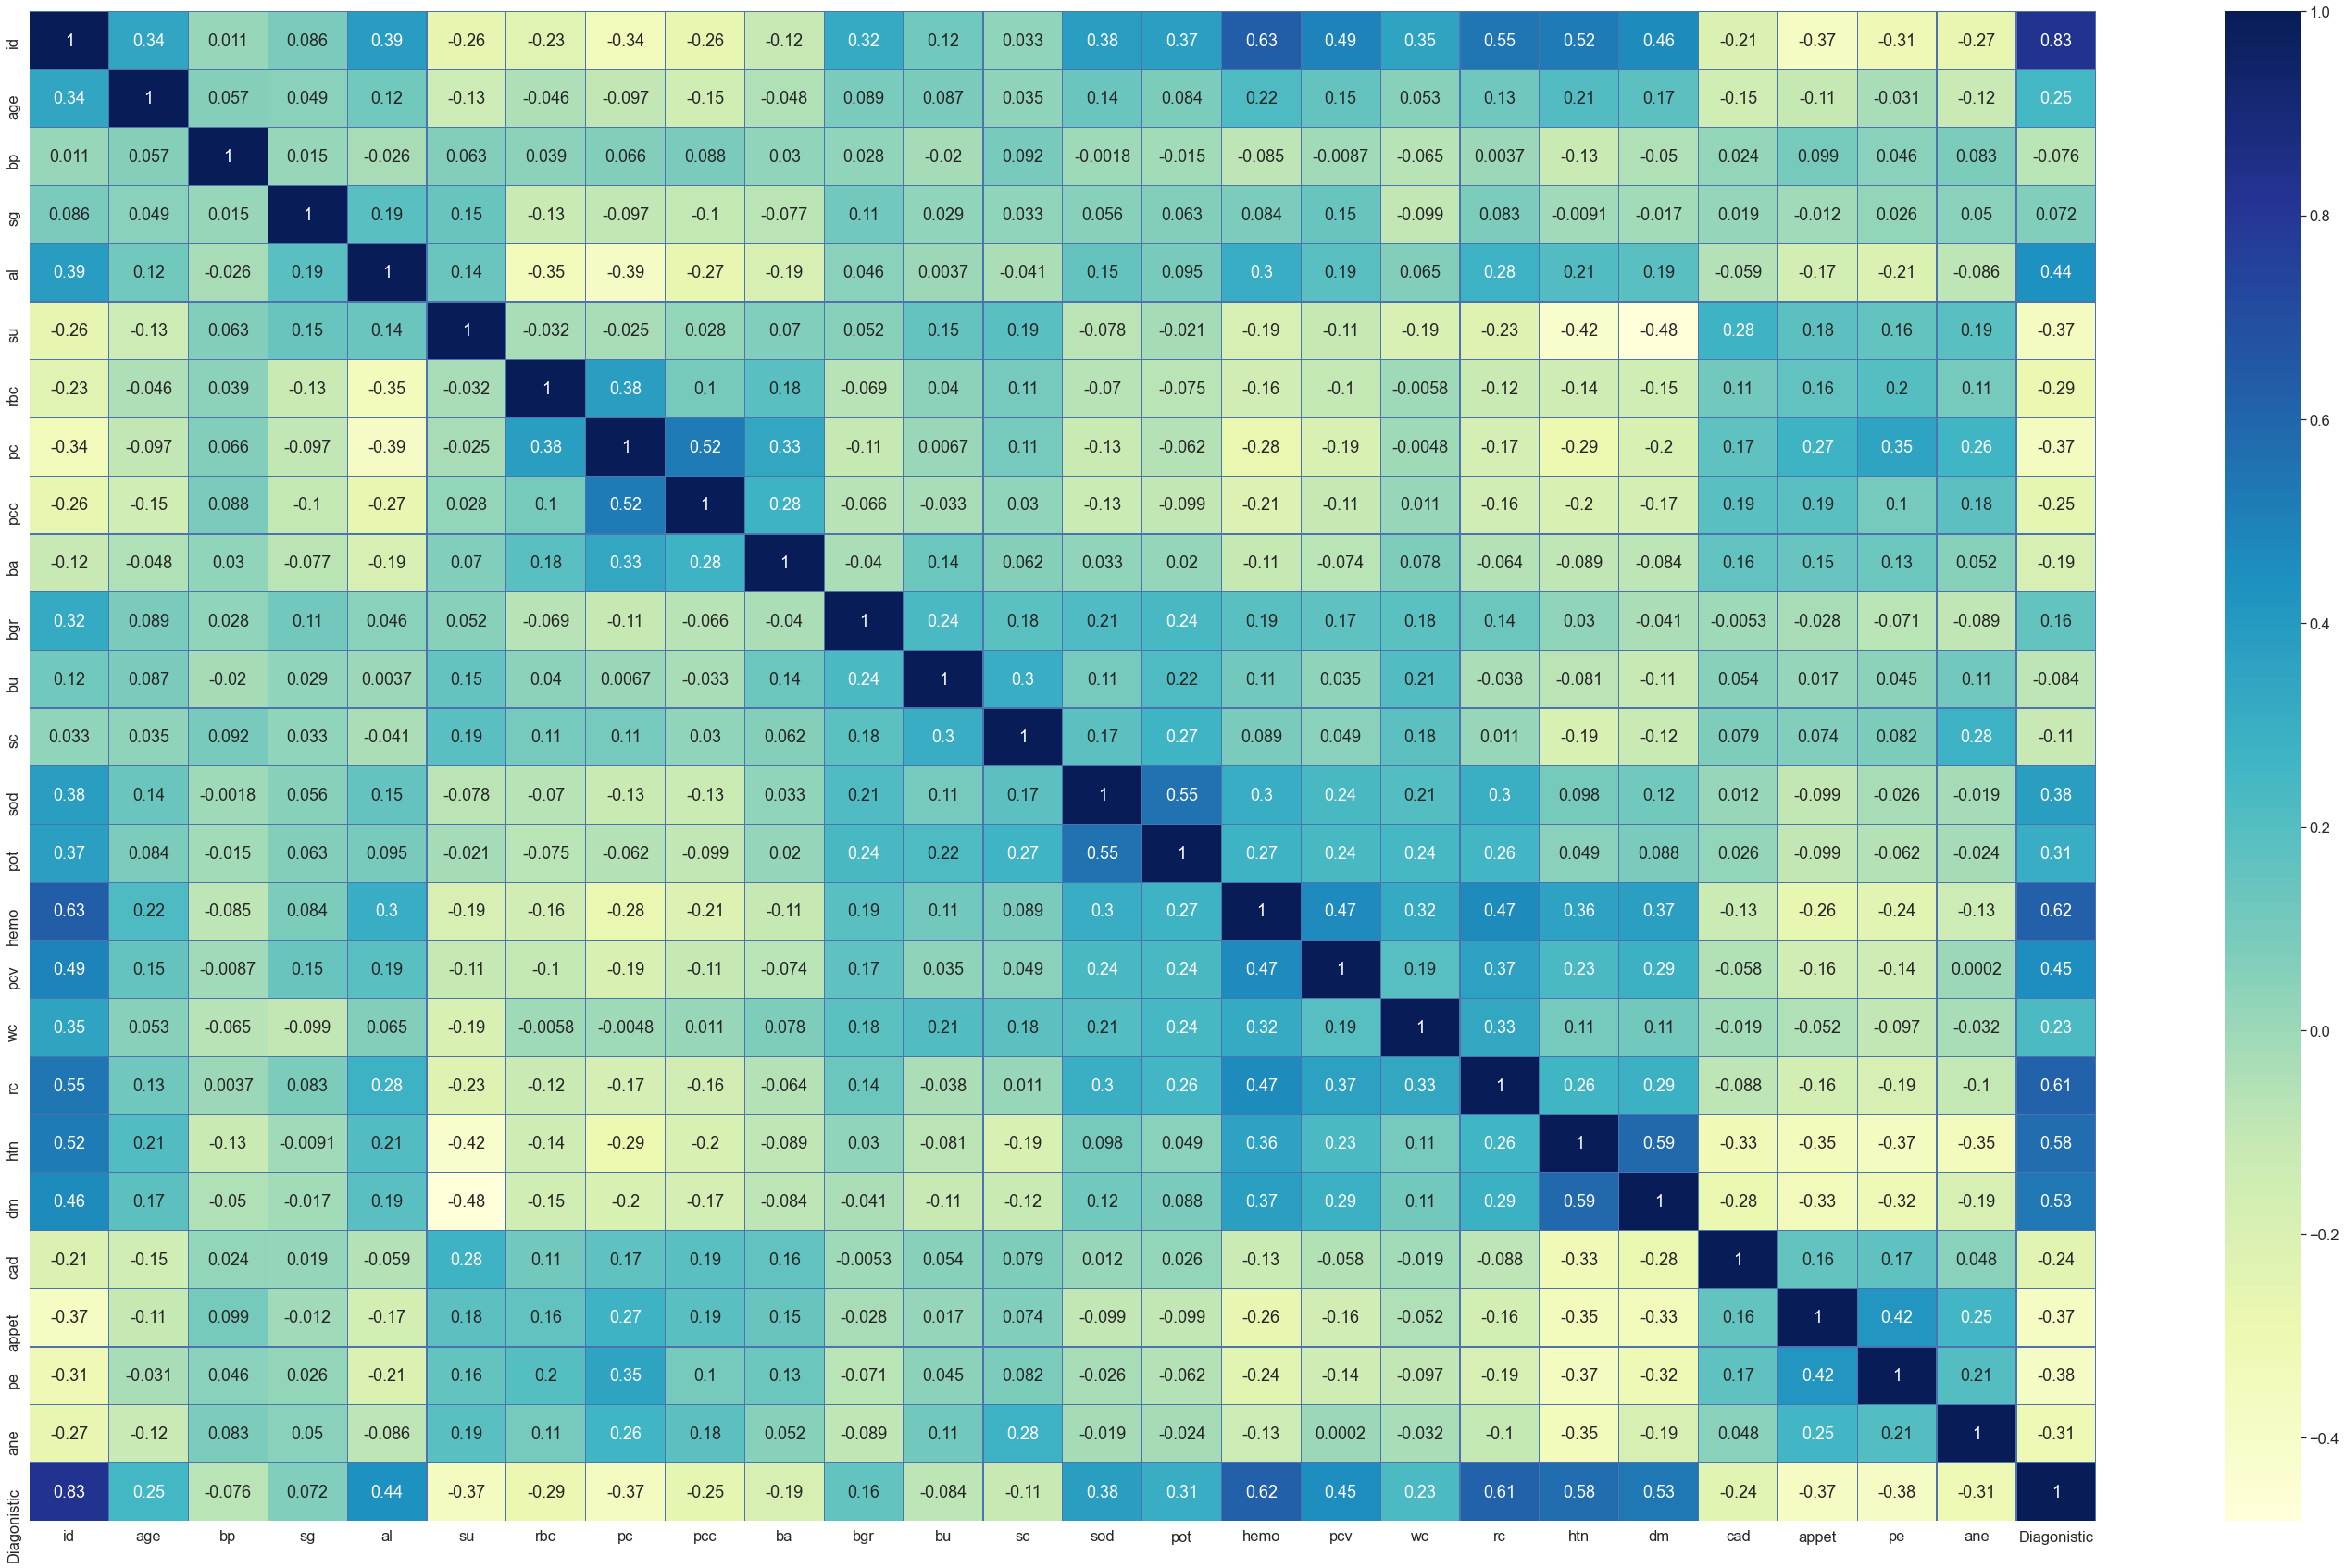

In [158]:
# get correlation between all features ::
sns.set( rc = {"figure.figsize" : [50 , 30]} , font_scale=1.5)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot=True , linecolor="b")

<AxesSubplot:>

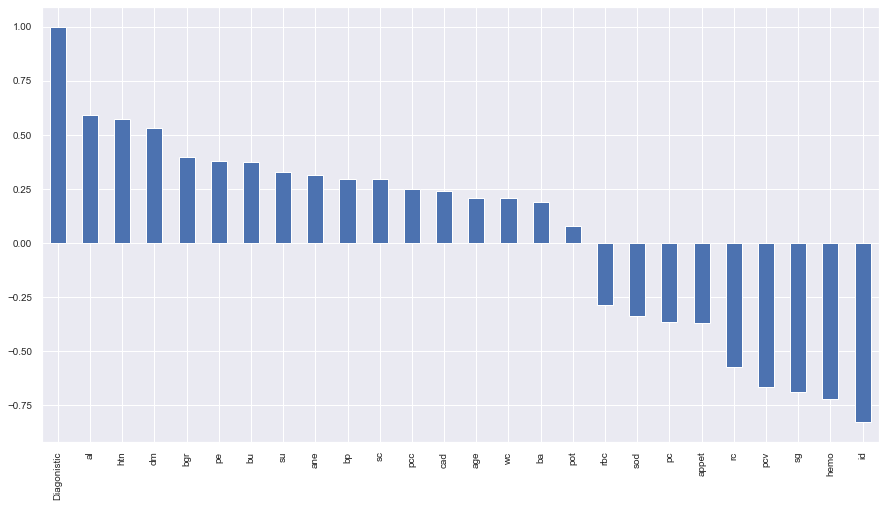

In [159]:
# Get Correlation of "Churn" with other features ::
sns.set( rc = {"figure.figsize" : [30 , 30]} , font_scale=0.9)

plt.figure(figsize=(15,8))
df.corr()['Diagonistic'].sort_values(ascending = False).plot(kind='bar'  )

# 3 :: Feture selection ::
***************************************************
* There are multi technices to get the most Correlation Columns with our target.

In [160]:
df.drop(["id"] , axis=1 , inplace=True)

<p id = "Prepration">Data-Prepration</p>

In [161]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'Diagonistic'],
      dtype='object')

In [162]:
# Split data into input and output data
x = df.drop("Diagonistic" , axis=1 )
y = df["Diagonistic"]

In [163]:
# Spliting data into Training and Testing data ::
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , random_state = 20 , test_size=0.2)

In [164]:
#Scalling data ::
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test  = scaller.transform(x_test)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          400 non-null    float64
 1   bp           400 non-null    float64
 2   sg           400 non-null    float64
 3   al           400 non-null    float64
 4   su           400 non-null    float64
 5   rbc          400 non-null    int64  
 6   pc           400 non-null    int64  
 7   pcc          400 non-null    int64  
 8   ba           400 non-null    int64  
 9   bgr          400 non-null    float64
 10  bu           400 non-null    float64
 11  sc           400 non-null    float64
 12  sod          400 non-null    float64
 13  pot          400 non-null    float64
 14  hemo         400 non-null    float64
 15  pcv          400 non-null    float64
 16  wc           400 non-null    float64
 17  rc           400 non-null    float64
 18  htn          400 non-null    int64  
 19  dm      

<p id = "Model">Bulid_ML_Model</p>

# Build Models ::
*************************************
* On that Process we will ::
    * Bulid multi models fror classification problem.
    * Evaluate all models.
    * Select the most efficient model for churn problem.

In [166]:
# Import All Classification Algos ::
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix 
from sklearn.metrics import classification_report , f1_score , precision_recall_curve

In [167]:
Models = {"Log_Classifer" : LogisticRegression() ,
          "DT_Classifer"  : DecisionTreeClassifier() ,
          "RF_Classifer"  : RandomForestClassifier() ,
          "XGB_Classifer" : XGBClassifier() ,
          "SVC_Classifer" : SVC(),
          "GassianNB_Classifiier" : GaussianNB() ,
          "KNN_Classifier" : KNeighborsClassifier()
         }

In [168]:
for Name , Model in Models.items() :
    print(f"The Model :: {Name}\n----------")
    Model.fit(x_train , y_train)
    Train_score = Model.score(x_train , y_train)
    Test_score  = Model.score(x_test , y_test)
    y_pred = Model.predict(x_test)
    Acurace_Score = accuracy_score(y_test , y_pred)
    Con_Matrix = confusion_matrix(y_test , y_pred)
    print(f"The Traing_Score :: {Train_score}\nThe Testing_Score :: {Test_score}\nThe Accuracy_Scor :: {Acurace_Score}\nThe Con_Matrix ::\n {Con_Matrix}\n=================\n=================")

The Model :: Log_Classifer
----------
The Traing_Score :: 0.9875
The Testing_Score :: 0.975
The Accuracy_Scor :: 0.975
The Con_Matrix ::
 [[34  0]
 [ 2 44]]
The Model :: DT_Classifer
----------
The Traing_Score :: 1.0
The Testing_Score :: 0.975
The Accuracy_Scor :: 0.975
The Con_Matrix ::
 [[34  0]
 [ 2 44]]
The Model :: RF_Classifer
----------
The Traing_Score :: 1.0
The Testing_Score :: 1.0
The Accuracy_Scor :: 1.0
The Con_Matrix ::
 [[34  0]
 [ 0 46]]
The Model :: XGB_Classifer
----------
[06:02:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Traing_Score :: 1.0
The Testing_Score :: 0.9875
The Accuracy_Scor :: 0.9875
The Con_Matrix ::
 [[34  0]
 [ 1 45]]
The Model :: SVC_Classifer
----------
The Traing_Score :: 0.990625
The Test

* Select most efficient model with high Performance and accuracy

In [186]:
XGB_Model = XGBClassifier()
XGB_Model.fit(x_train , y_train)
print(XGB_Model.score(x_train , y_train))
print(XGB_Model.score(x_test , y_test))
print("-" * 80)

[06:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
0.9875
--------------------------------------------------------------------------------


<p id = "Evaluation">Evaluate_Model</p>

# Evaluate Model ::
*********************************
* Its one off the most important phase in data scientist life cycle which estimate the performance and accuracy of the model in that problem.

In [187]:
XGB_Model.score(x_train , y_train)

1.0

In [188]:
XGB_Model.score(x_test , y_test)

0.9875

In [189]:
Ac_Sore_RF = accuracy_score(y_test , y_pred)
Ac_Sore_RF

0.95

In [190]:
con_Matrix = confusion_matrix(y_test , y_pred)
con_Matrix

array([[34,  0],
       [ 4, 42]], dtype=int64)

<AxesSubplot:>

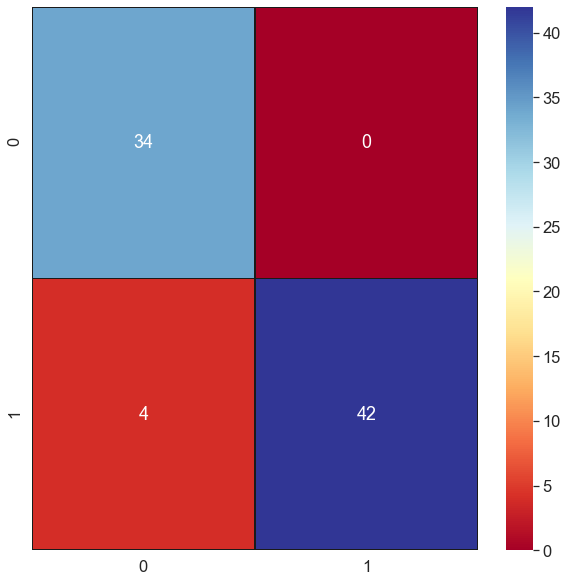

In [191]:
sns.set( rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)

sns.heatmap(con_Matrix , annot = True , cmap="RdYlBu" , linecolor = 'k' , linewidths= 1)

<p id = "Save">Save_Model</p>

# Save techinces ::
***************************************
* Save Scaler
* Save PCA
* Save Model

In [192]:
import joblib

In [193]:
scaler = joblib.dump(scaller , "scaler.h5")

In [194]:
Model = joblib.dump(XGB_Model , "Model.h5")

<p id = "conclusions">conclusions</p>

# Conclusion ::
*****************************
* On that Step We will ::
  * Input data features.
  * Scaling input data.
  * Predict income label.

In [198]:
df.head(5)

age    bp     sg   al   su  rbc  pc  pcc  ba         bgr  ...   pcv  \
0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  121.000000  ...  44.0   
1   7.0  50.0  1.020  4.0  0.0    1   1    0   0  148.036517  ...  38.0   
2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  423.000000  ...  31.0   
3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.000000  ...  32.0   
4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  106.000000  ...  35.0   

       wc        rc  htn  dm  cad  appet  pe  ane  Diagonistic  
0  7800.0  5.200000    1   1    0      1   0    0            1  
1  6000.0  4.707435    0   0    0      1   0    0            1  
2  7500.0  4.707435    0   1    0      0   0    1            1  
3  6700.0  3.900000    1   0    0      0   1    1            1  
4  7300.0  4.600000    0   0    0      1   0    0            1  

[5 rows x 25 columns]

In [196]:
x.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [197]:
len(x.columns)

24

In [201]:
custom_data = np.array([40 , 50 , 1.02 , 4 , 0 , 1 , 0  , 1 , 0 ,
                        121.0365 ,36 ,32 ,134 , 4.8,15.4, 
                        44 , 7800 , 4.70 , 1 , 0 ,1 ,0 , 0 , 1 ])

In [202]:
custom_data.shape

(24,)

In [203]:
len(custom_data)

24

In [204]:
custom_data = scaller.transform([custom_data])
custom_data

array([[-0.65231097, -2.01177126,  0.51630919,  2.24615576, -0.43590731,
         0.388689  , -2.081666  ,  2.80871659, -0.23686623, -0.37828281,
        -0.45364473,  4.85078311, -0.35000366,  0.48577796,  1.11388959,
         0.71281077, -0.28144066,  0.0118783 ,  1.25723711, -0.71874034,
         3.16772517, -1.92506684, -0.4853053 ,  2.38047614]])

In [205]:
prediction = RF_Model.predict(custom_data)
prediction

array([1], dtype=int64)